# Natural Language Processing

## Importing the libraries

In [1]:
# ========== Basic Libraries ==========
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import Counter
from tabulate import tabulate

# ========== Text Processing & NLP ==========
import re  # Regular expressions for text manipulation
import nltk  # Natural Language Toolkit
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.metrics import mutual_info_score
from wordcloud import WordCloud
from nltk.corpus import stopwords  # Stopword removal library
from nltk.stem.porter import PorterStemmer  # Stemming
from gensim.models import KeyedVectors, Word2Vec  # Word embeddings
from sentence_transformers import SentenceTransformer  # Transformer-based embeddings
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  # Text vectorization

# ========== Machine Learning ==========
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV  # Model selection
from sklearn.preprocessing import LabelEncoder  # Encoding library for categorical labels

# ========== Machine Learning Models ==========
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC  # Support Vector Classifier

# ========== Model Evaluation ==========
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

# ========== Imbalanced Data Handling ==========
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
os.environ["TOKENIZERS_PARALLELISM"] = "false"

[nltk_data] Downloading package stopwords to /home/opc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/opc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2025-02-09 14:02:20.760234: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-09 14:02:20.771828: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739109740.784968   19798 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739109740.788931   19798 cuda_blas.cc:1418] Unable to register cuB

# <u>MILESTONE 1</u>

## Problem Definition

> Workplace accidents pose serious risks, causing injuries, fatalities, and operational disruptions despite strict safety regulations. Talking about the **Problem Definition** based on the business context, our task is to develop chatbot using NLP and ML to analyze accident reports, predict risks, and enhance workplace safety. The bot should be able to: 
> * Identify hazards by analyzing past accident reports
> * Predict accident severity and potential risks
> * Use data from 12 industrial plants across three countries
> * Provide real-time safety insights for employees and managers
> * Help organizations comply with safety regulations and prevent accidents
>
> Our overall goal is to proactively reduce workplace accidents by leveraging AI-driven insights, improving safety measures, and fostering a safer work environment.

> Let's start our work by first loading the data and checking on a few basic details. We will then go on with the data analysis to see trends for various relationships between the columns of our dataset

## Loading the Dataset

In [2]:
df = pd.read_excel("dataset.xlsx")
#df = pd.read_excel("C:/Users/pri96/OneDrive/Documents/AI and ML PGP/Capstone Project/NLP - 1 (Chatbot)/Data Set - industrial_safety_and_health_database_with_accidents_description.xlsx")

In [3]:
df.head()

Unnamed: 0       Data   Countries     Local Industry Sector Accident Level  \
0           0 2016-01-01  Country_01  Local_01          Mining              I   
1           1 2016-01-02  Country_02  Local_02          Mining              I   
2           2 2016-01-06  Country_01  Local_03          Mining              I   
3           3 2016-01-08  Country_01  Local_04          Mining              I   
4           4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Genre Employee or Third Party        Critical Risk  \
0                       IV  Male             Third Party              Pressed   
1                       IV  Male                Employee  Pressurized Systems   
2                      III  Male    Third Party (Remote)         Manual Tools   
3                        I  Male             Third Party               Others   
4                       IV  Male             Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

### <u>**Taking a look at the Columns and their Datatypes**

In [4]:
# Printing shape and columns of DataFrame 'stock_news'

print("Industrial Safety DataFrame:\n")
print("     There are", df.shape[0], "rows and", df.shape[1], "columns in the dataframe\n")
print("     Columns:", df.columns.tolist())

Industrial Safety DataFrame:

     There are 425 rows and 11 columns in the dataframe

     Columns: ['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector', 'Accident Level', 'Potential Accident Level', 'Genre', 'Employee or Third Party', 'Critical Risk', 'Description']


In [5]:
# Printing Data Types

print("\nData Types of DataFrame:\n")
print(df.dtypes)


Data Types of DataFrame:

Unnamed: 0                           int64
Data                        datetime64[ns]
Countries                           object
Local                               object
Industry Sector                     object
Accident Level                      object
Potential Accident Level            object
Genre                               object
Employee or Third Party             object
Critical Risk                       object
Description                         object
dtype: object


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.7+ KB


> Initial analysis for the dataframe shows that there are no duplicate values <br> There is 1 column of type 'int', 9 columns of type 'object', and 1 column of 'datetime' type

### <u>**Five Points summary of our dataset**

In [7]:
df.describe(include = 'all')

Unnamed: 0                           Data   Countries     Local  \
count   425.000000                            425         425       425   
unique         NaN                            NaN           3        12   
top            NaN                            NaN  Country_01  Local_03   
freq           NaN                            NaN         251        90   
mean    224.084706  2016-09-20 16:46:18.352941312         NaN       NaN   
min       0.000000            2016-01-01 00:00:00         NaN       NaN   
25%     118.000000            2016-05-01 00:00:00         NaN       NaN   
50%     226.000000            2016-09-13 00:00:00         NaN       NaN   
75%     332.000000            2017-02-08 00:00:00         NaN       NaN   
max     438.000000            2017-07-09 00:00:00         NaN       NaN   
std     125.526786                            NaN         NaN       NaN   

       Industry Sector Accident Level Potential Accident Level Genre  \
count              425            425                      425   425   
unique               3              5                        6     2   
top             Mining              I                       IV  Male   
freq               241            316                      143   403   
mean               NaN            NaN                      NaN   NaN   
min                NaN            NaN                      NaN   NaN   
25%                NaN            NaN                      NaN   NaN   
50%                NaN            NaN                      NaN   NaN   
75%                NaN            NaN                      NaN   NaN   
max                NaN            NaN                      NaN   NaN   
std                NaN            NaN                      NaN   NaN   

       Employee or Third Party Critical Risk  \
count                      425           425   
unique                       3            33   
top                Third Party        Others   
freq                       189           232   
mean                       NaN           NaN   
min                        NaN           NaN   
25%                        NaN           NaN   
50%                        NaN           NaN   
75%                        NaN           NaN   
max                        NaN           NaN   
std                        NaN           NaN   

                                              Description  
count                                                 425  
unique                                                411  
top     On 02/03/17 during the soil sampling in the re...  
freq                                                    3  
mean                                                  NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN  
std                                                   NaN

## Cleaning the Dataset

### <u>**Dropping Irrelevant Columns**

> 'Unnamed: 0' is just an indexer column having no significance in data analysis. We would go ahead and remove the column from our set

In [8]:
#drop Unnamed column as it has no importance
df = df.drop("Unnamed: 0", axis=1)

In [9]:
df.head()

Data   Countries     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Genre Employee or Third Party        Critical Risk  \
0                       IV  Male             Third Party              Pressed   
1                       IV  Male                Employee  Pressurized Systems   
2                      III  Male    Third Party (Remote)         Manual Tools   
3                        I  Male             Third Party               Others   
4                       IV  Male             Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

### <u>**Checking Missing or Duplicate Values**

In [10]:
# Checking for duplicate values
df[df.duplicated()]

Data   Countries     Local Industry Sector Accident Level  \
77  2016-04-01  Country_01  Local_01          Mining              I   
262 2016-12-01  Country_01  Local_03          Mining              I   
303 2017-01-21  Country_02  Local_02          Mining              I   
345 2017-03-02  Country_03  Local_10          Others              I   
346 2017-03-02  Country_03  Local_10          Others              I   
355 2017-03-15  Country_03  Local_10          Others              I   
397 2017-05-23  Country_01  Local_04          Mining              I   

    Potential Accident Level Genre Employee or Third Party  \
77                         V  Male    Third Party (Remote)   
262                       IV  Male                Employee   
303                        I  Male    Third Party (Remote)   
345                        I  Male             Third Party   
346                        I  Male             Third Party   
355                        I  Male             Third Party   
397                       IV  Male             Third Party   

               Critical Risk  \
77                    Others   
262                   Others   
303                   Others   
345         Venomous Animals   
346         Venomous Animals   
355         Venomous Animals   
397  Projection of fragments   

                                           Description  
77   In circumstances that two workers of the Abrat...  
262  During the activity of chuteo of ore in hopper...  
303  Employees engaged in the removal of material f...  
345  On 02/03/17 during the soil sampling in the re...  
346  On 02/03/17 during the soil sampling in the re...  
355  Team of the VMS Project performed soil collect...  
397  In moments when the 02 collaborators carried o...

> We see there are 7 duplicate values. We'll drop them now

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
# Checking for duplicate values again
df[df.duplicated()]

Empty DataFrame
Columns: [Data, Countries, Local, Industry Sector, Accident Level, Potential Accident Level, Genre, Employee or Third Party, Critical Risk, Description]
Index: []

In [13]:
# Checking for null values
df.isnull().sum()

Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

> Confirming our initial analysis, we see there are no null values. Let's move forward

## Standardizing the Columns

In [14]:
df.rename(columns={'Data': 'Date'}, inplace=True)
df.rename(columns={'Countries': 'Country'}, inplace=True)
df.rename(columns={'Genre': 'Gender'}, inplace=True)
df.rename(columns={'Employee or Third Party': 'Employee Type'}, inplace=True)

print("\nColumn names changed to meaningful names....")
df.head()


Column names changed to meaningful names....


Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee Type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

> Let's also separate the Day, month and year from Date column to make our tasks of plotting with those columns easier

In [15]:
# Extracting year & month from 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day_name()

df.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee Type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month        Day  
0  While removing the drill rod of the Jumbo 08 f...  2016      1     Friday  
1  During the activation of a sodium sulphide pum...  2016      1   Saturday  
2  In the sub-station MILPO located at level +170...  2016      1  Wednesday  
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1     Friday  
4  Approximately at 11:45 a.m. in circumstances t...  2016      1     Sunday

## Exploratory Data Analysis

> Before starting with EDA, let's first get the count of each categorical columns

In [16]:
# Selecting categorical columns
categorical_columns = ["Country", "Local", "Industry Sector", "Accident Level", "Potential Accident Level", 
                       "Gender", "Employee Type", "Critical Risk", 'Year', 'Month', 'Day']

# Printing value counts for each categorical column
for col in categorical_columns:
    print(f"Value counts for {df[col].value_counts()}:\n")
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

Value counts for Country
Country_01    248
Country_02    129
Country_03     41
Name: count, dtype: int64:

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Value counts for Local
Local_03    89
Local_05    59
Local_01    56
Local_04    55
Local_06    46
Local_10    41
Local_08    27
Local_02    23
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: count, dtype: int64:

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Value counts for Industry Sector
Mining    237
Metals    134
Others     47
Name: count, dtype: int64:

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Value counts for Accident Level
I      309
II      40
III     31
IV      30
V        8
Name: count, dtype: int64:

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Value counts for Potential Accident Level
IV     141
III    106
II      95
I       45
V       30
VI       1
Name: count, dtype: int64:

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Value counts for Gender
Male      396
Female     22
Name: count, dty

> Now that we have the counts for each categorical columns, we see that 'Critical Risk' column has a category called "\nNot applicable". This is not a valid category. We'll proceed to rename it to "Not Applicable" for better clarity

In [17]:
df['Critical Risk'] = df['Critical Risk'].str.replace(r'\nNot applicable', 'Not Applicable', regex = True)
df[df['Critical Risk']=='Not Applicable']

Date     Country     Local Industry Sector Accident Level  \
154 2016-06-17  Country_02  Local_08          Metals             IV   

    Potential Accident Level Gender Employee Type   Critical Risk  \
154                        V   Male      Employee  Not Applicable   

                                           Description  Year  Month     Day  
154  At approximately 5:45 pm, the operator Paulo (...  2016      6  Friday

> Now let's move forward with the analysis of our data through different plots, i.e., exploratory data analysis

### <u>**Univariate Analysis**

In [18]:
# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(80, 100))

# List of categorical columns
categorical_columns = ['Country', 'Local', 'Industry Sector', 'Accident Level',
                        'Potential Accident Level', 'Gender', 'Employee Type', 
                        'Year', 'Month', 'Day', 'Critical Risk']

for col, ax in zip(categorical_columns, axes.flatten()):
    value_counts = df[col].value_counts()  # Get the count of unique values
    
    if len(value_counts) > 5:
        # Create countplot if the number of unique values is greater than 5
        sns.countplot(data=df, x=col, ax=ax, 
                      order=value_counts.index, hue=col, 
                      palette=sns.color_palette("Set1", len(value_counts)))
        
        ax.set_title(f'Count of {col}', fontsize=50)
        ax.set_xlabel('', fontsize=40)
        ax.set_ylabel('Count', fontsize=40)
        
        # Rotate x-tick labels and adjust font size
        ax.tick_params(axis='x', rotation=90, labelsize=40)
        ax.tick_params(axis='y', labelsize=40)
        
        # Add count labels on each bar
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center',
                        fontsize=30, color='black',
                        xytext=(0, 5), textcoords='offset points')
    else:
        # Create pie chart if the number of unique values is less than or equal to 5
        value_counts.plot.pie(
            ax=ax,
            labels=value_counts.index,
            autopct='%1.1f%%',
            colors=sns.color_palette("Set1", len(value_counts)),
            textprops={'fontsize': 50, 'color': 'black'}, 
            wedgeprops={'linewidth': 2, 'edgecolor': 'black'}
        )
        
        ax.set_title(f'{col} Distribution', fontsize=50)
        ax.set_ylabel('')
        ax.set_xlabel('')
        ax.tick_params(axis='both', which='both', length=0)  # Hide ticks

# Delete any remaining empty subplots
fig.delaxes(axes[3][2])

plt.tight_layout()
plt.show()

### Insights for the above plots

> - Most records come from **Country_01**, followed by **Country_02**, with **Country_03** having the least.
> - **Mining** is the dominant industry, followed by **Metals**, with a small share in "Others."
> - **Men dominate** the data (**94.7%**), while **women make up just 5.3%**
> - Majority of workers are **Third Party (44.3%)** or **Employees (42.6%)**, with some working **remotely (13.2%)**
> - Most incidents occurred in **2016 (67.7%)**, with fewer cases in **2017**
> 
> ### **How Bad Are the Accidents?**
> - **73.9% of incidents were minor (Level I)**, while severe cases **(Level V) were rare (1.9%)**
> - In terms of potential risks, **Level IV incidents were most common**, while **Level VI was barely recorded**
> 
> ### **When Do Accidents Happen?**
> - **February had the highest number of incidents**, while **November had the least**
> - **Thursday was the busiest day**, while **Sunday had the least incidents**
> 
> ### **Where Are Most Incidents Reported?**
> - **Local_03** reported the highest number of incidents, while **Local_09 and Local_11 had very few**
> - The **"Others"** category had the **most critical risk cases (229 reports)**

### <u>**Bivariate Analysis**

#### Distribution of other features with respect to different countries.

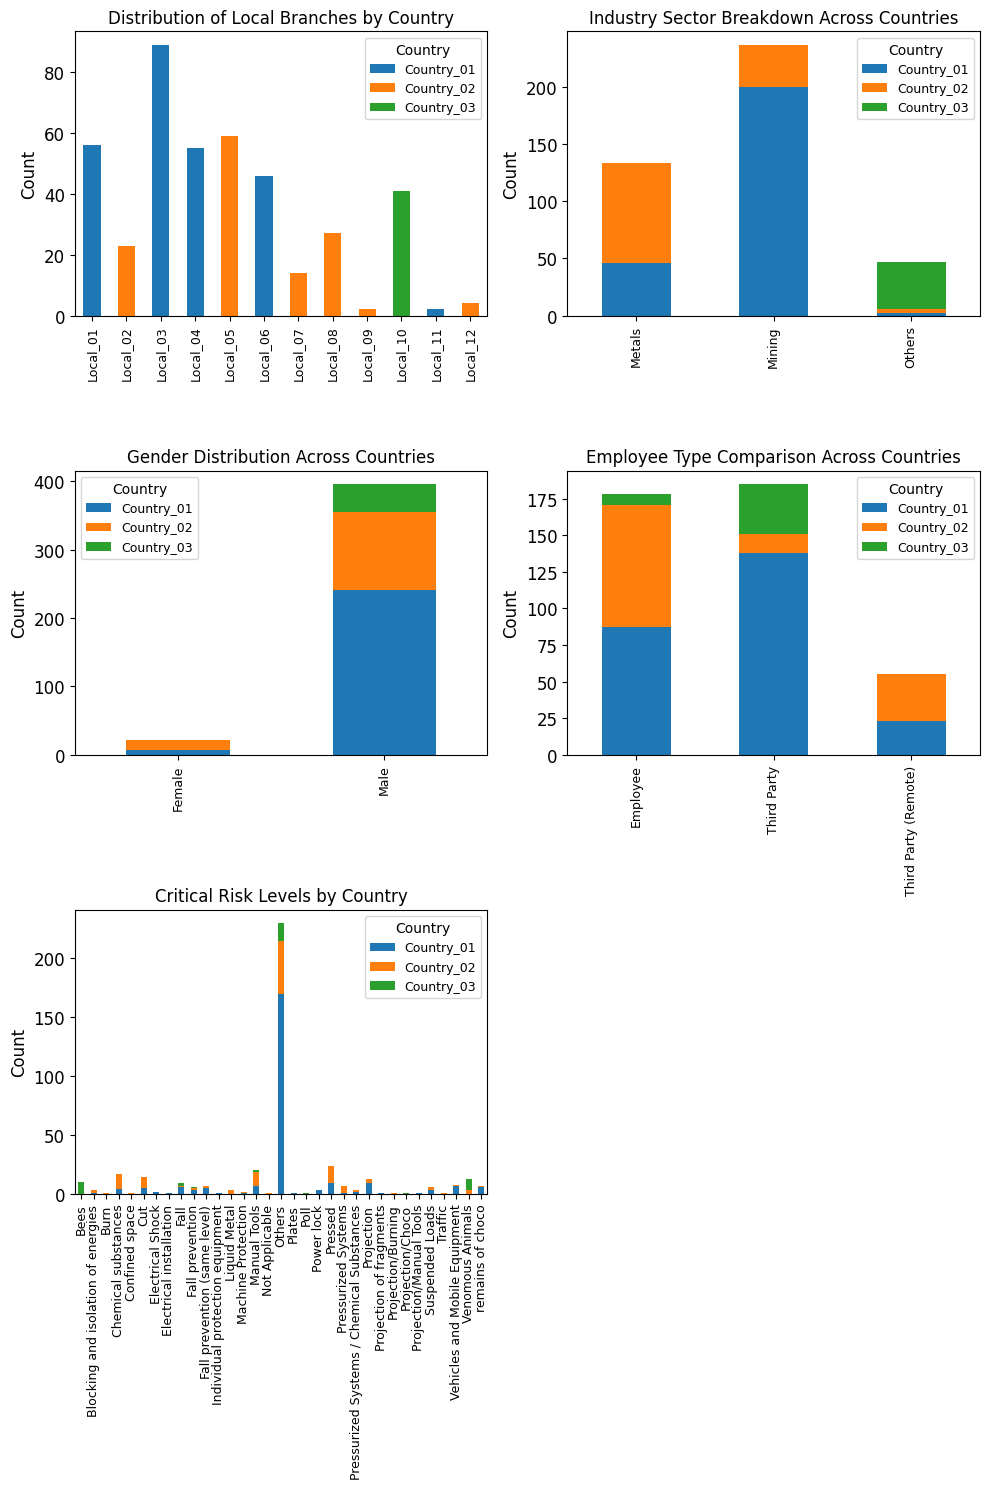

In [19]:
# List of categorical columns
categorical_columns = ['Local', 'Industry Sector', 'Gender', 'Employee Type', 'Critical Risk']

# Define the number of rows and columns dynamically
num_cols = 2  # 2 columns per row
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # Compute required rows

# Set up the grid layout dynamically
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

# Flatten the axes array to easily iterate over subplots
axes = axes.flatten()

# Dictionary for better plot titles
plot_titles = {
    'Local': 'Distribution of Local Branches by Country',
    'Industry Sector': 'Industry Sector Breakdown Across Countries',
    'Gender': 'Gender Distribution Across Countries',
    'Employee Type': 'Employee Type Comparison Across Countries',
    'Critical Risk': 'Critical Risk Levels by Country'
}

# Loop through categorical columns and create stacked bar charts
for i, col in enumerate(categorical_columns):
    value_counts = df[col].value_counts()  # Count of unique values
    count = pd.crosstab(index=df[col], columns=df['Country'])  # Crosstab for stacked bar chart

    # Create stacked bar plot
    count.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(plot_titles[col], fontsize=12)  # Improved title
    axes[i].set_xlabel('', fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, fontsize=9)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].legend(title='Country', title_fontsize=10, fontsize=9, markerscale=2)

# Remove any extra empty subplots
for j in range(i + 1, len(axes)):  
    fig.delaxes(axes[j])  # Delete extra grid spaces

# Adjust layout and display plots
plt.tight_layout()
plt.show()

**Insights from above**
> **Local Distribution**  
> - **Country_01** dominates **Local_03**, followed by **Local_01** and **Local_04**.  
> - **Country_02** is prominent in **Local_05** and **Local_08**.  
> - **Country_03** is concentrated in **Local_10**.  
> - **Local_02, Local_06, Local_07, Local_09, Local_11, and Local_12** have low counts across all countries.  
> 
> **Industry Sector**  
> - **Mining** has the highest count, led by **Country_01**, then **Country_02**.  
> - **Metals** are significant in **Country_01 and Country_02**, with **Country_02 slightly ahead**.  
> - **Other industries** have minimal representation, with **only Country_03 contributing**.  
> 
> **Gender Distribution**  
> - **Males** dominate across all countries, with **Country_01** having the highest count.  
> - **Females** are underrepresented, with **only Country_02 contributing a small count**.  
> 
> **Employee Type**  
> - **Employees & Third-Party Workers:** **Country_01 leads**, followed by **Country_02 and Country_03**.  
> - **Third-Party (Remote):** **Country_02 ranks highest**, **Country_01 follows**, while **Country_03 has none**.  
> 
> **Critical Risks**  
> - **"Others"** category has the highest risk, **mostly from Country_01**.  
> - **Key risks** (**"Pressed," "Manual Tools," "Cut," "Chemical Substances"**) are **most common in Country_02**.  
> - **Other risks** have **low counts across all countries**.  


#### Distribution of other features with respect to Gender.

/tmp/ipykernel_19798/1208470090.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
/tmp/ipykernel_19798/1208470090.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
/tmp/ipykernel_19798/1208470090.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
/tmp/ipykernel_19798/1208470090.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)


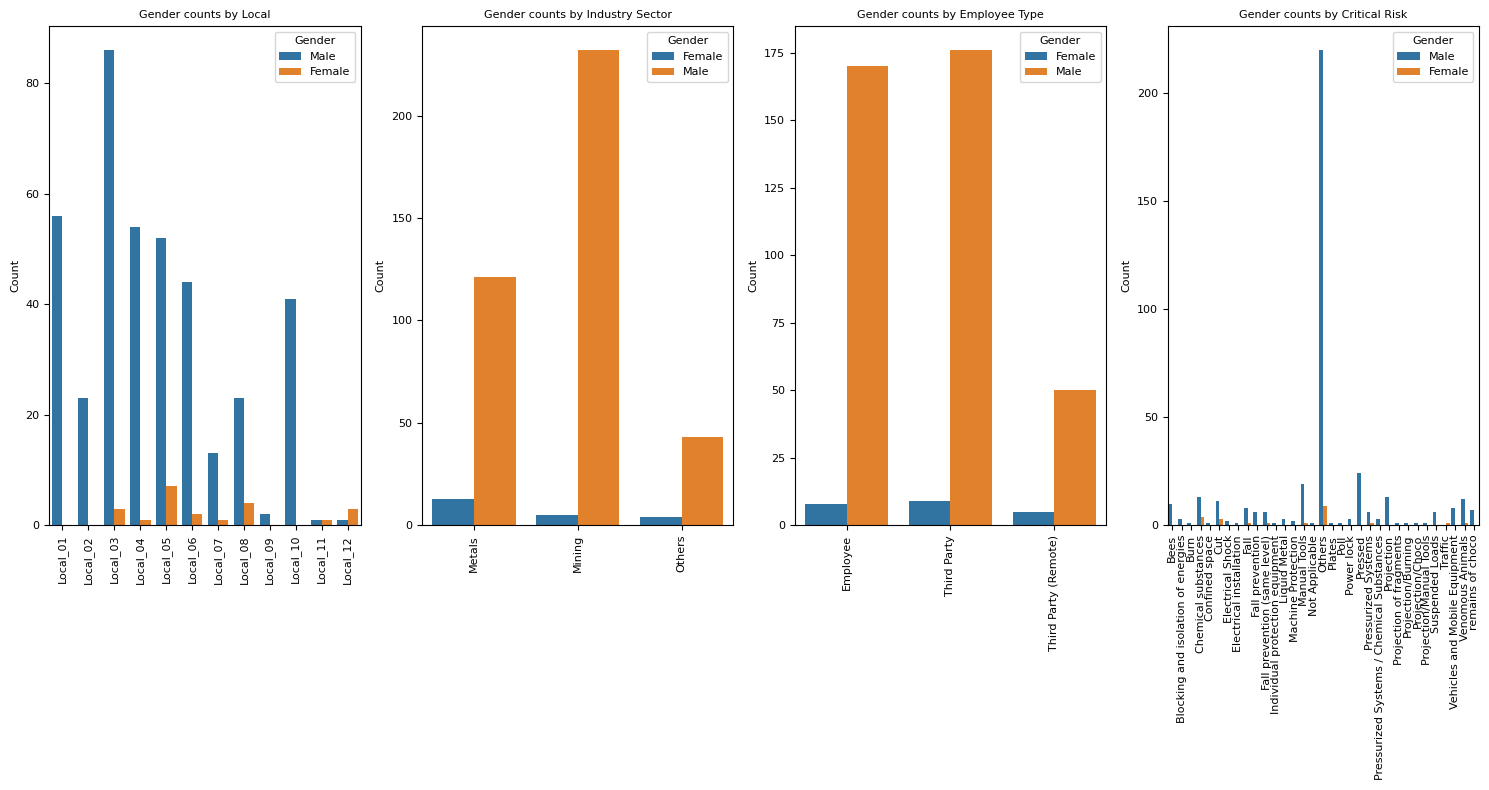

In [20]:
fig, axes = plt.subplots(1, 4, figsize=(15, 8)) 

# List of categorical columns
categorical_columns = ['Local', 'Industry Sector', 'Employee Type', 'Critical Risk']

for i, (col, ax) in enumerate(zip(categorical_columns, axes.flatten())):
    
    # Group the data by the categorical column and 'Gender' and count occurrences
    count = df.groupby([col, 'Gender']).size().reset_index(name='Count')

    # Plot using sns.barplot
    sns.barplot(x=col, y='Count', hue='Gender', data=count, ax=ax)

    ax.set_title(f'Gender counts by {col}', fontsize=8)
    ax.set_xlabel('', fontsize=8)
    ax.set_ylabel('Count', fontsize=8)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.legend(title='Gender', title_fontsize=8, fontsize=8, markerscale=2)

plt.tight_layout()
plt.show()


**Insights from above plots**

**Gender Counts by Local**
- **Local_03** has the highest count of **males**, followed by **Local_01** and **Local_04**
- **Female counts** are significantly lower across all locals, with **Local_05** having the highest female count among them
- **Males outnumber females** in most of the locals.

---

**Gender Counts by Industry Sector**
- The **Mining sector** has the highest count of **males**, followed by the **Metals sector**
- The **Others sector** has a noticeable count of **females**, but **males still dominate** in numbers

---

**Gender Counts by Employee Type**
- **Males dominate** in all three categories: **Employees**, **Third Party**, and **Third Party (Remote)**
- The highest male counts are in the **Employee** and **Third Party** categories
- **Female counts** are significantly **lower** in comparison to males in all categories

---

#**Gender Counts by Critical Risk**
- The **Others** category has the highest count of **males** by a large margin
- Other **critical risk categories** have relatively low counts, with **males being more numerous** than females in most categories

---

These observations highlight gender distribution trends across different organizational and operational contexts


#### Distribution of Accidents over different years

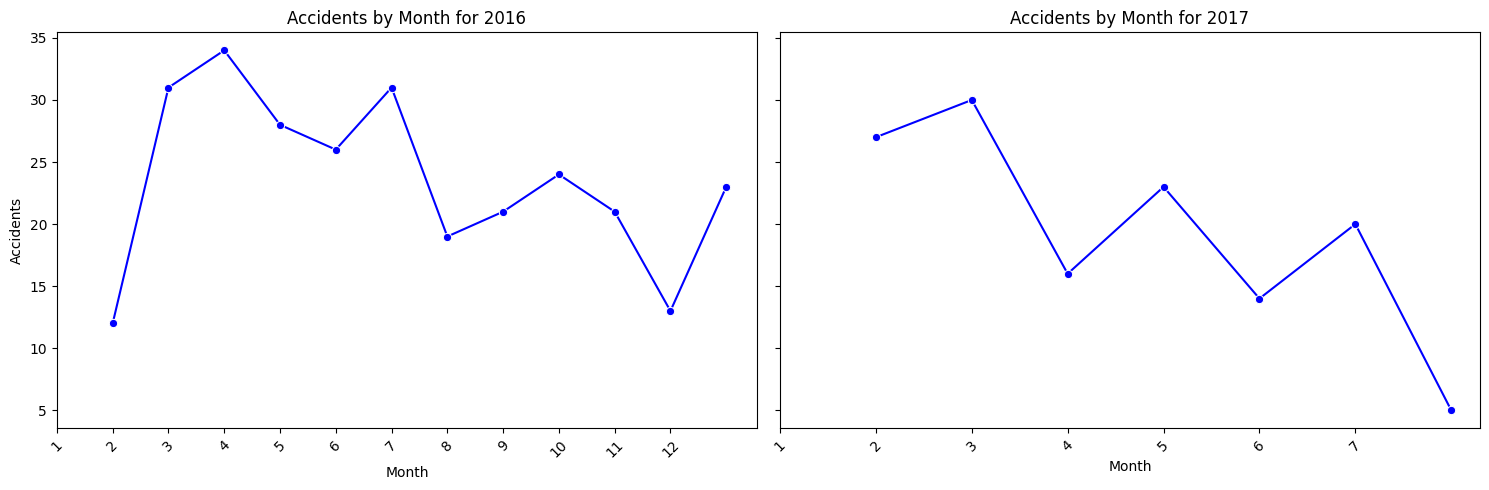

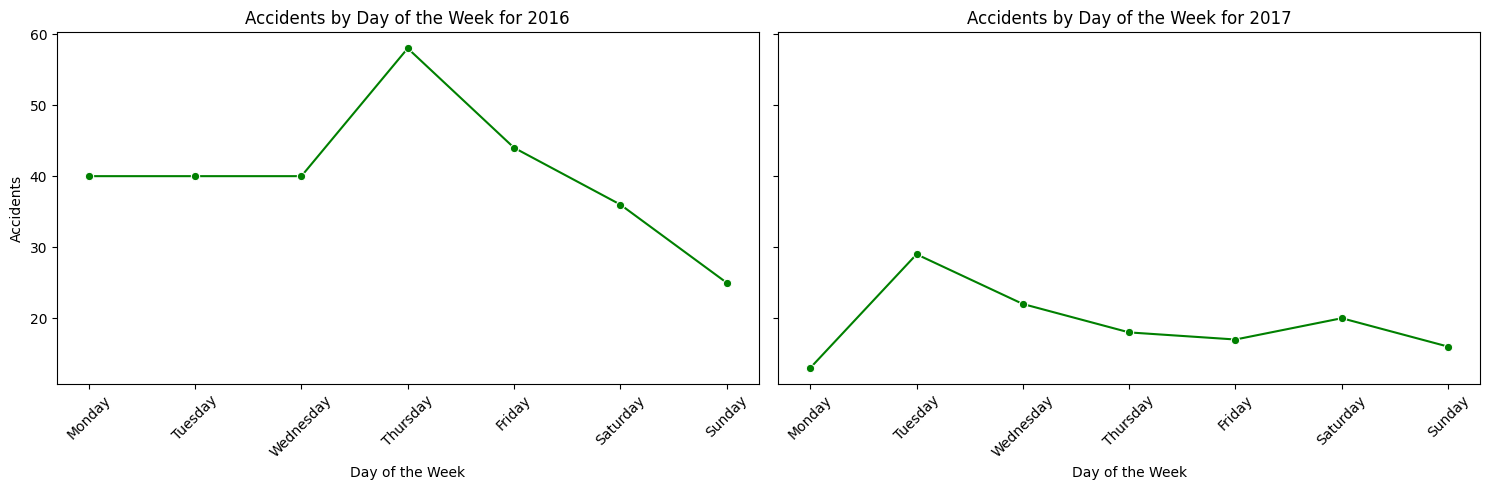

In [21]:
# Set the order for days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a list of years
years = [2016, 2017]

# 📊 Accidents by Month (Line Plot)
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
for i, (year, ax) in enumerate(zip(years, axes.flatten())):
    data_year = df[df['Year'] == year]
    
    # Group by 'Month' and count accidents
    monthly_accidents = data_year.groupby('Month').size()
    
    # Plotting the line plot
    sns.lineplot(x=monthly_accidents.index, y=monthly_accidents.values, ax=ax, marker='o', color='b')
    ax.set_title(f'Accidents by Month for {year}')
    
    # Set ticks and labels
    ax.set_xticks(range(len(monthly_accidents)))
    ax.set_xticklabels(monthly_accidents.index, rotation=45)
    
    ax.set_xlabel('Month')
    ax.set_ylabel('Accidents')

plt.tight_layout()
plt.show()

# 📅 Accidents by Day of the Week (Line Plot)
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
for i, (year, ax) in enumerate(zip(years, axes.flatten())):
    data_year = df[df['Year'] == year]
    
    # Group by 'Day' and count accidents
    day_accidents = data_year.groupby('Day').size()
    
    # Reorder days
    day_accidents = day_accidents.reindex(day_order)
    
    # Plotting the line plot
    sns.lineplot(x=day_accidents.index, y=day_accidents.values, ax=ax, marker='o', color='g')
    ax.set_title(f'Accidents by Day of the Week for {year}')
    
    # Set ticks and labels
    ax.set_xticks(range(len(day_order)))
    ax.set_xticklabels(day_order, rotation=45)
    
    ax.set_xlabel('Day of the Week')
    ax.set_ylabel('Accidents')

plt.tight_layout()
plt.show()

**Number of Accidents Analysis**
>
>**Plot: Number of Accidents by Month - 2016**
>- **Monthly Variability:** The number of accidents fluctuates significantly throughout the year.
>- **Peak Month:** March sees the highest number of accidents with around 34 incidents.
>- **Lowest Month:** January records the lowest number of accidents, with around 12 incidents.
>
>---
>
>**Plot: Number of Accidents by Month - 2017**
>- **Downward Trend:** A consistent decrease in the number of accidents is observed over the months.
>- **Peak Month:** February has the highest number of accidents, with around 30 incidents.
>- **Lowest Month:** July records the lowest number of accidents, with about 5 incidents.
>
>---
>
>**Number of Accidents by Day of the Week - 2016**
>- **Steady Weekdays:** Accidents are relatively stable from Monday to Wednesday, with around 40 incidents each day.
>- **Thursday Spike:** There's a significant increase on Thursday, reaching approximately 60 accidents.
>- **Weekend Decline:** After Thursday, accidents decrease, with Friday having around 40, Saturday around 30, and Sunday dropping to the lowest at around 20 accidents.
>
>---
>
>**Number of Accidents by Day of the Week - 2017**
>- **Starting Low:** Monday starts with less than 10 accidents.
>- **Tuesday Peak:** A sharp increase to about 30 accidents on Tuesday.
>- **Gradual Decline:** From Wednesday to Friday, accidents decrease gradually (Wednesday ~25, Thursday ~20, Friday ~15).
>- **Weekend Variation:** A slight increase on Saturday (around 20 accidents), followed by a drop on Sunday to around 10 accidents.
>

### <u>**Multivariate Analysis**

#### Pair Plot for all Numerical Variables

> Since we didn't have any numerical variables in our dataset, we have taken the liberty to convert the categorical columns to numerical ones with the help of label encoding. This will help us do our Multivariate analysis in a better way

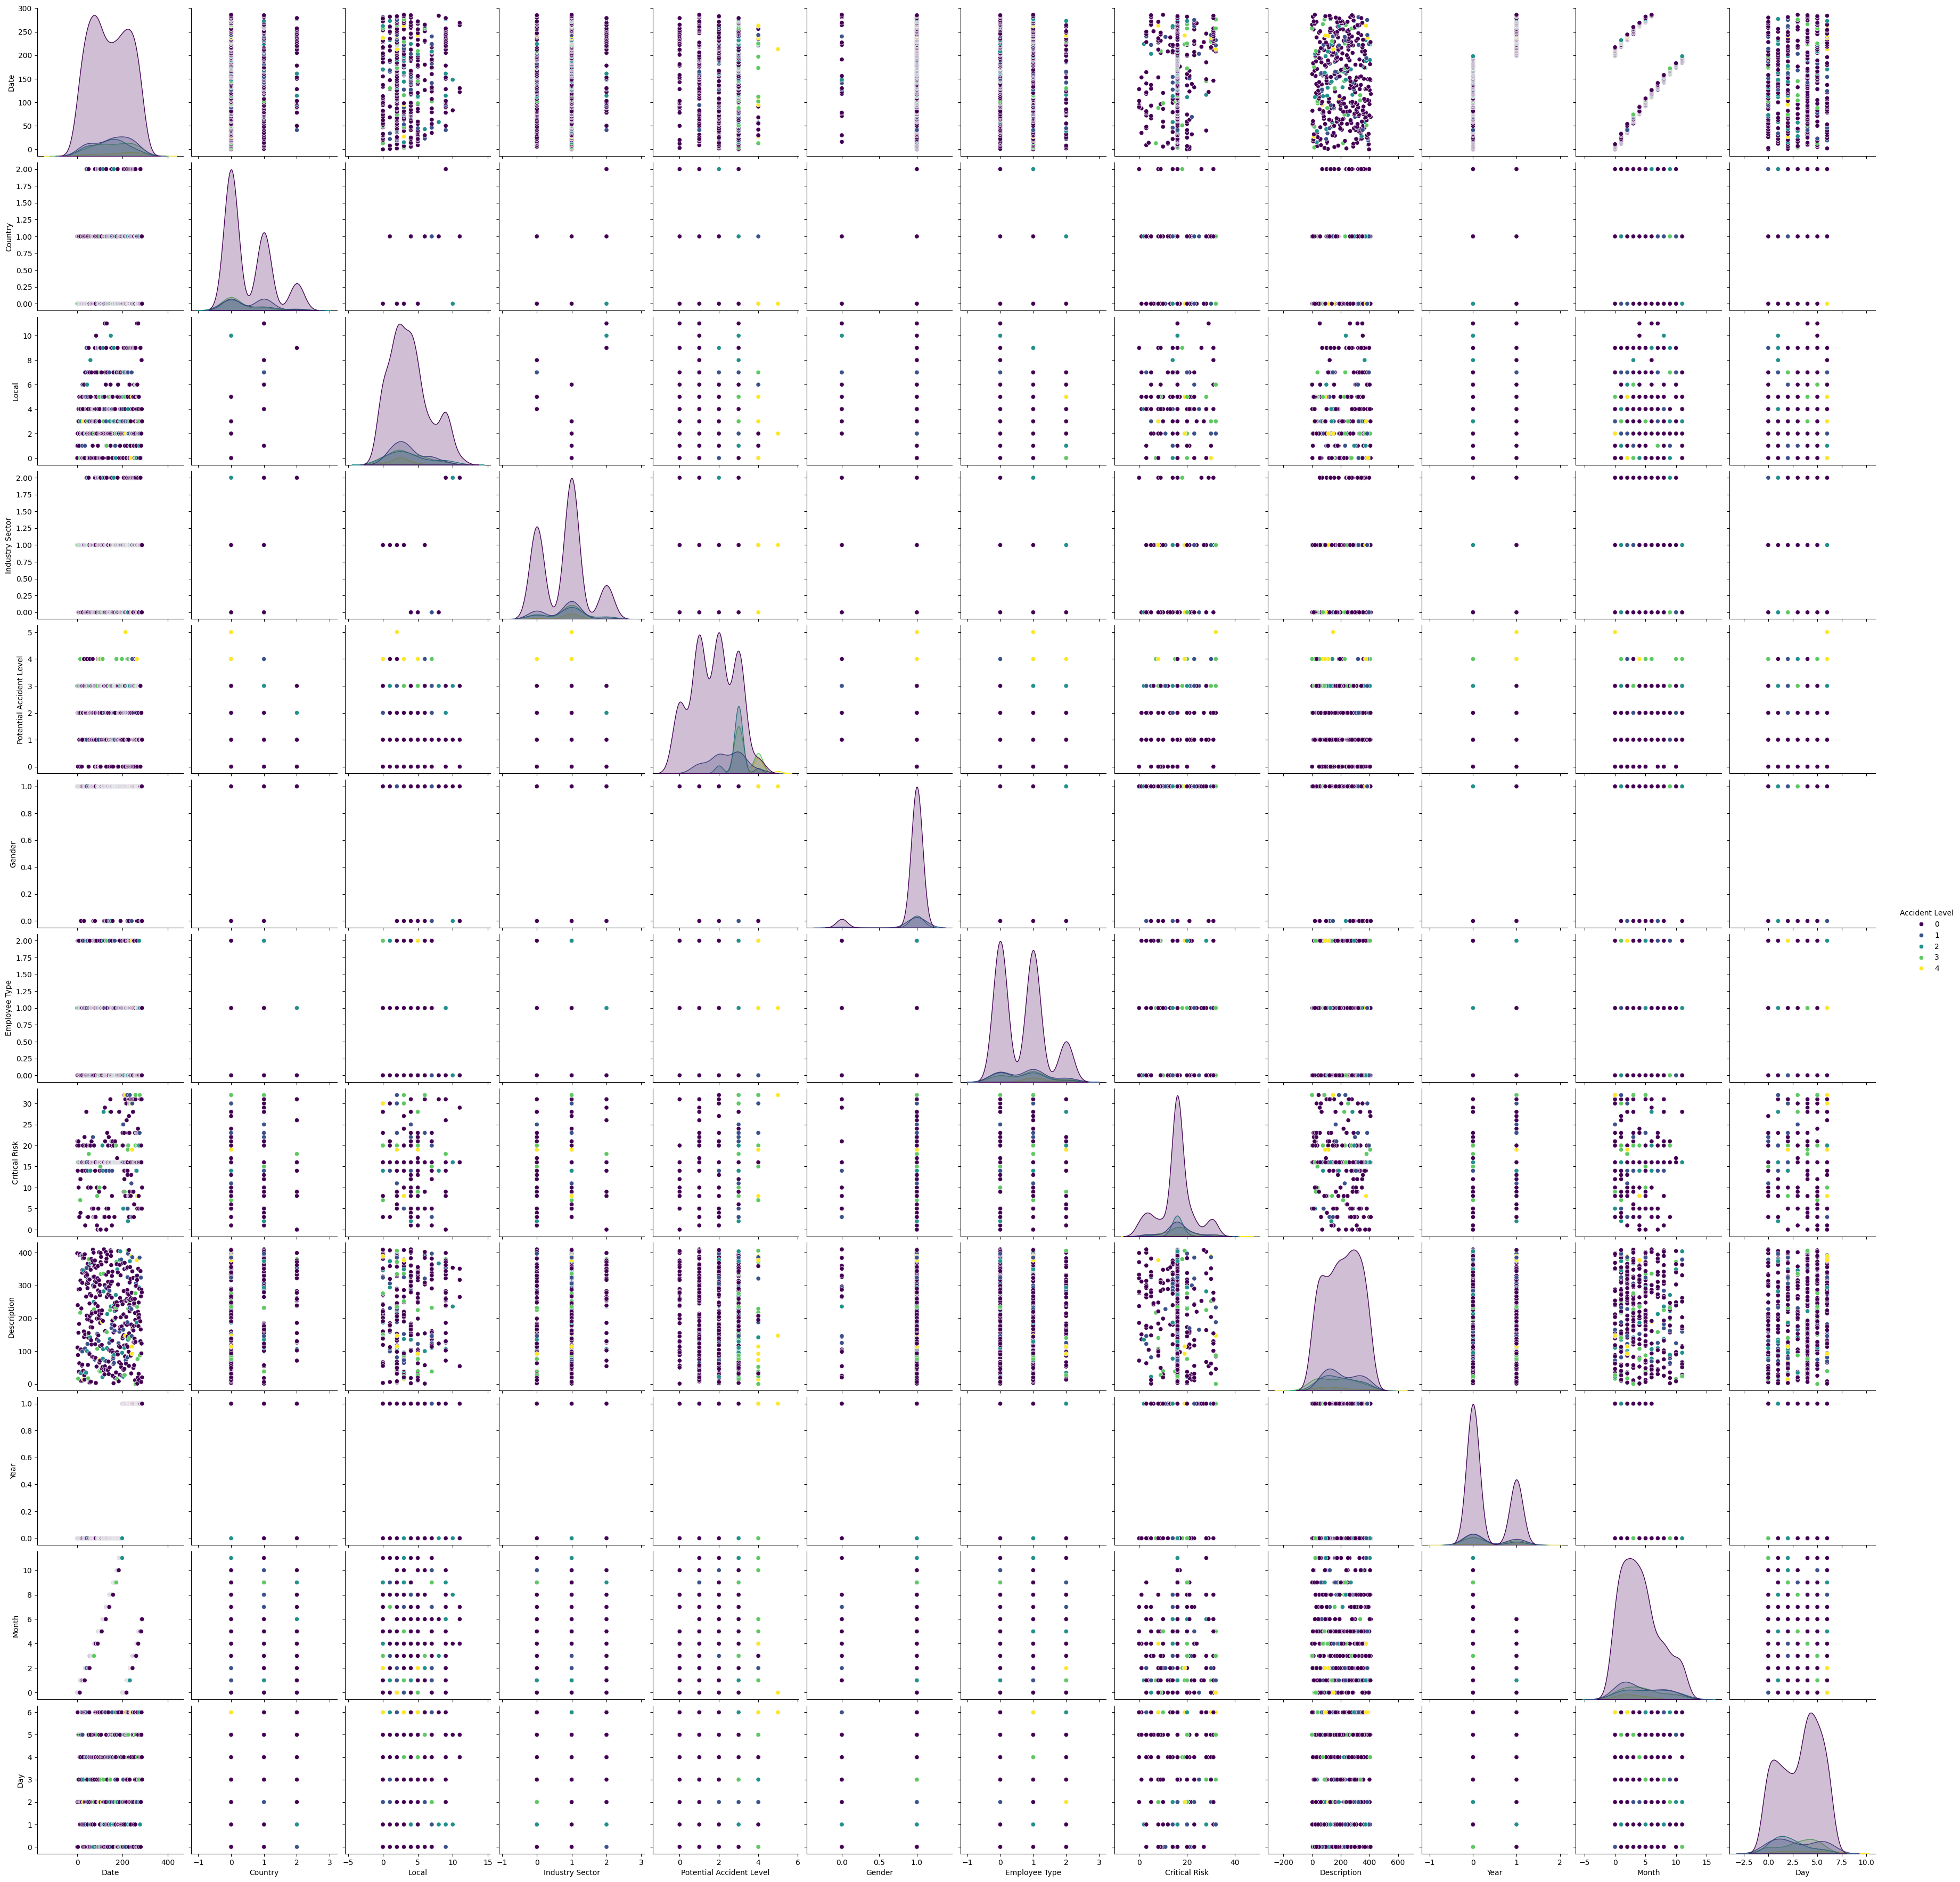

In [22]:
# Encoding our dataframe
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Create a larger pairplot with customized colors
sns.pairplot(df_encoded, diag_kind = 'kde', hue = 'Accident Level', height = 3, palette = 'viridis')

# Show the plot
plt.show()

> **Insights from the Pair Plot**
> 
> 1. **Potential Accident Level**: This is the most distinguishable factor in the pair plot concerning **"Accident Level"**, which makes sense as it represents the estimated severity of an accident *before* it occurs
> 
> 2. **Employee Type**: The pair plot shows some differentiation in accident severity based on the type of worker involved, though the impact is relatively **subtle**
> 
> 3. **Critical Risk**: Certain **critical risks** appear more frequently in severe accidents when viewed in the pair plot, although the distinction is **not very pronounced**
> 
> 4. **Gender**: The pair plot suggests that **gender** might have a small influence on accident levels, but this effect is **not strong**
> 
> 5. **Industry Sector**: The **industry type** shows a **weak pattern** in the pair plot with accident levels, indicating that accidents happen across industries somewhat **evenly**
> 
> 6. **Local & Country**: The **geographical location** has a slight negative pattern in the pair plot, suggesting that accident severity **doesn't significantly depend** on location


#### Correlation Heatmap for all Numerical Variables

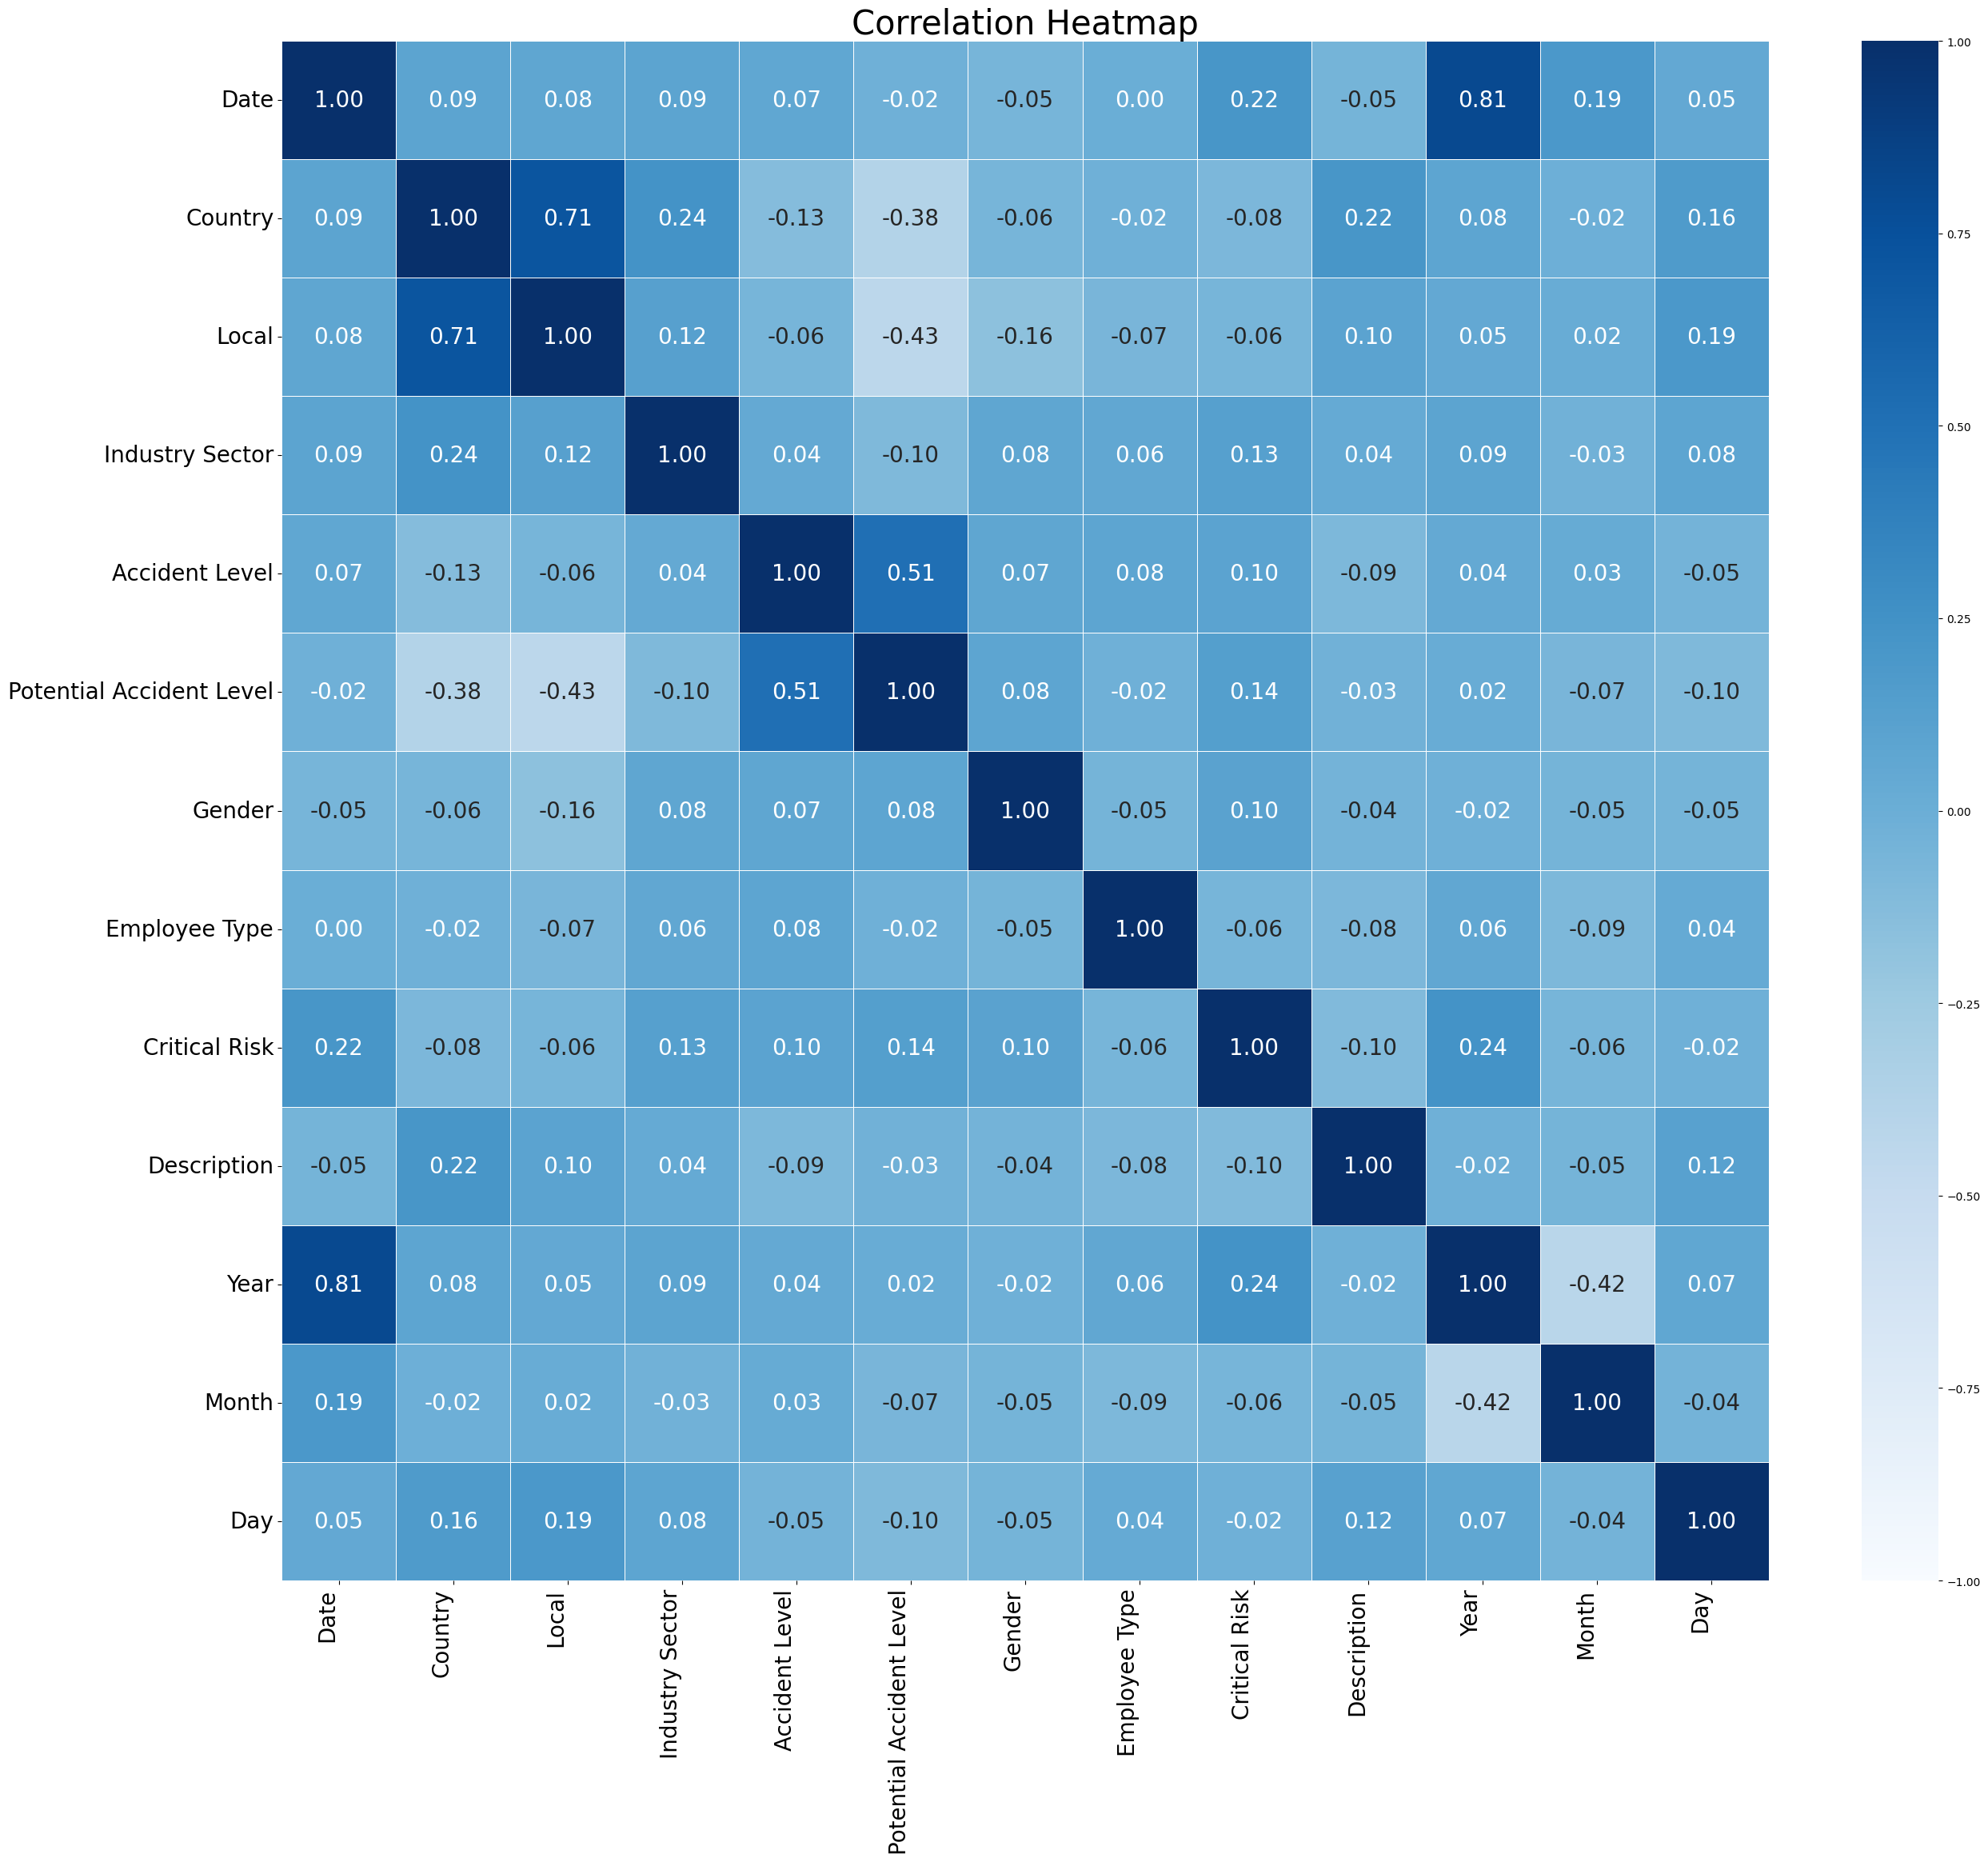

In [23]:
# Set the figure size
plt.figure(figsize=(30, 25))

# Create the heatmap
sns.heatmap(df_encoded.corr(),  
            annot=True, 
            fmt=".2f",        # Limit decimal places
            cmap='Blues', 
            vmin=-1, vmax=1,  # Standard correlation range
            linewidths=0.5,   # Add grid lines for clarity
            annot_kws={"size": 20})     # Smaller font size for annotations

# Customize ticks and labels
plt.yticks(rotation=0, fontsize=20)
plt.xticks(rotation=90, ha='right', fontsize=20)

# Add a title
plt.title('Correlation Heatmap', fontsize=30)

# Show the plot
plt.show()

**Correlation Insights**
> 
> **Strong Correlations**
> - **Year and Date (0.81):** This is expected, as the **year** is derived directly from the **date**.  
> - **Country and City (0.71):** A strong correlation indicates that **cities** are grouped under specific **countries**, which is logical.
> 
> ---
> 
> **Moderate Correlations**
> - **Accident Level and Potential Accident Level (0.51):** Suggests that the **severity of an accident** is somewhat related to its **potential risk level**.  
> - **Critical Risk and Year (0.24):** Shows a **weak to moderate correlation**, indicating **trends over time** related to critical risks.
> 
> ---
> **Negative Correlations**
> - **Potential Accident Level and Country (-0.38):** Indicates that **different countries** might report potential accident levels differently, possibly due to **varying safety standards**.  
> - **Month and Year (-0.42):** Likely due to **variations in reporting frequency** across different **years and months**.
> 
> ---
> **Weak or No Correlation**
> - Variables such as **Gender**, **Employee Type**, and **Description** show **very weak correlations** with other attributes, indicating **little to no direct relationship**.
> 
> ---
> These insights help identify key relationships and potential areas for further analysis.


## Feature Engineering

### Handling Class Imbalance

> Our dataset originally categorizes accidents from Level I (least severe) to Level V (most severe) which we can see based on the description of particular categories:
> * Level I: Minor Accident
> * Level II: Slight Injury
> * Level III: Moderate Injury
> * Level IV: Severe Injury
> * Level V: Very Severe Injury

> As part of **Feature Engineering**, we are combining our Accident Level Classes to 3 classes - Low, Medium and High. This will help us improve our model training and decision-making:
> - 'Low' for minor incidents with minimal impact (Having only Level I)
> - 'Medium' for incidents that cause noticeable injuries but are not life-threatening (Combination of Level II and Level III)
> - 'High' for severe injuries that may require significant medical intervention or cause lasting damage (Combination of Level IV and Level V)

> We also have Level VI for Potential Accident Level category however, Accident Level column doesn't have any cases for Level VI in our dataset

In [24]:
# Defining the mapping for 3-class classification
accident_mapping = {
    "I": "Low",       # Minor incidents
    "II": "Medium",   # Noticeable injuries
    "III": "Medium",  # Grouped with Level II
    "IV": "High",     # Severe injuries
    "V": "High"       # Grouped with Level IV
}

# Apply the mapping
df["Accident Category"] = df["Accident Level"].map(accident_mapping)

# Check new class distribution
class_distribution = df["Accident Category"].value_counts()
print("\nNew Class Distribution:\n", class_distribution)
df.head()


New Class Distribution:
 Accident Category
Low       309
Medium     71
High       38
Name: count, dtype: int64


Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee Type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month        Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1     Friday   
1  During the activation of a sodium sulphide pum...  2016      1   Saturday   
2  In the sub-station MILPO located at level +170...  2016      1  Wednesday   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1     Friday   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1     Sunday   

  Accident Category  
0               Low  
1               Low  
2               Low  
3               Low  
4              High

### <u>NLP Text Processing</u>

### Removing special characters from the text

In [25]:
# defining a function to remove special characters, lowering the case, remove extra spaces
def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text


In [26]:
# Applying the function to remove special characters
df['Cleaned_Description'] = df['Description'].apply(remove_special_characters)

# checking a couple of instances of cleaned data
df.loc[0:6, ['Description','Cleaned_Description']]

Description  \
0  While removing the drill rod of the Jumbo 08 f...   
1  During the activation of a sodium sulphide pum...   
2  In the sub-station MILPO located at level +170...   
3  Being 9:45 am. approximately in the Nv. 1880 C...   
4  Approximately at 11:45 a.m. in circumstances t...   
5  During the unloading operation of the ustulado...   
6  The collaborator reports that he was on street...   

                                 Cleaned_Description  
0  while removing the drill rod of the jumbo for ...  
1  during the activation of a sodium sulphide pum...  
2  in the substation milpo located at level when ...  
3  being am approximately in the nv cx ob the per...  
4  approximately at am in circumstances that the ...  
5  during the unloading operation of the ustulado...  
6  the collaborator reports that he was on street...

### Removing stopwords

In [27]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

In [28]:
# Applying the function to remove stop words using the NLTK library
df['Cleaned_Description_without_stopwords'] = df['Cleaned_Description'].apply(remove_stopwords)

# checking a couple of instances of cleaned data
df.loc[0:6, ['Cleaned_Description','Cleaned_Description_without_stopwords']]

Cleaned_Description  \
0  while removing the drill rod of the jumbo for ...   
1  during the activation of a sodium sulphide pum...   
2  in the substation milpo located at level when ...   
3  being am approximately in the nv cx ob the per...   
4  approximately at am in circumstances that the ...   
5  during the unloading operation of the ustulado...   
6  the collaborator reports that he was on street...   

               Cleaned_Description_without_stopwords  
0  removing drill rod jumbo maintenance superviso...  
1  activation sodium sulphide pump piping uncoupl...  
2  substation milpo located level collaborator ex...  
3  approximately nv cx ob personnel begins task u...  
4  approximately circumstances mechanics anthony ...  
5  unloading operation ustulado bag need unclog d...  
6  collaborator reports street holding left hand ...

### Stemming

In [29]:
# Loading the Porter Stemmer
ps = PorterStemmer()

# defining a function to perform stemming
def apply_porter_stemmer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([ps.stem(word) for word in words])

    return new_text

In [30]:
# Applying the function to perform stemming
df['final_cleaned_description'] = df['Cleaned_Description_without_stopwords'].apply(apply_porter_stemmer)

# checking a couple of instances of cleaned data
df.loc[0:6,['Cleaned_Description_without_stopwords','final_cleaned_description']]


Cleaned_Description_without_stopwords  \
0  removing drill rod jumbo maintenance superviso...   
1  activation sodium sulphide pump piping uncoupl...   
2  substation milpo located level collaborator ex...   
3  approximately nv cx ob personnel begins task u...   
4  approximately circumstances mechanics anthony ...   
5  unloading operation ustulado bag need unclog d...   
6  collaborator reports street holding left hand ...   

                           final_cleaned_description  
0  remov drill rod jumbo mainten supervisor proce...  
1  activ sodium sulphid pump pipe uncoupl sulfid ...  
2  substat milpo locat level collabor excav work ...  
3  approxim nv cx ob personnel begin task unlock ...  
4  approxim circumst mechan anthoni group leader ...  
5  unload oper ustulado bag need unclog discharg ...  
6  collabor report street hold left hand volumetr...

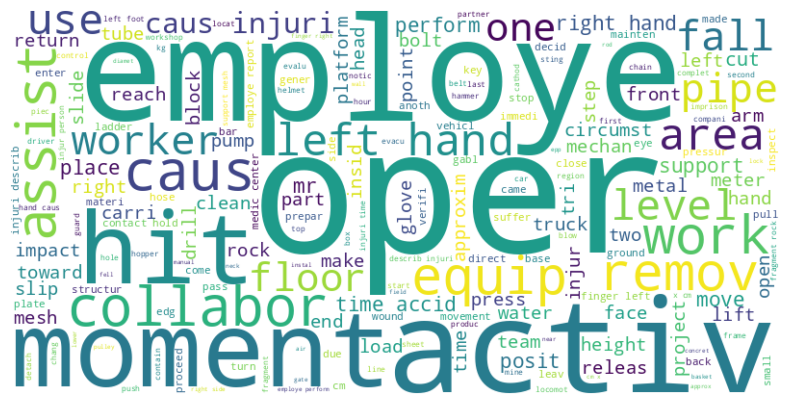

In [31]:
# Word Cloud on the 'final_cleaned_description' column
def generate_wordcloud(df):
    text = " ".join(desc for desc in df['final_cleaned_description'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_wordcloud(df)

>This word cloud paints a vivid picture of the workplace environment, with words like **"employee," "activity," "operation," "work,"** and **"assist"** standing out. It’s clear that people and their roles are at the heart of daily operations, highlighting how much employees contribute to getting the job done.
>
>But alongside the tasks, words like **"cause," "removal," "impact," "injury,"** and **"fall"** pop up—reminders of the risks that come with the job. These aren’t just words; they represent real incidents, challenges, and moments where things didn’t go as planned.
>
>Interestingly, words like **"collaborate"** and **"assist"** shine through, reflecting the strong sense of teamwork. It’s a reminder that while risks are part of the job, having each other's backs, working together, and supporting one another play a huge role in keeping everyone safe.


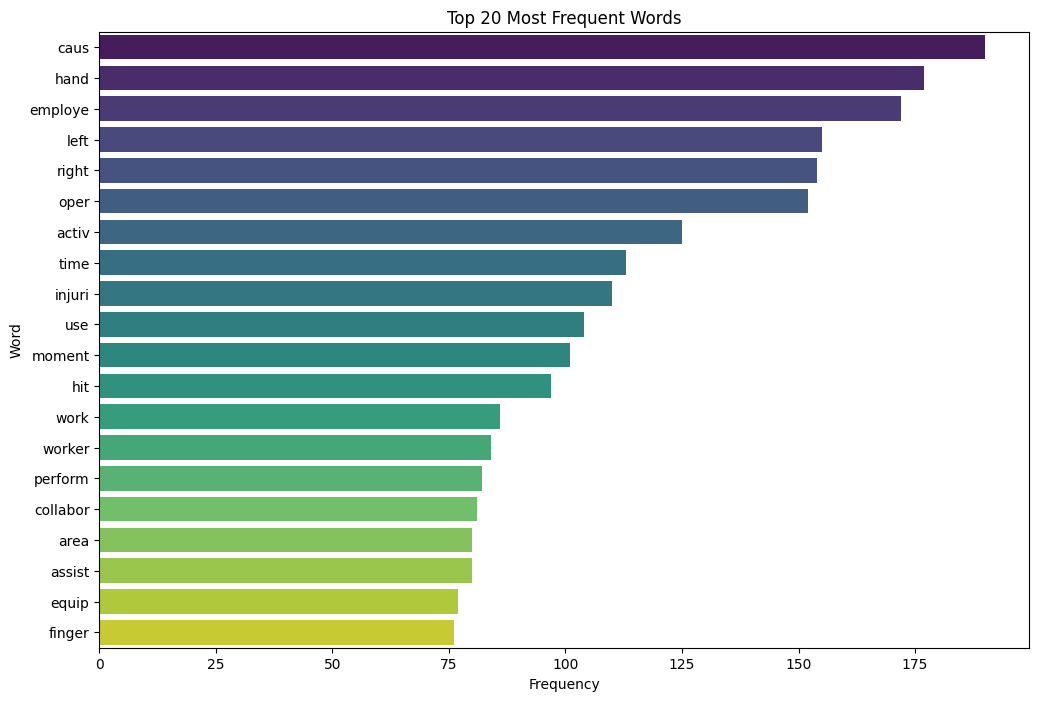

In [32]:
# Frequency Plot of Words
def plot_word_frequencies(df):
    # Vectorizing the text column
    vectorizer = CountVectorizer(stop_words='english', max_features=50)  # Limit to top 50 words
    X = vectorizer.fit_transform(df['final_cleaned_description'])
    word_freq = np.asarray(X.sum(axis=0)).flatten()
    words = np.array(vectorizer.get_feature_names_out())

    # Creating a DataFrame to view word frequencies
    word_freq_df = pd.DataFrame(list(zip(words, word_freq)), columns=['word', 'frequency'])
    word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

    # color palette for the bars
    palette = sns.color_palette("viridis", n_colors=20) 
    
    # Plotting word frequencies
    plt.figure(figsize=(12, 8))
    sns.barplot(x='frequency', y='word', data=word_freq_df.head(20), hue = 'word', palette=palette)
    plt.title('Top 20 Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

plot_word_frequencies(df)

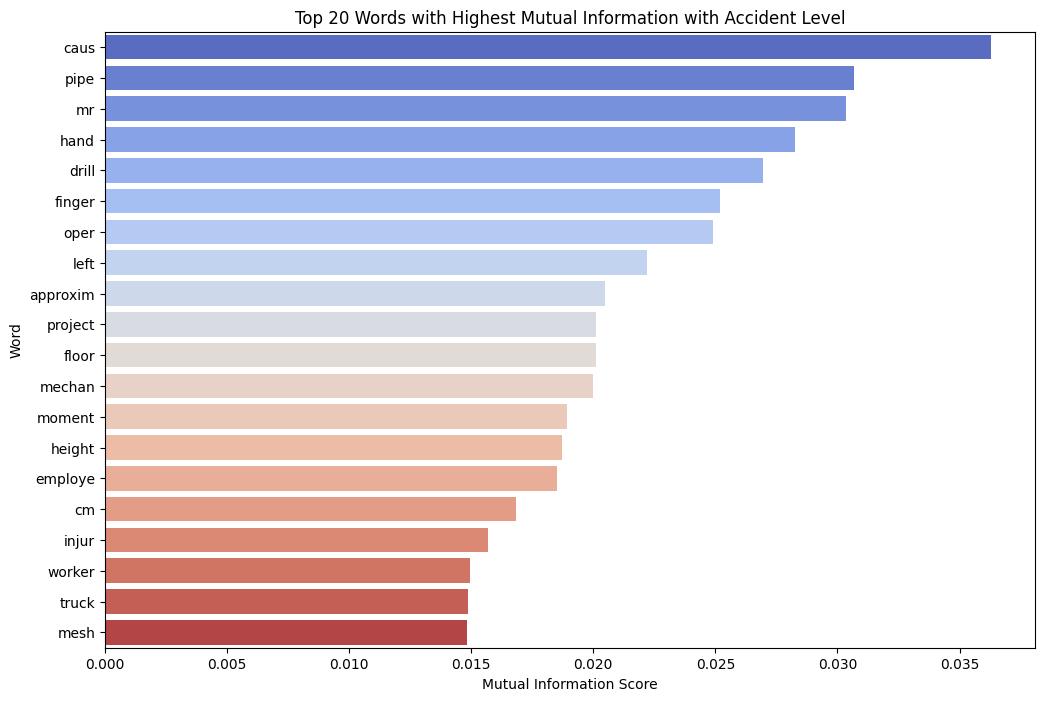

In [33]:
# Correlation Between Frequent Words and 'Accident Level'
def correlation_with_target(df):
    # Encoding the target class ('Accident level')
    le = LabelEncoder()
    df['Accident_Level_encoded'] = le.fit_transform(df['Accident Level'])

    # Vectorizing the text column
    vectorizer = CountVectorizer(stop_words='english', max_features=50)
    X = vectorizer.fit_transform(df['final_cleaned_description'])
    y = df['Accident_Level_encoded']

    # Calculate mutual information between each word and the target class
    mi_scores = []
    for i in range(X.shape[1]):
        mi_scores.append(mutual_info_score(X[:, i].toarray().flatten(), y))

    # Creating a DataFrame to view mutual information scores
    mi_df = pd.DataFrame(list(zip(vectorizer.get_feature_names_out(), mi_scores)), columns=['word', 'MI Score'])
    mi_df = mi_df.sort_values(by='MI Score', ascending=False)

    # color palette for the bars
    palette = sns.color_palette("coolwarm", n_colors=20)
    
    # Plotting mutual information scores
    plt.figure(figsize=(12, 8))
    sns.barplot(x='MI Score', y='word', data=mi_df.head(20), hue = 'word', palette=palette)
    plt.title('Top 20 Words with Highest Mutual Information with Accident Level')
    plt.xlabel('Mutual Information Score')
    plt.ylabel('Word')
    plt.show()

correlation_with_target(df)

> The first bar chart highlights the **top 20 most frequent words** in the dataset, with terms like **"cause," "hand,"** and **"employee"** standing out. These words reflect common themes related to workplace activities, tasks, and safety incidents.
> 
> The second chart displays the **top 20 words with the highest mutual information** with **accident level**, indicating which words are most strongly associated with the severity of accidents. Words like **"cause," "pipe,"** and **"hand"** appear in both charts, emphasizing their critical role in both frequency and risk correlation.
> 
> This overlap suggests that focusing on these key areas could help identify risk patterns and improve workplace safety measures.

### <u>**Dropping Irrelevant Columns**

> We have created 'Accident Category' as the target variable for our dataset. We do not need to have 'Accident Level' and 'Potential Accident Level' in our dataset now as these become insignificant with the introduction of 'Accident Category' column. 
>
> 'Date' column also is divided into Day, Month and Year making it free to get dropped from the dataset

In [34]:
df = df.drop("Date", axis = 1)
df = df.drop("Accident Level", axis = 1)
df = df.drop("Potential Accident Level", axis = 1)

In [35]:
df.head()

Country     Local Industry Sector Gender         Employee Type  \
0  Country_01  Local_01          Mining   Male           Third Party   
1  Country_02  Local_02          Mining   Male              Employee   
2  Country_01  Local_03          Mining   Male  Third Party (Remote)   
3  Country_01  Local_04          Mining   Male           Third Party   
4  Country_01  Local_04          Mining   Male           Third Party   

         Critical Risk                                        Description  \
0              Pressed  While removing the drill rod of the Jumbo 08 f...   
1  Pressurized Systems  During the activation of a sodium sulphide pum...   
2         Manual Tools  In the sub-station MILPO located at level +170...   
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...   
4               Others  Approximately at 11:45 a.m. in circumstances t...   

   Year  Month        Day Accident Category  \
0  2016      1     Friday               Low   
1  2016      1   Saturday               Low   
2  2016      1  Wednesday               Low   
3  2016      1     Friday               Low   
4  2016      1     Sunday              High   

                                 Cleaned_Description  \
0  while removing the drill rod of the jumbo for ...   
1  during the activation of a sodium sulphide pum...   
2  in the substation milpo located at level when ...   
3  being am approximately in the nv cx ob the per...   
4  approximately at am in circumstances that the ...   

               Cleaned_Description_without_stopwords  \
0  removing drill rod jumbo maintenance superviso...   
1  activation sodium sulphide pump piping uncoupl...   
2  substation milpo located level collaborator ex...   
3  approximately nv cx ob personnel begins task u...   
4  approximately circumstances mechanics anthony ...   

                           final_cleaned_description  Accident_Level_encoded  
0  remov drill rod jumbo mainten supervisor proce...                       0  
1  activ sodium sulphid pump pipe uncoupl sulfid ...                       0  
2  substat milpo locat level collabor excav work ...                       0  
3  approxim nv cx ob personnel begin task unlock ...                       0  
4  approxim circumst mechan anthoni group leader ...                       3

## Label Encoding

In [36]:
# Identify categorical columns
categorical_cols = ["Country", "Local", "Industry Sector",
                    "Gender", "Employee Type", "Critical Risk", "Accident Category"]

# Apply Label Encoding to all categorical columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for potential inverse transformations

# Display updated DataFrame
df.head()

Country  Local  Industry Sector  Gender  Employee Type  Critical Risk  \
0        0      0                1       1              1             20   
1        1      1                1       1              0             21   
2        0      2                1       1              2             14   
3        0      3                1       1              1             16   
4        0      3                1       1              1             16   

                                         Description  Year  Month        Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1     Friday   
1  During the activation of a sodium sulphide pum...  2016      1   Saturday   
2  In the sub-station MILPO located at level +170...  2016      1  Wednesday   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1     Friday   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1     Sunday   

   Accident Category                                Cleaned_Description  \
0                  1  while removing the drill rod of the jumbo for ...   
1                  1  during the activation of a sodium sulphide pum...   
2                  1  in the substation milpo located at level when ...   
3                  1  being am approximately in the nv cx ob the per...   
4                  0  approximately at am in circumstances that the ...   

               Cleaned_Description_without_stopwords  \
0  removing drill rod jumbo maintenance superviso...   
1  activation sodium sulphide pump piping uncoupl...   
2  substation milpo located level collaborator ex...   
3  approximately nv cx ob personnel begins task u...   
4  approximately circumstances mechanics anthony ...   

                           final_cleaned_description  Accident_Level_encoded  
0  remov drill rod jumbo mainten supervisor proce...                       0  
1  activ sodium sulphid pump pipe uncoupl sulfid ...                       0  
2  substat milpo locat level collabor excav work ...                       0  
3  approxim nv cx ob personnel begin task unlock ...                       0  
4  approxim circumst mechan anthoni group leader ...                       3

### Split the Target Variable and Predictors

> We will be considering 'Accident Category' as our target variable.
> <br> All other columns will act as predictors.

In [37]:
X = df.drop(columns = ['Accident Category'])  # Predictors (all columns except 'Accident Category')
y = df['Accident Category']  # Target variable, 'Accident Category'

### Split the Data into train, validation, and test sets

> To split our data in 3 sets - train, test and validation, we will folllow the below approach
> * We will be splitting our train and test sets in an 80-20 ratio, i.e., 80% split to train set and 20% split to test set
> * Next we will take our 80% split training set and will apply a train-test split on it again with a 75-25 ratio
>     - This will split the final train test to 75% of previous 80%, i.e., 60% of the total data
>     - The final validation set will be 25% of 80%, i.e., 20% of total data
> * We will also use **'stratify = y'** to ensure that all 3 sets reflect the class proportions same as in the original dataset and splitting is not random and the train-test split doesn't result in an uneven distribution of classes
> 
> The final split would be below:
| Dataset         | Percentage Split |
|-----------------|------------------|
| Train Set       | 60%              |
| Validation Set  | 20%              |
| Test Set        | 20%              |
| **Total**       | 100%             |

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, stratify = y_train, random_state = 42)

In [39]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

print(f"\nNumber of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of validation samples: {len(X_val)}")

# Printing the shapes of the train and test sets
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of X_val:", X_val.shape)
print("\nShape of y_train:", y_train.shape[0])
print("Shape of y_test:", y_test.shape[0])
print("Shape of y_val:", y_val.shape[0])


Number of training samples: 250
Number of testing samples: 84
Number of validation samples: 84

Shape of X_train: (250, 14)
Shape of X_test: (84, 14)
Shape of X_val: (84, 14)

Shape of y_train: 250
Shape of y_test: 84
Shape of y_val: 84


***

# <u>Word Embeddings</u>

> Word embeddings will be done using below methods:
> * Word2Vec
> * GloVe
> * Sentence Transformer
> * TF-IDF
> * Bag of Words (BoW)

### Using Word2Vec

In [40]:
# Creating a list of all words in our data
list_of_words = [item.split(" ") for item in df['final_cleaned_description'].values]

flat_list_of_words = [word for sublist in list_of_words for word in sublist]

print("\n Number of words in our data - ", len(flat_list_of_words))


 Number of words in our data -  13712


In [41]:
# Creating an instance of Word2Vec

word2vec_model = Word2Vec(list_of_words,
                          vector_size = 200,
                          min_count = 1,
                          window = 5,
                          workers = 6)
word2vec_model

In [42]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(word2vec_model.wv.key_to_index)))

Length of the vocabulary is 2284


In [43]:
# Checking the word embedding of a random word
random_word = 'accident'
word2vec_model.wv[random_word]

array([-3.37621226e-04,  3.77410068e-03,  1.79451681e-03,  3.77663132e-03,
       -1.91464764e-03, -1.96212973e-03, -3.68073769e-03,  6.96802698e-03,
       -1.30749086e-03,  2.99211522e-03, -6.79945981e-04, -3.08721000e-03,
        2.10195594e-03,  9.42128245e-04, -4.98327985e-03, -6.35044184e-03,
        2.49802484e-03, -4.40180441e-03,  1.51990971e-03,  1.02162291e-03,
        4.44159051e-03, -6.70778845e-03,  1.06399483e-03, -9.72829468e-04,
        3.96361342e-03, -9.49141162e-04,  3.99223249e-03, -6.42957748e-04,
       -4.55213711e-03, -7.09228625e-04, -2.50244001e-03,  1.06981699e-03,
       -1.09699764e-03, -3.48456600e-03,  1.84537517e-03,  6.29364373e-03,
        5.22836344e-03,  4.63317055e-03, -5.12305507e-03, -1.83835113e-03,
        2.18195701e-03,  4.08131833e-04,  1.81924191e-03, -2.63074669e-03,
        7.51104718e-03,  2.92979437e-03, -1.37394271e-03,  3.05605214e-03,
       -1.45575858e-03,  2.82122963e-03,  9.76301206e-04,  1.25642528e-03,
       -3.96670774e-03, -

In [44]:
# checking words similar to a random word. 'employee' in below case

similar_words = word2vec_model.wv.most_similar(random_word, topn = 5)
print(f"\nWords similar to '{random_word}':", similar_words)


Words similar to 'accident': [('produc', 0.6144047975540161), ('identifi', 0.611992359161377), ('proceed', 0.6071212291717529), ('fifth', 0.6070601344108582), ('center', 0.6066087484359741)]


> Now that we are done with embedding using Word2Vec, we will now proceed with summarizing each text/sentence  into a single average vector representation instead of having different vectors for each word of the sentence. 
>  
> * With this, each sentence text will now be represented by a single vector stored in a new column, named **'Word2Vec_Embedding'**
> * This will help us reduce the complexity of different vectors into a compact single vector format that can be easily used further

In [45]:
def get_avg_word2vec(text_in_list_of_words, model, vector_size):
    """
    Returns the average Word2Vec vector for a text
    text_in_list_of_words: This is the individual text which needs to be averaged to a single vector
    model: This is the initialized and trained Word2Vec model
    vector_size: The size of final averaged vector
    """
    valid_words = [model.wv[word] for word in text_in_list_of_words if word in model.wv]
    if len(valid_words) > 0:
        return np.mean(valid_words, axis = 0)
    else:
        return np.zeros(vector_size)

In [46]:
# Creating embeddings for the full dataset and storing in a new column, 'Word2Vec_Embedding'
text_to_words_list = df['final_cleaned_description'].apply(lambda text: text.split())

df['Word2Vec_Embedding'] = text_to_words_list.apply(lambda words_list: 
                                                            get_avg_word2vec(words_list, word2vec_model, 100))
df.head()

Country  Local  Industry Sector  Gender  Employee Type  Critical Risk  \
0        0      0                1       1              1             20   
1        1      1                1       1              0             21   
2        0      2                1       1              2             14   
3        0      3                1       1              1             16   
4        0      3                1       1              1             16   

                                         Description  Year  Month        Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1     Friday   
1  During the activation of a sodium sulphide pum...  2016      1   Saturday   
2  In the sub-station MILPO located at level +170...  2016      1  Wednesday   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1     Friday   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1     Sunday   

   Accident Category                                Cleaned_Description  \
0                  1  while removing the drill rod of the jumbo for ...   
1                  1  during the activation of a sodium sulphide pum...   
2                  1  in the substation milpo located at level when ...   
3                  1  being am approximately in the nv cx ob the per...   
4                  0  approximately at am in circumstances that the ...   

               Cleaned_Description_without_stopwords  \
0  removing drill rod jumbo maintenance superviso...   
1  activation sodium sulphide pump piping uncoupl...   
2  substation milpo located level collaborator ex...   
3  approximately nv cx ob personnel begins task u...   
4  approximately circumstances mechanics anthony ...   

                           final_cleaned_description  Accident_Level_encoded  \
0  remov drill rod jumbo mainten supervisor proce...                       0   
1  activ sodium sulphid pump pipe uncoupl sulfid ...                       0   
2  substat milpo locat level collabor excav work ...                       0   
3  approxim nv cx ob personnel begin task unlock ...                       0   
4  approxim circumst mechan anthoni group leader ...                       3   

                                  Word2Vec_Embedding  
0  [0.0049478794, -0.004582413, 0.003834784, 0.01...  
1  [0.001964574, -0.0027313854, 0.001979902, 0.00...  
2  [0.0038760058, -0.0035065245, 0.0039448733, 0....  
3  [0.0039243456, -0.0038393158, 0.0032891822, 0....  
4  [0.0033181403, -0.0036052873, 0.0030573579, 0....

### Using GloVe

In [47]:
glove_file = "glove.6B.100d.txt.word2vec"

#Loading the GloVe Model
glove_model = KeyedVectors.load_word2vec_format(glove_file, binary = False)

glove_model

> Here, we are loading pre-trained GloVe word embeddings into a format that can be used with the Gensim library.
> * Since, the file says 6B.100d, it means our pre-trained model was trained on a corpus of 6 billion tokens (words) and each word is 100-dimensional
> * We have kept **'binary = false'** as we want the file in a plain text format and not a binary format for easier future use
> * **glove_model** will now have the pretrained glove vectors

In [48]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


In [49]:
# Checking the word embedding of a random word
random_word = "accident"
glove_model[random_word]

array([-6.3287e-03, -3.7913e-01,  4.0992e-01, -3.8438e-03, -8.1139e-01,
       -6.7840e-01,  2.5995e-01,  1.0903e+00,  6.0039e-01,  6.8617e-02,
        6.0529e-01,  9.9349e-01,  6.2516e-01, -6.4927e-02, -1.3299e-01,
       -1.1893e-01,  7.2227e-02, -2.9411e-01, -5.2764e-01,  7.9741e-01,
        4.9420e-01, -8.8902e-02,  2.3917e-01, -1.3490e-04,  1.0083e-01,
        3.0154e-01, -8.5693e-01,  6.0000e-01,  3.9684e-01,  2.3637e-01,
       -5.3385e-01,  2.2272e-02, -1.1326e-01,  7.8765e-02, -9.8925e-01,
       -4.5780e-01, -1.6784e-01,  3.2173e-02,  3.1255e-01,  5.6557e-01,
       -3.1221e-01,  3.2615e-01,  2.5084e-01, -6.2934e-01, -1.8363e-03,
        6.9551e-01,  5.7464e-01,  4.4739e-02, -2.4990e-01, -7.9119e-01,
        5.2257e-01, -2.1110e-01, -1.6103e-01,  9.8529e-01,  1.2813e-01,
       -1.5351e+00, -5.6295e-01,  4.1564e-01,  1.8002e+00,  1.0223e+00,
       -1.4897e-01,  9.9298e-01,  5.4087e-01,  2.7504e-01,  4.1355e-01,
        2.8260e-01, -3.0770e-01, -6.3867e-01, -3.3489e-01,  3.98

> Now, that our model is created, we will now be summarizing each of the Description data to a single vector of 100 dimensions
> * The function will find the embeddings for the valid words and retrieve it. We will use the previous method, **get_avg_embedding** for this
> * It will then average the values of each word in the sentence and result in an averaged vector
> * This will be stored in **'GloVe_Embedding'** column

In [50]:
def get_avg_glove(text_in_list_of_words, model, vector_size):
    """
    Returns the average Word2Vec vector for a text
    text_in_list_of_words: This is the individual text which needs to be averaged to a single vector
    model: This is the initialized and trained GloVe model
    vector_size: The size of final averaged vector
    """
    valid_words = [model[word] for word in text_in_list_of_words if word in model]
    if len(valid_words) > 0:
        return np.mean(valid_words, axis = 0)
    else:
        return np.zeros(vector_size)

In [51]:
# Creating embeddings for the full dataset and storing in a new column, 'GloVe_Embedding'
text_to_words_list = df['final_cleaned_description'].apply(lambda text: text.split())

df['GloVe_Embedding'] = text_to_words_list.apply(lambda words_list: 
                                                         get_avg_glove(words_list, glove_model, 100))
df.head()

Country  Local  Industry Sector  Gender  Employee Type  Critical Risk  \
0        0      0                1       1              1             20   
1        1      1                1       1              0             21   
2        0      2                1       1              2             14   
3        0      3                1       1              1             16   
4        0      3                1       1              1             16   

                                         Description  Year  Month        Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1     Friday   
1  During the activation of a sodium sulphide pum...  2016      1   Saturday   
2  In the sub-station MILPO located at level +170...  2016      1  Wednesday   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1     Friday   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1     Sunday   

   Accident Category                                Cleaned_Description  \
0                  1  while removing the drill rod of the jumbo for ...   
1                  1  during the activation of a sodium sulphide pum...   
2                  1  in the substation milpo located at level when ...   
3                  1  being am approximately in the nv cx ob the per...   
4                  0  approximately at am in circumstances that the ...   

               Cleaned_Description_without_stopwords  \
0  removing drill rod jumbo maintenance superviso...   
1  activation sodium sulphide pump piping uncoupl...   
2  substation milpo located level collaborator ex...   
3  approximately nv cx ob personnel begins task u...   
4  approximately circumstances mechanics anthony ...   

                           final_cleaned_description  Accident_Level_encoded  \
0  remov drill rod jumbo mainten supervisor proce...                       0   
1  activ sodium sulphid pump pipe uncoupl sulfid ...                       0   
2  substat milpo locat level collabor excav work ...                       0   
3  approxim nv cx ob personnel begin task unlock ...                       0   
4  approxim circumst mechan anthoni group leader ...                       3   

                                  Word2Vec_Embedding  \
0  [0.0049478794, -0.004582413, 0.003834784, 0.01...   
1  [0.001964574, -0.0027313854, 0.001979902, 0.00...   
2  [0.0038760058, -0.0035065245, 0.0039448733, 0....   
3  [0.0039243456, -0.0038393158, 0.0032891822, 0....   
4  [0.0033181403, -0.0036052873, 0.0030573579, 0....   

                                     GloVe_Embedding  
0  [-0.14254056, 0.1762849, 0.022502007, -0.19460...  
1  [-0.16578694, 0.20287126, -0.07683354, -0.0456...  
2  [-0.1420229, 0.14836252, 0.028008433, -0.17408...  
3  [-0.1388698, -0.040865235, 0.0032027573, -0.12...  
4  [-0.1269299, 0.031568, -0.055016093, -0.204989...

### Using Sentence Transformer

In [52]:
# Defining the model
sentence_transformer_model = SentenceTransformer('all-MiniLM-L6-v2')

sentence_transformer_model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

> We've loaded the **all-MiniLM-L6-v2 model** here. It is a compact and efficient model that generates high-quality sentence embeddings
> * **MiniLM:** A lightweight model based on Transformers
> * **L6:** It has 6 layers, making it computationally efficient
> * **v2:** A fine-tuned version for better accuracy
>
> By default, the pre-trained all-MiniLM-L6-v2 model is a 768-dimensional vector, meaning it has 768 numerical values in 1 vector

In [53]:
# Getting embedding for a single Description Text
random_news = df['final_cleaned_description'].iloc[0]
embedding = sentence_transformer_model.encode(random_news)
print("\n Cleaned News Article Example - ", random_news)
print("\nSentence Transformer Embedding for first news article:\n", embedding)


 Cleaned News Article Example -  remov drill rod jumbo mainten supervisor proce loosen support intermedi central facilit remov see mechan support one end drill equip pull hand bar acceler remov moment bar slide point support tighten finger mechan drill bar beam jumbo

Sentence Transformer Embedding for first news article:
 [-5.83910570e-02 -1.85151901e-02 -2.64099729e-03 -1.52495233e-02
 -1.09215379e-01  2.93994471e-02  2.39257030e-02  4.32314537e-02
 -6.29347116e-02  2.88824160e-02  4.29037139e-02 -1.20463665e-04
 -3.51383984e-02 -1.16187520e-02 -6.05066717e-02  5.74241504e-02
 -2.93129473e-04  3.13549526e-02  1.09500624e-02 -3.69974598e-02
  5.19531488e-04 -1.84541848e-02 -1.34072667e-02 -2.68476959e-02
 -1.06333524e-01  5.23765683e-02 -6.04821444e-02  2.09673010e-02
  3.76024097e-02 -9.81916413e-02 -2.43850891e-02  1.72222126e-02
  9.55908559e-03 -3.16833034e-02 -4.55957912e-02  6.11252822e-02
 -1.95393916e-02 -1.23174954e-02 -3.82162072e-02 -6.29551942e-03
 -1.45713715e-02  2.2191

> Now, we will proceed with generating vector embeddings for all the Description texts in our dataset.
>
> Using sentence transformer model will result in a 768-dimensional embedding that captures the specific sentence's meaning. this will be stored in a new column, **'SentenceTransformer_Embedding'**

In [54]:
# Generating averaged embeddings for each Description Text
start_time = time.time()
df['SentenceTransformer_Embedding'] = df['final_cleaned_description'].apply(lambda text: 
                                                                               sentence_transformer_model.encode(text))
end_time = time.time()

total_time = end_time - start_time

if(total_time < 60):
    print(f"\n Total time taken for generating averaged embeddings using Sentence Transformer - {total_time:.2f} seconds")
else:
    print(f"\n Total time taken for generating averaged embeddings using Sentence Transformer - ",
          int(total_time / 60), "minute(s)", int(total_time % 60), "second(s)")

df.head()


 Total time taken for generating averaged embeddings using Sentence Transformer - 2.80 seconds


Country  Local  Industry Sector  Gender  Employee Type  Critical Risk  \
0        0      0                1       1              1             20   
1        1      1                1       1              0             21   
2        0      2                1       1              2             14   
3        0      3                1       1              1             16   
4        0      3                1       1              1             16   

                                         Description  Year  Month        Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1     Friday   
1  During the activation of a sodium sulphide pum...  2016      1   Saturday   
2  In the sub-station MILPO located at level +170...  2016      1  Wednesday   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1     Friday   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1     Sunday   

   Accident Category                                Cleaned_Description  \
0                  1  while removing the drill rod of the jumbo for ...   
1                  1  during the activation of a sodium sulphide pum...   
2                  1  in the substation milpo located at level when ...   
3                  1  being am approximately in the nv cx ob the per...   
4                  0  approximately at am in circumstances that the ...   

               Cleaned_Description_without_stopwords  \
0  removing drill rod jumbo maintenance superviso...   
1  activation sodium sulphide pump piping uncoupl...   
2  substation milpo located level collaborator ex...   
3  approximately nv cx ob personnel begins task u...   
4  approximately circumstances mechanics anthony ...   

                           final_cleaned_description  Accident_Level_encoded  \
0  remov drill rod jumbo mainten supervisor proce...                       0   
1  activ sodium sulphid pump pipe uncoupl sulfid ...                       0   
2  substat milpo locat level collabor excav work ...                       0   
3  approxim nv cx ob personnel begin task unlock ...                       0   
4  approxim circumst mechan anthoni group leader ...                       3   

                                  Word2Vec_Embedding  \
0  [0.0049478794, -0.004582413, 0.003834784, 0.01...   
1  [0.001964574, -0.0027313854, 0.001979902, 0.00...   
2  [0.0038760058, -0.0035065245, 0.0039448733, 0....   
3  [0.0039243456, -0.0038393158, 0.0032891822, 0....   
4  [0.0033181403, -0.0036052873, 0.0030573579, 0....   

                                     GloVe_Embedding  \
0  [-0.14254056, 0.1762849, 0.022502007, -0.19460...   
1  [-0.16578694, 0.20287126, -0.07683354, -0.0456...   
2  [-0.1420229, 0.14836252, 0.028008433, -0.17408...   
3  [-0.1388698, -0.040865235, 0.0032027573, -0.12...   
4  [-0.1269299, 0.031568, -0.055016093, -0.204989...   

                       SentenceTransformer_Embedding  
0  [-0.058391057, -0.01851519, -0.0026409973, -0....  
1  [-0.05031255, 0.038256533, 0.02560695, -0.0467...  
2  [-0.080239795, 0.001987809, -0.019875638, -0.0...  
3  [-0.07879221, 0.060530663, -0.06068262, -0.070...  
4  [-0.1158196, 0.06217271, -0.038862057, -0.0093...

### Using TF-IDF (Term Frequency - Inverse Document Frequency)

In [55]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer_model = TfidfVectorizer()

tfidf_vectorizer_model

TfidfVectorizer()

In [56]:
# Fit and transform the text data
tfidf_embeddings = tfidf_vectorizer_model.fit_transform(df['final_cleaned_description'])

# Getting feature names (words)
feature_names = tfidf_vectorizer_model.get_feature_names_out()

# Convert TF-IDF matrix to DataFrame for readability
tfidf_df = pd.DataFrame(tfidf_embeddings.toarray(), columns = feature_names)


> We will now have a new column created for TF-IDF embeddings and will name it as **'TF-IDF Embedding'**. This will contain the vectorized format of our Description column

In [57]:
# Generating averaged embeddings for each Description Text

df['TFIDF_Embedding'] = list(tfidf_embeddings.toarray())

df.head()

Country  Local  Industry Sector  Gender  Employee Type  Critical Risk  \
0        0      0                1       1              1             20   
1        1      1                1       1              0             21   
2        0      2                1       1              2             14   
3        0      3                1       1              1             16   
4        0      3                1       1              1             16   

                                         Description  Year  Month        Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1     Friday   
1  During the activation of a sodium sulphide pum...  2016      1   Saturday   
2  In the sub-station MILPO located at level +170...  2016      1  Wednesday   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1     Friday   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1     Sunday   

   Accident Category                                Cleaned_Description  \
0                  1  while removing the drill rod of the jumbo for ...   
1                  1  during the activation of a sodium sulphide pum...   
2                  1  in the substation milpo located at level when ...   
3                  1  being am approximately in the nv cx ob the per...   
4                  0  approximately at am in circumstances that the ...   

               Cleaned_Description_without_stopwords  \
0  removing drill rod jumbo maintenance superviso...   
1  activation sodium sulphide pump piping uncoupl...   
2  substation milpo located level collaborator ex...   
3  approximately nv cx ob personnel begins task u...   
4  approximately circumstances mechanics anthony ...   

                           final_cleaned_description  Accident_Level_encoded  \
0  remov drill rod jumbo mainten supervisor proce...                       0   
1  activ sodium sulphid pump pipe uncoupl sulfid ...                       0   
2  substat milpo locat level collabor excav work ...                       0   
3  approxim nv cx ob personnel begin task unlock ...                       0   
4  approxim circumst mechan anthoni group leader ...                       3   

                                  Word2Vec_Embedding  \
0  [0.0049478794, -0.004582413, 0.003834784, 0.01...   
1  [0.001964574, -0.0027313854, 0.001979902, 0.00...   
2  [0.0038760058, -0.0035065245, 0.0039448733, 0....   
3  [0.0039243456, -0.0038393158, 0.0032891822, 0....   
4  [0.0033181403, -0.0036052873, 0.0030573579, 0....   

                                     GloVe_Embedding  \
0  [-0.14254056, 0.1762849, 0.022502007, -0.19460...   
1  [-0.16578694, 0.20287126, -0.07683354, -0.0456...   
2  [-0.1420229, 0.14836252, 0.028008433, -0.17408...   
3  [-0.1388698, -0.040865235, 0.0032027573, -0.12...   
4  [-0.1269299, 0.031568, -0.055016093, -0.204989...   

                       SentenceTransformer_Embedding  \
0  [-0.058391057, -0.01851519, -0.0026409973, -0....   
1  [-0.05031255, 0.038256533, 0.02560695, -0.0467...   
2  [-0.080239795, 0.001987809, -0.019875638, -0.0...   
3  [-0.07879221, 0.060530663, -0.06068262, -0.070...   
4  [-0.1158196, 0.06217271, -0.038862057, -0.0093...   

                                     TFIDF_Embedding  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

### Using Bag of Words (BoW)

In [58]:
# Initialize CountVectorizer
bow_model = CountVectorizer() 

bow_model

CountVectorizer()

In [59]:
# Fit & transform the text data
bow_model_matrix = bow_model.fit_transform(df['final_cleaned_description'])

# Get feature names (words)
bow_features = bow_model.get_feature_names_out()

# Convert to a DataFrame (BoW representation)
bow_df = pd.DataFrame(bow_model_matrix.toarray(), columns = bow_features)

> For, BoW embedding, we have first created the BoW matrix. this contains the Description text divided into columns separated by each word. Now since this results in getting multiple columns, we will go ahead and average them out to create a single column out of the dense matrix created above. this will be the **'BoW Embedding'** column in our dataset

In [60]:
#  Convert to a dense matrix and average across columns (words)
#bow_embeddings = bow_df.mean(axis = 1)
bow_embeddings = bow_model_matrix.toarray().mean(axis = 1)
# Store the BoW embeddings in the main DataFrame
df['BoW_Embedding'] = bow_embeddings

df.head()

Country  Local  Industry Sector  Gender  Employee Type  Critical Risk  \
0        0      0                1       1              1             20   
1        1      1                1       1              0             21   
2        0      2                1       1              2             14   
3        0      3                1       1              1             16   
4        0      3                1       1              1             16   

                                         Description  Year  Month        Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1     Friday   
1  During the activation of a sodium sulphide pum...  2016      1   Saturday   
2  In the sub-station MILPO located at level +170...  2016      1  Wednesday   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1     Friday   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1     Sunday   

   Accident Category                                Cleaned_Description  \
0                  1  while removing the drill rod of the jumbo for ...   
1                  1  during the activation of a sodium sulphide pum...   
2                  1  in the substation milpo located at level when ...   
3                  1  being am approximately in the nv cx ob the per...   
4                  0  approximately at am in circumstances that the ...   

               Cleaned_Description_without_stopwords  \
0  removing drill rod jumbo maintenance superviso...   
1  activation sodium sulphide pump piping uncoupl...   
2  substation milpo located level collaborator ex...   
3  approximately nv cx ob personnel begins task u...   
4  approximately circumstances mechanics anthony ...   

                           final_cleaned_description  Accident_Level_encoded  \
0  remov drill rod jumbo mainten supervisor proce...                       0   
1  activ sodium sulphid pump pipe uncoupl sulfid ...                       0   
2  substat milpo locat level collabor excav work ...                       0   
3  approxim nv cx ob personnel begin task unlock ...                       0   
4  approxim circumst mechan anthoni group leader ...                       3   

                                  Word2Vec_Embedding  \
0  [0.0049478794, -0.004582413, 0.003834784, 0.01...   
1  [0.001964574, -0.0027313854, 0.001979902, 0.00...   
2  [0.0038760058, -0.0035065245, 0.0039448733, 0....   
3  [0.0039243456, -0.0038393158, 0.0032891822, 0....   
4  [0.0033181403, -0.0036052873, 0.0030573579, 0....   

                                     GloVe_Embedding  \
0  [-0.14254056, 0.1762849, 0.022502007, -0.19460...   
1  [-0.16578694, 0.20287126, -0.07683354, -0.0456...   
2  [-0.1420229, 0.14836252, 0.028008433, -0.17408...   
3  [-0.1388698, -0.040865235, 0.0032027573, -0.12...   
4  [-0.1269299, 0.031568, -0.055016093, -0.204989...   

                       SentenceTransformer_Embedding  \
0  [-0.058391057, -0.01851519, -0.0026409973, -0....   
1  [-0.05031255, 0.038256533, 0.02560695, -0.0467...   
2  [-0.080239795, 0.001987809, -0.019875638, -0.0...   
3  [-0.07879221, 0.060530663, -0.06068262, -0.070...   
4  [-0.1158196, 0.06217271, -0.038862057, -0.0093...   

                                     TFIDF_Embedding  BoW_Embedding  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       0.016285  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       0.011884  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       0.012324  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       0.021567  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       0.018486

<u>**Splitting the Target Variable and Predictors Again**

In [61]:
X_word2vec = np.stack(df['Word2Vec_Embedding'].values)
X_glove = np.stack(df['GloVe_Embedding'].values)
X_sentence_transformer = np.stack(df['SentenceTransformer_Embedding'].values)
X_tfidf = np.stack(df['TFIDF_Embedding'].values)
X_bow = np.array(df['BoW_Embedding'].values).reshape(-1, 1) # reshaping 1D embeddings into 2D to match the dimensions
y = df['Accident Category'].values

# Spliting train, test and validation sets
X_train_idx, X_test_idx, y_train, y_test = train_test_split(
    range(len(y)), y, test_size = 0.2, stratify = y, random_state = 42)

X_train_idx, X_val_idx, y_train, y_val = train_test_split(
    X_train_idx, y_train, test_size = 0.25, stratify = y_train, random_state = 42)

# Applying the same split indices to all embeddings
X_train_word2vec = X_word2vec[X_train_idx]
X_val_word2vec = X_word2vec[X_val_idx]
X_test_word2vec = X_word2vec[X_test_idx]

X_train_glove = X_glove[X_train_idx]
X_val_glove = X_glove[X_val_idx]
X_test_glove = X_glove[X_test_idx]

X_train_sentence_transformer = X_sentence_transformer[X_train_idx]
X_val_sentence_transformer = X_sentence_transformer[X_val_idx]
X_test_sentence_transformer = X_sentence_transformer[X_test_idx]

X_train_tfidf = X_tfidf[X_train_idx]
X_val_tfidf = X_tfidf[X_val_idx]
X_test_tfidf = X_tfidf[X_test_idx]

X_train_bow = X_bow[X_train_idx]
X_val_bow = X_bow[X_val_idx]
X_test_bow = X_bow[X_test_idx]


# Printing shapes to confirm - Creating a dictionary to hold the information
data = {
    "Embedding Type": ["Word2Vec", "GloVe", "Sentence Transformer", "TF-IDF", "BoW"],
    #"Embedding Type": ["Word2Vec", "GloVe", "Sentence Transformer", "TF-IDF"],
    "Training Samples": [
        len(X_train_word2vec),
        len(X_train_glove),
        len(X_train_sentence_transformer),
        len(X_train_tfidf),
        len(X_train_bow)
    ],
    "Validation Samples": [
        len(X_val_word2vec),
        len(X_val_glove),
        len(X_val_sentence_transformer),
        len(X_val_tfidf),
        len(X_val_bow)
    ],
    "Testing Samples": [
        len(X_test_word2vec),
        len(X_test_glove),
        len(X_test_sentence_transformer),
        len(X_test_tfidf),
        len(X_test_bow)
    ],
    "Training Shape": [
        str(X_train_word2vec.shape),
        str(X_train_glove.shape),
        str(X_train_sentence_transformer.shape),
        str(X_train_tfidf.shape),
        str(X_train_bow.shape)
    ],
    "Validation Shape": [
        str(X_val_word2vec.shape),
        str(X_val_glove.shape),
        str(X_val_sentence_transformer.shape),
        str(X_val_tfidf.shape),
        str(X_val_bow.shape)
    ],
    "Testing Shape": [
        str(X_test_word2vec.shape),
        str(X_test_glove.shape),
        str(X_test_sentence_transformer.shape),
        str(X_test_tfidf.shape),
        str(X_test_bow.shape)
    ],
}

evaluation_df = pd.DataFrame(data)

print("\nTrain, Validation, and Test Set Summary:")
evaluation_df.head()



Train, Validation, and Test Set Summary:


Embedding Type  Training Samples  Validation Samples  \
0              Word2Vec               250                  84   
1                 GloVe               250                  84   
2  Sentence Transformer               250                  84   
3                TF-IDF               250                  84   
4                   BoW               250                  84   

   Testing Samples Training Shape Validation Shape Testing Shape  
0               84     (250, 200)        (84, 200)     (84, 200)  
1               84     (250, 100)        (84, 100)     (84, 100)  
2               84     (250, 384)        (84, 384)     (84, 384)  
3               84    (250, 2272)       (84, 2272)    (84, 2272)  
4               84       (250, 1)          (84, 1)       (84, 1)

> We did a split again to ensure that the split aligns with the transformed data (embeddings) and their corresponding target labels. This will help prevent data leakage.

In [62]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_val = le.fit_transform(y_val)

> We did a split again to ensure that the split aligns with the transformed data (embeddings) and their corresponding target labels. This will help prevent data leakage.

<u>**Sampling the data**

> Our 'Accident Level' data is highly imbalanced, with Class I (316 samples) dominating and Class V having only 8 samples. To balance it without overfitting or losing key data, we’ll use SMOTE + Random Undersampling:
>
> ✔ **SMOTE** generates synthetic minority samples<br>
> ✔ **Random Undersampling** reduces excess majority samples
> 
> This hybrid approach improves balance, preserves information, and enhances model performance

In [63]:
def apply_resampling(X_train, y_train, strategy = 'both', embedding_type = 'unknown'):
    """
    Applies SMOTE and undersampling techniques to balance the dataset
    
    Parameters:
    X_train: Training set of intependent variables
    y_train: Training set of target variable
    strategy: String type. 'both' for SMOTE + Undersampling, 'smote' for only SMOTE
    embedding_type: String type. Representing the embedding technique used

    Returns:
    X_resampled, y_resampled: Balanced sets for independent and target variables
    distribution_df: DataFrame summarizing class distributions before and after resampling
    """
    original_distribution = Counter(y_train)
    # Convert any datetime columns to numeric timestamps
    if isinstance(X_train, pd.DataFrame):
        for col in X_train.select_dtypes(include=['datetime64[ns]']):
            print("Timestamp - ", col)
            #X_train[col] = X_train[col].astype(int) / 10**9  # Convert to seconds
    smote = SMOTE(sampling_strategy = 'auto', random_state = 42, k_neighbors = 1)
    
    if strategy == 'both':
        undersample = RandomUnderSampler(sampling_strategy = 'auto', random_state = 42)
        X_smote, y_smote = smote.fit_resample(X_train, y_train)
        X_resampled, y_resampled = undersample.fit_resample(X_smote, y_smote)
    elif strategy == 'smote':
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    else:
        raise ValueError("Invalid strategy. Use 'both' or 'smote'.")
    
    resampled_distribution = Counter(y_resampled)
    
    # Create a DataFrame for before and after sampling
    distribution_df = pd.DataFrame({
        'Embedding Type': embedding_type,
        'Class Distribution': list(original_distribution.keys()),
        'Before Sampling': [original_distribution[c] for c in original_distribution.keys()],
        'After Sampling': [resampled_distribution.get(c, 0) for c in original_distribution.keys()]
    })
    
    # print("\nClass Distribution Before and After Resampling:")
    # print(distribution_df)
    
    return X_resampled, y_resampled, distribution_df

In [64]:
# Dictionary to store resampled datasets
resampled_data = {}
distribution_results = []

embedding_types = ['Word2Vec', 'GloVe', 'Sentence Transformer', "TF-IDF", "BoW"]
datasets = {
    'train': (X_train_word2vec, X_train_glove, X_train_sentence_transformer, X_train_tfidf, X_train_bow,y_train),
    'test': (X_test_word2vec, X_test_glove, X_test_sentence_transformer, X_test_tfidf, X_test_bow, y_test),
    'val': (X_val_word2vec, X_val_glove, X_val_sentence_transformer, X_val_tfidf, X_val_bow, y_val)
}
            
# Apply resampling and store in dictionary
for dataset_type, (X_word2vec, X_glove, X_sentence, X_tfidf, X_bow, y) in datasets.items():
    print(f"\n📊 {dataset_type.capitalize()} Set Class Distribution Before Resampling: {Counter(y)}")
    
    for embedding, X_data in zip(embedding_types, [X_word2vec, X_glove, X_sentence, X_tfidf, X_bow]):
        X_resampled, y_resampled, distribution_df = apply_resampling(X_data, y, strategy = 'both', embedding_type = embedding)
        
        # Store in dictionary
        clean_embedding = embedding.replace("-", "").lower()  # Remove hyphen and make lowercase
        resampled_data[f'X_{dataset_type}_{clean_embedding}'] = X_resampled
        resampled_data[f'y_{dataset_type}'] = y_resampled
        
        # Store distribution results
        distribution_df['Dataset'] = dataset_type.capitalize()
        distribution_df['Embedding Type'] = embedding
        distribution_results.append(distribution_df)

# Combine all distributions into a DataFrame
final_resampling_df = pd.concat(distribution_results, ignore_index = True)

# Calculate overall totals before and after sampling (across all embeddings)
overall_total_before_sampling = final_resampling_df.groupby('Dataset')['Before Sampling'].sum().sum()
overall_total_after_sampling = final_resampling_df.groupby('Dataset')['After Sampling'].sum().sum()

# Print overall totals **before** displaying tables
print("\nOverall Total Samples Before Sampling:", int(overall_total_before_sampling/4))
print("Overall Total Samples After Sampling:", int(overall_total_after_sampling/4))

print("\n")
final_resampling_df.groupby(['Embedding Type', 'Dataset'])[['Before Sampling', 'After Sampling']].sum()



📊 Train Set Class Distribution Before Resampling: Counter({1: 185, 2: 43, 0: 22})

📊 Test Set Class Distribution Before Resampling: Counter({1: 62, 2: 14, 0: 8})

📊 Val Set Class Distribution Before Resampling: Counter({1: 62, 2: 14, 0: 8})

Overall Total Samples Before Sampling: 522
Overall Total Samples After Sampling: 1158




Before Sampling  After Sampling
Embedding Type       Dataset                                 
BoW                  Test                  84             186
                     Train                250             555
                     Val                   84             186
GloVe                Test                  84             186
                     Train                250             555
                     Val                   84             186
Sentence Transformer Test                  84             186
                     Train                250             555
                     Val                   84             186
TF-IDF               Test                  84             186
                     Train                250             555
                     Val                   84             186
Word2Vec             Test                  84             186
                     Train                250             555
                     Val                   84             186

In [65]:
# Dictionary to store final DataFrames for each embedding
embedding_dfs = {}

# Generate separate DataFrames for each embedding type
for embedding in embedding_types:
    embedding_df = final_resampling_df[final_resampling_df['Embedding Type'] ==  embedding]
    
    # Pivot to structure as Accident Category (Class) vs. Train, Test, Validation
    table = embedding_df.pivot(index = 'Class Distribution', columns = 'Dataset', 
                               values = ['Before Sampling', 'After Sampling'])
    
    # Flatten MultiIndex columns for better readability
    table.columns = [f"{col[1]} {col[0]}" for col in table.columns]
    
    # Reset index for a proper DataFrame format
    table.reset_index(inplace = True)
    
    # Add a Total row
    total_row = table.sum(numeric_only = True)  # Sum all numerical columns
    #total_row['Class Distribution'] = 'Total'
    # Ensure the column can accept string values
    total_row['Class Distribution'] = total_row['Class Distribution'].astype(object)
    total_row['Class Distribution'] = 'Total'
    # Append the Total row
    table = pd.concat([table, pd.DataFrame(total_row).T], ignore_index = True)
    
    # Store DataFrame in dictionary
    embedding_dfs[embedding] = table

/tmp/ipykernel_19798/404156782.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Total' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  total_row['Class Distribution'] = 'Total'
/tmp/ipykernel_19798/404156782.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Total' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  total_row['Class Distribution'] = 'Total'
/tmp/ipykernel_19798/404156782.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Total' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  total_row['Class Distribution'] = 'Total'
/tmp/ipykernel_19798/404156782.py:23: FutureWarning: Setting an item of incompatible 

In [66]:
print("\nAvailable keys in resampled_data:\n", resampled_data.keys())



Available keys in resampled_data:
 dict_keys(['X_train_word2vec', 'y_train', 'X_train_glove', 'X_train_sentence transformer', 'X_train_tfidf', 'X_train_bow', 'X_test_word2vec', 'y_test', 'X_test_glove', 'X_test_sentence transformer', 'X_test_tfidf', 'X_test_bow', 'X_val_word2vec', 'y_val', 'X_val_glove', 'X_val_sentence transformer', 'X_val_tfidf', 'X_val_bow'])


In [67]:
# Unpacking the resampled target variable sets and encoding them
le = LabelEncoder()
y_train_resampled = le.fit_transform(resampled_data['y_train'])
y_test_resampled = le.fit_transform(resampled_data['y_test'])
y_val_resampled = le.fit_transform(resampled_data['y_val'])

In [68]:
# Unpacking resampled Word2Vec variables
X_train_word2vec_resampled = resampled_data['X_train_word2vec']
X_test_word2vec_resampled = resampled_data['X_test_word2vec']
X_val_word2vec_resampled = resampled_data['X_val_word2vec']

# Access DataFrames
df_word2vec = embedding_dfs['Word2Vec']

# Print DataFrames
print("\nResampled Word2Vec DataFrame:")
df_word2vec


Resampled Word2Vec DataFrame:


Class Distribution Test Before Sampling Train Before Sampling  \
0                  0                    8                    22   
1                  1                   62                   185   
2                  2                   14                    43   
3              Total                   84                   250   

  Val Before Sampling Test After Sampling Train After Sampling  \
0                   8                  62                  185   
1                  62                  62                  185   
2                  14                  62                  185   
3                  84                 186                  555   

  Val After Sampling  
0                 62  
1                 62  
2                 62  
3                186

In [69]:
# Unpacking resampled GloVe variables
X_train_glove_resampled = resampled_data['X_train_glove']
X_test_glove_resampled = resampled_data['X_test_glove']
X_val_glove_resampled = resampled_data['X_val_glove']

# Access DataFrames
df_glove = embedding_dfs['GloVe']

print("\nResampled GloVe DataFrame:")
df_glove


Resampled GloVe DataFrame:


Class Distribution Test Before Sampling Train Before Sampling  \
0                  0                    8                    22   
1                  1                   62                   185   
2                  2                   14                    43   
3              Total                   84                   250   

  Val Before Sampling Test After Sampling Train After Sampling  \
0                   8                  62                  185   
1                  62                  62                  185   
2                  14                  62                  185   
3                  84                 186                  555   

  Val After Sampling  
0                 62  
1                 62  
2                 62  
3                186

In [70]:
# Unpacking resampled Sentence Transformer variables
X_train_sentence_transformer_resampled = resampled_data['X_train_sentence transformer']
X_test_sentence_transformer_resampled = resampled_data['X_test_sentence transformer']
X_val_sentence_transformer_resampled = resampled_data['X_val_sentence transformer']

# Access DataFrames
df_sentence_transformer = embedding_dfs['Sentence Transformer']

print("\nSentence Transformer DataFrame:")
df_sentence_transformer


Sentence Transformer DataFrame:


Class Distribution Test Before Sampling Train Before Sampling  \
0                  0                    8                    22   
1                  1                   62                   185   
2                  2                   14                    43   
3              Total                   84                   250   

  Val Before Sampling Test After Sampling Train After Sampling  \
0                   8                  62                  185   
1                  62                  62                  185   
2                  14                  62                  185   
3                  84                 186                  555   

  Val After Sampling  
0                 62  
1                 62  
2                 62  
3                186

In [71]:
# Unpacking resampled Sentence Transformer variables
X_train_tfidf_resampled = resampled_data['X_train_tfidf']
X_test_tfidf_resampled = resampled_data['X_test_tfidf']
X_val_tfidf_resampled = resampled_data['X_val_tfidf']

# Access DataFrames
df_tfidf = embedding_dfs['TF-IDF']

print("\nTF-IDF DataFrame:")
df_tfidf


TF-IDF DataFrame:


Class Distribution Test Before Sampling Train Before Sampling  \
0                  0                    8                    22   
1                  1                   62                   185   
2                  2                   14                    43   
3              Total                   84                   250   

  Val Before Sampling Test After Sampling Train After Sampling  \
0                   8                  62                  185   
1                  62                  62                  185   
2                  14                  62                  185   
3                  84                 186                  555   

  Val After Sampling  
0                 62  
1                 62  
2                 62  
3                186

In [72]:
# Unpacking resampled Sentence Transformer variables
X_train_bow_resampled = resampled_data['X_train_bow']
X_test_bow_resampled = resampled_data['X_test_bow']
X_val_bow_resampled = resampled_data['X_val_bow']

# Access DataFrames
df_bow = embedding_dfs['BoW']

print("\nBoW DataFrame:")
df_bow


BoW DataFrame:


Class Distribution Test Before Sampling Train Before Sampling  \
0                  0                    8                    22   
1                  1                   62                   185   
2                  2                   14                    43   
3              Total                   84                   250   

  Val Before Sampling Test After Sampling Train After Sampling  \
0                   8                  62                  185   
1                  62                  62                  185   
2                  14                  62                  185   
3                  84                 186                  555   

  Val After Sampling  
0                 62  
1                 62  
2                 62  
3                186

> Before starting with the next parts, let's create some functions so we don't have to repeat the lines of code

In [132]:
# Creating Confusion Matrix
def plot_confusion_matrix(conf_matrix_train, conf_matrix_test, conf_matrix_val):

    conf_matrices = [conf_matrix_train, conf_matrix_test, conf_matrix_val]
    titles = ['Confusion Matrix for Training Set', 'Confusion Matrix for Testing Set', 'Confusion Matrix for Validation Set']
    
    fig, axes = plt.subplots(1, 3, figsize = (15, 5))
    
    # Labels for the confusion matrix
    labels = ['High', 'Low', 'Medium']
    
    for i, (conf_matrix, title) in enumerate(zip(conf_matrices, titles)):
        sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', ax = axes[i], 
                    xticklabels = labels, yticklabels = labels, cbar = False)
        axes[i].set_title(title)
        axes[i].set_xlabel('Predicted Labels')
        axes[i].set_ylabel('Actual Labels')
        axes[i].tick_params(axis = 'x', labelsize = 12)
        axes[i].tick_params(axis = 'y', labelsize = 12)
    
    plt.subplots_adjust(wspace = 1.2) 
    plt.tight_layout()
    plt.show()

    print("Confusion Matrix for Final Training Set:\n", conf_matrix_train)
    print("Confusion Matrix for Final Testing Set:\n", conf_matrix_test)
    print("Confusion Matrix for Final Validation Set:\n", conf_matrix_val)

In [74]:
# Creating Evaluation Metrics for checking performance of the model
def evaluation_metrics(y_train, y_train_pred, y_test, y_test_pred, y_val, y_val_pred, conf_matrix_train, conf_matrix_test, conf_matrix_val):
    
    # Compute evaluation metrics for training set
    metrics_train = {
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred, average='weighted', zero_division=1),
        "Recall": recall_score(y_train, y_train_pred, average='weighted'),
        "F1-Score": f1_score(y_train, y_train_pred, average='weighted')
    }
    
    # Compute evaluation metrics for validation set
    metrics_val = {
        "Accuracy": accuracy_score(y_val, y_val_pred),
        "Precision": precision_score(y_val, y_val_pred, average='weighted', zero_division=1),
        "Recall": recall_score(y_val, y_val_pred, average='weighted'),
        "F1-Score": f1_score(y_val, y_val_pred, average='weighted')
    }
    
    # Compute evaluation metrics for testing set
    metrics_test = {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred, average='weighted', zero_division=1),
        "Recall": recall_score(y_test, y_test_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_test_pred, average='weighted')
    }
    
    # Create DataFrame for tabular display
    metrics_df = pd.DataFrame([metrics_train, metrics_val, metrics_test], 
                              index=["Train", "Validation", "Test"])

    # Print the metrics table
    print("\nEvaluation Metrics in Tabular Format:")
    print(metrics_df)
    
    # Print Classification Reports
    print("\nClassification Reports:")
    print("\nTrain Classification Report:\n", classification_report(y_train, y_train_pred))
    print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))
    print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
    
    # Plot confusion matrix
    print("\nConfusion Matrices:")
    plot_confusion_matrix(conf_matrix_train, conf_matrix_test, conf_matrix_val)

In [75]:
def get_basic_model_metrics(model, X_train, y_train, X_test, y_test, X_val, y_val, embedding_name):
    """
    Performs a Model training along with printing the evaluation metrics
    
    Input Parameters:
    model: The model which we need to train
    X_train, y_train: Training sets of independent and target variables
    X_test, y_test: Testing sets of independent and target variables
    X_val, y_val: Validation sets of independent and target variables
    embedding_name: Type of word embedding used
    """
    model_name = model.__class__.__name__.replace('Classifier', '')
    
    # Training the model on the training set
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    time_to_fit = end_time - start_time

    print(f"\n Time taken to train the {model_name} model for {embedding_name} - {time_to_fit:.2f} seconds\n")
    
    print(" Model - ", model)

    #print("\n Evaluation Metrics - ")
    # Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_val_pred = model.predict(X_val)
    
    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)
    conf_matrix_val = confusion_matrix(y_val, y_val_pred)

    evaluation_metrics(y_train, y_train_pred, y_test, y_test_pred, y_val, y_val_pred, 
                       conf_matrix_train, conf_matrix_test, conf_matrix_val)

In [76]:
# Function to compute different metrics to check performance of a classification model
def model_performance(model, X, y):
    """
    Function to compute different metrics to check classification model performance

    model: The current model
    X: independent variables
    y: target variable
    """

    # predicting using the independent variables
    pred = model.predict(X)
    
    if isinstance(pred[0], str):  # If predictions are in string format, encode them
        pred = le.transform(pred)

    accuracy = accuracy_score(y, pred)  # to compute Accuracy
    recall = recall_score(y, pred, average = 'weighted')  # to compute Recall
    precision = precision_score(y, pred, average = 'weighted', zero_division = 1)  # to compute Precision
    f1Score = f1_score(y, pred, average = 'weighted')  # to compute F1-score

    # creating a dataframe of metrics
    model_perf_df = pd.DataFrame(
        {
            "Accuracy": format(accuracy, '.4f'),
            "Recall": format(recall, '.4f'),
            "Precision": format(precision, '.4f'),
            "F1-Score": format(f1Score, '.4f'),
        },
        index = [0],
    )

    return model_perf_df

                                          ***--- END OF FUNCTIONS SET - 1 ---***

### Training Basic Models - All (Word2Vec)

In [77]:
# Function to train and evaluate multiple models
def train_and_evaluate_models(models, X_train, y_train, X_test, y_test, X_val, y_val, embedding_name):
    """
    Train multiple models and evaluate them with print statements for progress tracking.
    
    models: Dictionary of models to train
    X_train, y_train: Training sets
    X_test, y_test: Testing sets
    X_val, y_val: Validation sets
    embedding_name: Name of the word embedding used
    
    Returns:
    model evaluation results
    """
    
    results = {}  # Store model performance
    results_list = []  # 📌 Added to store results for the table
    
    print("\n🔍 Starting model training and evaluation...\n")
    
    for i, (name, model) in enumerate(models.items(), start=1):
        print(f"\n   [{i}/{len(models)}] Training {name} model...")
            
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        
        training_time = end_time - start_time
        
        if training_time < 3600:
            print(f"\n   ✅ {name} training completed in : ", 
                  int(training_time / 60), "minute(s)", int(training_time % 60), "second(s)")
        else:
            print(f"\n   ✅ {name} training completed in : ", int(total_time // 3600), "hour(s)",
                  int(training_time / 60), "minute(s)", int(training_time % 60), "second(s)")

        # Evaluate the model on Train, Validation, and Test sets
        train_results = model_performance(model, X_train, y_train)
        val_results = model_performance(model, X_val, y_val)
        test_results = model_performance(model, X_test, y_test)

        # Store results
        results[name] = {
            "Train": train_results,
            "Validation": val_results,
            "Test": test_results
        }
        
        # 📌 Store results for tabular display
        results_list.append([
                                name, "Base",
                                train_results["Accuracy"].values[0], train_results["Precision"].values[0], 
                                train_results["Recall"].values[0], train_results["F1-Score"].values[0],
                                val_results["Accuracy"].values[0], val_results["Precision"].values[0], 
                                val_results["Recall"].values[0], val_results["F1-Score"].values[0],
                                test_results["Accuracy"].values[0], test_results["Precision"].values[0], 
                                test_results["Recall"].values[0], test_results["F1-Score"].values[0]
                            ])

        # 📌 Convert results into a DataFrame
        results_df = pd.DataFrame(results_list, columns=[
            "Model", "Type",
            "Train Acc", "Train Prec", "Train Recall", "Train F1",
            "Val Acc", "Val Prec", "Val Recall", "Val F1",
            "Test Acc", "Test Prec", "Test Recall", "Test F1"
        ])

        
    print("\n✅✅✅ All models trained and evaluated successfully!!!!!\n")
    return results, results_df


In [78]:
embedding_name = "Word2Vec"

# Defining models
models = {
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "NaiveBayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "GradientBoost": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [79]:
print("\n🔍 Starting Base Model training for all models (", embedding_name, " Embedding)...\n")

# Calling function to train and evaluate all models
base_results_word2vec, base_results_word2vec_df = train_and_evaluate_models(models, X_train_word2vec, y_train, X_test_word2vec,
                                                          y_test, X_val_word2vec, y_val, embedding_name)
base_results_word2vec_df


🔍 Starting Base Model training for all models ( Word2Vec  Embedding)...


🔍 Starting model training and evaluation...


   [1/9] Training RandomForest model...

   ✅ RandomForest training completed in :  0 minute(s) 0 second(s)

   [2/9] Training DecisionTree model...

   ✅ DecisionTree training completed in :  0 minute(s) 0 second(s)

   [3/9] Training NaiveBayes model...

   ✅ NaiveBayes training completed in :  0 minute(s) 0 second(s)

   [4/9] Training AdaBoost model...


/home/opc/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



   ✅ AdaBoost training completed in :  0 minute(s) 0 second(s)

   [5/9] Training GradientBoost model...

   ✅ GradientBoost training completed in :  0 minute(s) 3 second(s)

   [6/9] Training LogisticRegression model...

   ✅ LogisticRegression training completed in :  0 minute(s) 0 second(s)

   [7/9] Training KNN model...

   ✅ KNN training completed in :  0 minute(s) 0 second(s)

   [8/9] Training SVM model...

   ✅ SVM training completed in :  0 minute(s) 0 second(s)

   [9/9] Training XGBoost model...


/home/opc/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:03:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



   ✅ XGBoost training completed in :  0 minute(s) 0 second(s)

✅✅✅ All models trained and evaluated successfully!!!!!



Model  Type Train Acc Train Prec Train Recall Train F1  \
0        RandomForest  Base    0.9920     0.9921       0.9920   0.9918   
1        DecisionTree  Base    0.9920     0.9927       0.9920   0.9921   
2          NaiveBayes  Base    0.1880     0.7934       0.1880   0.0894   
3            AdaBoost  Base    0.7520     0.7640       0.7520   0.7442   
4       GradientBoost  Base    0.9920     0.9921       0.9920   0.9918   
5  LogisticRegression  Base    0.7400     0.8076       0.7400   0.6294   
6                 KNN  Base    0.7320     0.6909       0.7320   0.6835   
7                 SVM  Base    0.7400     0.8076       0.7400   0.6294   
8             XGBoost  Base    0.9920     0.9920       0.9920   0.9920   

  Val Acc Val Prec Val Recall  Val F1 Test Acc Test Prec Test Recall Test F1  
0  0.7381   0.8067     0.7381  0.6269   0.7143    0.5401      0.7143  0.6151  
1  0.4881   0.5075     0.4881  0.4973   0.5476    0.5696      0.5476  0.5571  
2  0.1548   0.7818     0.1548  0.0665   0.2143    0.7927      0.2143  0.1301  
3  0.6310   0.5681     0.6310  0.5970   0.6429    0.5684      0.6429  0.6028  
4  0.7024   0.6273     0.7024  0.6419   0.7143    0.6988      0.7143  0.6477  
5  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
6  0.7381   0.6994     0.7381  0.7051   0.6548    0.6227      0.6548  0.6353  
7  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
8  0.7143   0.6353     0.7143  0.6151   0.6786    0.6091      0.6786  0.6384

### Tuning the Models - All (Word2Vec)

In [80]:
# Function to perform Grid Search on a model with progress tracking
def perform_grid_search(model, parameters, X_train, y_train, X_test, y_test, X_val, y_val, embedding_name):
    """
    Performs a Grid Search for a specific model along with time taken to fetch the best parameters.

    model: The model to perform Grid Search on
    parameters: The hyperparameter grid
    X_train: Training set of independent variables
    y_train: Training set of target variable
    embedding_name: Type of word embedding used
    """

    tuned_results_list = []  # Store tuned model results
    
    model_name = model.__class__.__name__.replace('Classifier', '')

    print(f"\n🔍 Starting Grid Search for {model_name} ({embedding_name})...\n")

    # Dynamically adjust cross-validation folds based on smallest class
    cv_folds = min(5, pd.Series(y_train).value_counts().min())

    # Initialize Grid Search
    grid_search = GridSearchCV(estimator=model, 
                               param_grid=parameters, 
                               cv=StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42),  
                               n_jobs=-1, 
                               verbose=1,
                               error_score="raise"  # Prevent NaN scores
                              )

    # Training the model with Grid Search
    start_time_fit = time.time()
    grid_search.fit(X_train, y_train)
    end_time_fit = time.time()

    time_to_fit = end_time_fit - start_time_fit

    # Get best parameters
    best_parameters = grid_search.best_params_
    print(f"\n Best Parameters found for {model_name} ({embedding_name}) - \n{best_parameters}\n")

    # Print tuning time
    if time_to_fit < 3600:
        print(f"\n⏱️ {model_name} ({embedding_name}) Grid Search Time: {int(time_to_fit / 60)} min(s) {int(time_to_fit % 60)} sec(s)\n")
    else:
        print(f"\n⏱️ {model_name} ({embedding_name}) Grid Search Time: {int(time_to_fit // 3600)} hour(s) {int((time_to_fit % 3600) / 60)} min(s) {int(time_to_fit % 60)} sec(s)\n")

    print(f"\n Grid Search completed for {model_name} ({embedding_name})!\n")

    return grid_search


In [81]:
def evaluate_tuned_models(best_models, X_train, y_train, X_test, y_test, X_val, y_val, base_results_df):
    """
    Evaluates the best tuned models and prints a detailed comparison table.
    """
    tuned_results_list = []  # 📌 Store tuned model results

    print("\n Evaluating tuned models...\n")

    for i, (name, grid_search) in enumerate(best_models.items(), start=1):
        print(f" [{i}/{len(best_models)}] Evaluating best {name} model...")

        best_model = grid_search.best_estimator_  # Get the best model from GridSearchCV

        # Evaluate on Training, Validation, and Test sets
        train_results = model_performance(best_model, X_train, y_train)
        val_results = model_performance(best_model, X_val, y_val)
        test_results = model_performance(best_model, X_test, y_test)

        print(f" {name} model evaluation completed.\n")

        # 📌 Store results in a structured format for tabular display
        tuned_results_list.append([
            name, "Tuned",
            train_results["Accuracy"].values[0], train_results["Precision"].values[0], 
            train_results["Recall"].values[0], train_results["F1-Score"].values[0],
            val_results["Accuracy"].values[0], val_results["Precision"].values[0], 
            val_results["Recall"].values[0], val_results["F1-Score"].values[0],
            test_results["Accuracy"].values[0], test_results["Precision"].values[0], 
            test_results["Recall"].values[0], test_results["F1-Score"].values[0]
        ])

    # 📌 Convert tuned results into a DataFrame
    tuned_results_df = pd.DataFrame(tuned_results_list, columns=base_results_df.columns)

    # 📌 Merge Base and Tuned Results for Comparison
    comparison_df = pd.concat([base_results_df, tuned_results_df]).sort_values(by = ["Model", "Type"])
    comparison_df = comparison_df.sort_values(by=["Model", "Type"]).reset_index(drop = True)

    print("\n✅✅✅ All tuned models evaluated successfully!\n")
    print("\n Showing the Combined results for both Base and Tuned Models.....")
    
    # Return Comparison Table
    # display(comparison_df)
    return comparison_df  # Return DataFrame for further processing

In [82]:
# Defining hyperparameter grids
param_grids = {
    "RandomForest": {
        'n_estimators': np.arange(50, 150, 50),
        'criterion': ['gini', 'entropy'],
        'max_depth': np.arange(5, 30, 5), # maximum depth of the random forest
        'min_samples_split': [2, 5, 10], # these are the maximim number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4, 5], # minimum number of samples required to be at the tree node
        'max_features': [None, 'sqrt', 'log2'], # this sets the maximum number of features to be considered for splitting
        'max_leaf_nodes': [None, 10, 20], #this is the maximum number of leaf nodes for random forest
        'random_state': [42]
    },
    
    "DecisionTree": {
        'criterion': ['gini', 'entropy'],
        'max_depth': np.arange(5, 30, 5), # maximim depth of the decision tree
        'min_samples_split': [2, 5, 10], # these are the maximim number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 5, 10], # minimum number of samples required to be at the tree node
        'max_features': [None, 'sqrt', 'log2'], # this sets the maximum number of features to be considered for splitting
        'max_leaf_nodes': [None, 5, 10, 20, 30], # this is the maximum number of leaf nodes for decision tree
        'random_state': [42]
    },
    
    "NaiveBayes": {},  # No hyperparameters for GaussianNB
    
    "AdaBoost": {
        'n_estimators': [50, 100, 200, 300], # number of estimators
        'learning_rate': [0.01, 0.1, 0.5, 1.0], # contribution of base estimator to the final model
        'algorithm': ['SAMME'],
        'random_state': [42]
    },
    
    "GradientBoost": {
        'n_estimators': [50, 100], # the number of boosting stages to be run
        'learning_rate': [0.01, 0.1, 0.2], # this will reduce the contribution of each tree by the specified amount
        'max_depth': [3, 5, 10], # the maximum depth of individual tree
        'min_samples_split': [2, 5, 10], # the minimum number of samples required to split an internal node. Helps control overfitting
        'min_samples_leaf': [1, 2, 4], # the minimum number of samples required to be at a leaf node. Helps control overfitting
        'max_features': ['sqrt', 'log2'], # the number of features to consider when looking for the best split
        'subsample': [0.8, 0.9, 1.0], # the fraction of samples to be used for fitting the individual base learners
        'random_state': [42]
    },
    
    "LogisticRegression": {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs'],
    },
    
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan'],
    },
    
    "SVM": {
        'C': [0.1, 1, 10],  # Regularization parameter
        'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
        'gamma': ['scale', 'auto'],  # Kernel coefficient
        'degree': [3, 4, 5],  # Degree of polynomial kernel functions (only relevant for 'poly' kernel)
        'coef0': [0.0, 0.5, 1.0]  # Independent term in kernel function (only relevant for 'poly' and 'sigmoid')
    },
    
    #"XGBoost": {
    #    'n_estimators': [50, 100, 200],
    #    'learning_rate': [0.01, 0.1, 0.2],
    #    'max_depth': [3, 5, 10],
    #    'random_state': [42]
    #}
}

In [83]:
# Perform Grid Search for all models
best_models_word2vec = {}

print("\n🔍 Starting hyperparameter tuning for all models (", embedding_name, " Embedding)...\n")

for i, (name, model) in enumerate(models.items(), start = 1):
    if name in param_grids and param_grids[name]:  # Skip models with no params (e.g., Naive Bayes)
        print(f"\n [{i}/{len(models)}] Started Hyperparameter tuning for {name}...")
        best_models_word2vec[name] = perform_grid_search(model, param_grids[name], X_train_word2vec, y_train, X_test_word2vec,
                                                y_test, X_val_word2vec, y_val, embedding_name)
        print("***********************************************************************")
    else:
        print(f"\n [{i}/{len(models)}] Skipped Hyperparameter tuning for {name} as there are no hyperparameters for this currently...")
        print("\n***********************************************************************")

print("\n\n✅✅✅ All models have been tuned successfully!\n")


🔍 Starting hyperparameter tuning for all models ( Word2Vec  Embedding)...


 [1/9] Started Hyperparameter tuning for RandomForest...

🔍 Starting Grid Search for RandomForest (Word2Vec)...

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits

 Best Parameters found for RandomForest (Word2Vec) - 
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 42}


⏱️ RandomForest (Word2Vec) Grid Search Time: 2 min(s) 12 sec(s)


 Grid Search completed for RandomForest (Word2Vec)!

***********************************************************************

 [2/9] Started Hyperparameter tuning for DecisionTree...

🔍 Starting Grid Search for DecisionTree (Word2Vec)...

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


/home/opc/miniconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



 Best Parameters found for DecisionTree (Word2Vec) - 
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': 5, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 42}


⏱️ DecisionTree (Word2Vec) Grid Search Time: 0 min(s) 2 sec(s)


 Grid Search completed for DecisionTree (Word2Vec)!

***********************************************************************

 [3/9] Skipped Hyperparameter tuning for NaiveBayes as there are no hyperparameters for this currently...

***********************************************************************

 [4/9] Started Hyperparameter tuning for AdaBoost...

🔍 Starting Grid Search for AdaBoost (Word2Vec)...

Fitting 5 folds for each of 16 candidates, totalling 80 fits

 Best Parameters found for AdaBoost (Word2Vec) - 
{'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 42}


⏱️ AdaBoost (Word2Vec) Grid Search Time: 0 min(s) 2 sec(s)


 Grid Search completed for AdaBoost (Word2Vec)!

*****

/home/opc/miniconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



 Best Parameters found for GradientBoosting (Word2Vec) - 
{'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42, 'subsample': 0.8}


⏱️ GradientBoosting (Word2Vec) Grid Search Time: 0 min(s) 41 sec(s)


 Grid Search completed for GradientBoosting (Word2Vec)!

***********************************************************************

 [6/9] Started Hyperparameter tuning for LogisticRegression...

🔍 Starting Grid Search for LogisticRegression (Word2Vec)...

Fitting 5 folds for each of 8 candidates, totalling 40 fits

 Best Parameters found for LogisticRegression (Word2Vec) - 
{'C': 0.01, 'solver': 'liblinear'}


⏱️ LogisticRegression (Word2Vec) Grid Search Time: 0 min(s) 0 sec(s)


 Grid Search completed for LogisticRegression (Word2Vec)!

***********************************************************************

 [7/9] Started Hyperparameter tuning for KNN...

🔍 Starting Grid Search for KNeighbo

In [84]:
#Evaluating all models
tuned_word2vec_df = evaluate_tuned_models(best_models_word2vec, X_train_word2vec, y_train, X_test_word2vec,
                                 y_test, X_val_word2vec, y_val, base_results_word2vec_df)
tuned_word2vec_df


 Evaluating tuned models...

 [1/7] Evaluating best RandomForest model...
 RandomForest model evaluation completed.

 [2/7] Evaluating best DecisionTree model...
 DecisionTree model evaluation completed.

 [3/7] Evaluating best AdaBoost model...
 AdaBoost model evaluation completed.

 [4/7] Evaluating best GradientBoost model...
 GradientBoost model evaluation completed.

 [5/7] Evaluating best LogisticRegression model...
 LogisticRegression model evaluation completed.

 [6/7] Evaluating best KNN model...
 KNN model evaluation completed.

 [7/7] Evaluating best SVM model...
 SVM model evaluation completed.


✅✅✅ All tuned models evaluated successfully!


 Showing the Combined results for both Base and Tuned Models.....


Model   Type Train Acc Train Prec Train Recall Train F1  \
0             AdaBoost   Base    0.7520     0.7640       0.7520   0.7442   
1             AdaBoost  Tuned    0.7400     0.8076       0.7400   0.6294   
2         DecisionTree   Base    0.9920     0.9927       0.9920   0.9921   
3         DecisionTree  Tuned    0.7800     0.7946       0.7800   0.7216   
4        GradientBoost   Base    0.9920     0.9921       0.9920   0.9918   
5        GradientBoost  Tuned    0.7400     0.8076       0.7400   0.6294   
6                  KNN   Base    0.7320     0.6909       0.7320   0.6835   
7                  KNN  Tuned    0.7400     0.6735       0.7400   0.6568   
8   LogisticRegression   Base    0.7400     0.8076       0.7400   0.6294   
9   LogisticRegression  Tuned    0.7400     0.8076       0.7400   0.6294   
10          NaiveBayes   Base    0.1880     0.7934       0.1880   0.0894   
11        RandomForest   Base    0.9920     0.9921       0.9920   0.9918   
12        RandomForest  Tuned    0.8040     0.8374       0.8040   0.7468   
13                 SVM   Base    0.7400     0.8076       0.7400   0.6294   
14                 SVM  Tuned    0.7400     0.8076       0.7400   0.6294   
15             XGBoost   Base    0.9920     0.9920       0.9920   0.9920   

   Val Acc Val Prec Val Recall  Val F1 Test Acc Test Prec Test Recall Test F1  
0   0.6310   0.5681     0.6310  0.5970   0.6429    0.5684      0.6429  0.6028  
1   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
2   0.4881   0.5075     0.4881  0.4973   0.5476    0.5696      0.5476  0.5571  
3   0.7381   0.7473     0.7381  0.6899   0.7500    0.7463      0.7500  0.6827  
4   0.7024   0.6273     0.7024  0.6419   0.7143    0.6988      0.7143  0.6477  
5   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
6   0.7381   0.6994     0.7381  0.7051   0.6548    0.6227      0.6548  0.6353  
7   0.7619   0.7830     0.7619  0.6897   0.7262    0.6377      0.7262  0.6210  
8   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
9   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
10  0.1548   0.7818     0.1548  0.0665   0.2143    0.7927      0.2143  0.1301  
11  0.7381   0.8067     0.7381  0.6269   0.7143    0.5401      0.7143  0.6151  
12  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
13  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
14  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
15  0.7143   0.6353     0.7143  0.6151   0.6786    0.6091      0.6786  0.6384

### Basic Models (Resampled) - All (Word2Vec)

In [85]:
print("\n🔍 Starting Base Model training with Resampled Data (", embedding_name, " Embedding)...\n")

# Calling function to train and evaluate all models
base_results_tuned_word2vec, base_results_tuned_word2vec_df = train_and_evaluate_models(models, X_train_word2vec_resampled, 
                                                                                        y_train_resampled, 
                                                                                        X_test_word2vec_resampled, 
                                                                                        y_test_resampled,
                                                                                        X_val_word2vec_resampled, 
                                                                                        y_val_resampled, embedding_name)
base_results_tuned_word2vec_df


🔍 Starting Base Model training with Resampled Data ( Word2Vec  Embedding)...


🔍 Starting model training and evaluation...


   [1/9] Training RandomForest model...

   ✅ RandomForest training completed in :  0 minute(s) 0 second(s)

   [2/9] Training DecisionTree model...

   ✅ DecisionTree training completed in :  0 minute(s) 0 second(s)

   [3/9] Training NaiveBayes model...

   ✅ NaiveBayes training completed in :  0 minute(s) 0 second(s)

   [4/9] Training AdaBoost model...


/home/opc/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



   ✅ AdaBoost training completed in :  0 minute(s) 0 second(s)

   [5/9] Training GradientBoost model...

   ✅ GradientBoost training completed in :  0 minute(s) 7 second(s)

   [6/9] Training LogisticRegression model...

   ✅ LogisticRegression training completed in :  0 minute(s) 0 second(s)

   [7/9] Training KNN model...

   ✅ KNN training completed in :  0 minute(s) 0 second(s)

   [8/9] Training SVM model...

   ✅ SVM training completed in :  0 minute(s) 0 second(s)

   [9/9] Training XGBoost model...


/home/opc/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:06:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



   ✅ XGBoost training completed in :  0 minute(s) 0 second(s)

✅✅✅ All models trained and evaluated successfully!!!!!



Model  Type Train Acc Train Prec Train Recall Train F1  \
0        RandomForest  Base    0.9964     0.9964       0.9964   0.9964   
1        DecisionTree  Base    0.9964     0.9964       0.9964   0.9964   
2          NaiveBayes  Base    0.4613     0.6373       0.4613   0.3830   
3            AdaBoost  Base    0.7856     0.8190       0.7856   0.7902   
4       GradientBoost  Base    0.9964     0.9964       0.9964   0.9964   
5  LogisticRegression  Base    0.4486     0.3957       0.4486   0.3925   
6                 KNN  Base    0.7730     0.8136       0.7730   0.7376   
7                 SVM  Base    0.4811     0.6540       0.4811   0.3848   
8             XGBoost  Base    0.9964     0.9964       0.9964   0.9964   

  Val Acc Val Prec Val Recall  Val F1 Test Acc Test Prec Test Recall Test F1  
0  0.4570   0.5896     0.4570  0.3913   0.4624    0.3487      0.4624  0.3733  
1  0.4516   0.4434     0.4516  0.4380   0.5269    0.5639      0.5269  0.5160  
2  0.4355   0.6218     0.4355  0.3553   0.4946    0.6600      0.4946  0.4101  
3  0.4462   0.5184     0.4462  0.4274   0.3710    0.2740      0.3710  0.3038  
4  0.5161   0.5837     0.5161  0.5089   0.4355    0.3317      0.4355  0.3535  
5  0.4409   0.4604     0.4409  0.3685   0.4892    0.4260      0.4892  0.4196  
6  0.4731   0.4838     0.4731  0.4504   0.3548    0.3644      0.3548  0.3519  
7  0.4409   0.6280     0.4409  0.3520   0.5054    0.6703      0.5054  0.4043  
8  0.5376   0.6421     0.5376  0.5288   0.4247    0.4545      0.4247  0.3557

### Tuning the Models (Resampled) - All (Word2Vec)

In [86]:
# Perform Grid Search for all models
best_models_resampled_word2vec = {}

print("\n🔍 Starting hyperparameter tuning for all models with Resampled Data (", embedding_name, " Embedding)...\n")

for i, (name, model) in enumerate(models.items(), start = 1):
    if name in param_grids and param_grids[name]:  # Skip models with no params (e.g., Naive Bayes)
        print(f"\n    [{i}/{len(models)}] Started Hyperparameter tuning for {name}...")
        best_models_resampled_word2vec[name] = perform_grid_search(model, param_grids[name], X_train_word2vec_resampled, 
                                                               y_train_resampled, X_test_word2vec_resampled, y_test_resampled,
                                                               X_val_word2vec_resampled, y_val_resampled, embedding_name)
        print("***********************************************************************")
    else:
        print(f"\n [{i}/{len(models)}] Skipped Hyperparameter tuning for {name} as there are no hyperparameters for this...")
        print("\n***********************************************************************")

print("\n\n✅✅✅ All models have been tuned successfully!\n")


🔍 Starting hyperparameter tuning for all models with Resampled Data ( Word2Vec  Embedding)...


    [1/9] Started Hyperparameter tuning for RandomForest...

🔍 Starting Grid Search for RandomForest (Word2Vec)...

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


/home/opc/miniconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



 Best Parameters found for RandomForest (Word2Vec) - 
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}


⏱️ RandomForest (Word2Vec) Grid Search Time: 3 min(s) 16 sec(s)


 Grid Search completed for RandomForest (Word2Vec)!

***********************************************************************

    [2/9] Started Hyperparameter tuning for DecisionTree...

🔍 Starting Grid Search for DecisionTree (Word2Vec)...

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


/home/opc/miniconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



 Best Parameters found for DecisionTree (Word2Vec) - 
{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


⏱️ DecisionTree (Word2Vec) Grid Search Time: 0 min(s) 4 sec(s)


 Grid Search completed for DecisionTree (Word2Vec)!

***********************************************************************

 [3/9] Skipped Hyperparameter tuning for NaiveBayes as there are no hyperparameters for this...

***********************************************************************

    [4/9] Started Hyperparameter tuning for AdaBoost...

🔍 Starting Grid Search for AdaBoost (Word2Vec)...

Fitting 5 folds for each of 16 candidates, totalling 80 fits

 Best Parameters found for AdaBoost (Word2Vec) - 
{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200, 'random_state': 42}


⏱️ AdaBoost (Word2Vec) Grid Search Time: 0 min(s) 5 sec(s)


 Grid Search completed for AdaBoost (Word2Vec)!

*******

In [87]:
#Evaluating all models
tuned_resampled_word2vec_df = evaluate_tuned_models(best_models_resampled_word2vec, X_train_word2vec_resampled, y_train_resampled, 
                                           X_test_word2vec_resampled, y_test_resampled, X_val_word2vec_resampled, 
                                           y_val_resampled, base_results_tuned_word2vec_df)
tuned_resampled_word2vec_df


 Evaluating tuned models...

 [1/7] Evaluating best RandomForest model...
 RandomForest model evaluation completed.

 [2/7] Evaluating best DecisionTree model...
 DecisionTree model evaluation completed.

 [3/7] Evaluating best AdaBoost model...
 AdaBoost model evaluation completed.

 [4/7] Evaluating best GradientBoost model...
 GradientBoost model evaluation completed.

 [5/7] Evaluating best LogisticRegression model...
 LogisticRegression model evaluation completed.

 [6/7] Evaluating best KNN model...
 KNN model evaluation completed.

 [7/7] Evaluating best SVM model...
 SVM model evaluation completed.


✅✅✅ All tuned models evaluated successfully!


 Showing the Combined results for both Base and Tuned Models.....


Model   Type Train Acc Train Prec Train Recall Train F1  \
0             AdaBoost   Base    0.7856     0.8190       0.7856   0.7902   
1             AdaBoost  Tuned    0.9171     0.9183       0.9171   0.9176   
2         DecisionTree   Base    0.9964     0.9964       0.9964   0.9964   
3         DecisionTree  Tuned    0.9838     0.9839       0.9838   0.9838   
4        GradientBoost   Base    0.9964     0.9964       0.9964   0.9964   
5        GradientBoost  Tuned    0.9964     0.9964       0.9964   0.9964   
6                  KNN   Base    0.7730     0.8136       0.7730   0.7376   
7                  KNN  Tuned    0.9964     0.9964       0.9964   0.9964   
8   LogisticRegression   Base    0.4486     0.3957       0.4486   0.3925   
9   LogisticRegression  Tuned    0.4559     0.4152       0.4559   0.3674   
10          NaiveBayes   Base    0.4613     0.6373       0.4613   0.3830   
11        RandomForest   Base    0.9964     0.9964       0.9964   0.9964   
12        RandomForest  Tuned    0.9964     0.9964       0.9964   0.9964   
13                 SVM   Base    0.4811     0.6540       0.4811   0.3848   
14                 SVM  Tuned    0.9297     0.9302       0.9297   0.9291   
15             XGBoost   Base    0.9964     0.9964       0.9964   0.9964   

   Val Acc Val Prec Val Recall  Val F1 Test Acc Test Prec Test Recall Test F1  
0   0.4462   0.5184     0.4462  0.4274   0.3710    0.2740      0.3710  0.3038  
1   0.5215   0.6140     0.5215  0.5252   0.4194    0.3166      0.4194  0.3492  
2   0.4516   0.4434     0.4516  0.4380   0.5269    0.5639      0.5269  0.5160  
3   0.3495   0.2928     0.3495  0.2962   0.3871    0.3222      0.3871  0.3296  
4   0.5161   0.5837     0.5161  0.5089   0.4355    0.3317      0.4355  0.3535  
5   0.4462   0.6728     0.4462  0.3678   0.4624    0.7809      0.4624  0.3726  
6   0.4731   0.4838     0.4731  0.4504   0.3548    0.3644      0.3548  0.3519  
7   0.4946   0.5037     0.4946  0.4847   0.3011    0.2943      0.3011  0.2895  
8   0.4409   0.4604     0.4409  0.3685   0.4892    0.4260      0.4892  0.4196  
9   0.4409   0.6276     0.4409  0.3519   0.4892    0.3277      0.4892  0.3924  
10  0.4355   0.6218     0.4355  0.3553   0.4946    0.6600      0.4946  0.4101  
11  0.4570   0.5896     0.4570  0.3913   0.4624    0.3487      0.4624  0.3733  
12  0.4409   0.6349     0.4409  0.3659   0.4570    0.6755      0.4570  0.3616  
13  0.4409   0.6280     0.4409  0.3520   0.5054    0.6703      0.5054  0.4043  
14  0.4355   0.4960     0.4355  0.3880   0.3011    0.2799      0.3011  0.2520  
15  0.5376   0.6421     0.5376  0.5288   0.4247    0.4545      0.4247  0.3557

### Basic Models - All (GloVe)

In [88]:
embedding_name = "GloVe"

print("\n🔍 Starting Base Model training for all models (", embedding_name, " Embedding)...\n")

# Calling function to train and evaluate all models
base_results_glove, base_results_glove_df = train_and_evaluate_models(models, X_train_glove, y_train, X_test_glove,
                                                          y_test, X_val_glove, y_val, embedding_name)
base_results_glove_df


🔍 Starting Base Model training for all models ( GloVe  Embedding)...


🔍 Starting model training and evaluation...


   [1/9] Training RandomForest model...

   ✅ RandomForest training completed in :  0 minute(s) 0 second(s)

   [2/9] Training DecisionTree model...

   ✅ DecisionTree training completed in :  0 minute(s) 0 second(s)

   [3/9] Training NaiveBayes model...

   ✅ NaiveBayes training completed in :  0 minute(s) 0 second(s)

   [4/9] Training AdaBoost model...

   ✅ AdaBoost training completed in :  0 minute(s) 0 second(s)

   [5/9] Training GradientBoost model...


/home/opc/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



   ✅ GradientBoost training completed in :  0 minute(s) 1 second(s)

   [6/9] Training LogisticRegression model...

   ✅ LogisticRegression training completed in :  0 minute(s) 0 second(s)

   [7/9] Training KNN model...

   ✅ KNN training completed in :  0 minute(s) 0 second(s)

   [8/9] Training SVM model...

   ✅ SVM training completed in :  0 minute(s) 0 second(s)

   [9/9] Training XGBoost model...


/home/opc/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:10:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



   ✅ XGBoost training completed in :  0 minute(s) 0 second(s)

✅✅✅ All models trained and evaluated successfully!!!!!



Model  Type Train Acc Train Prec Train Recall Train F1  \
0        RandomForest  Base    0.9920     0.9920       0.9920   0.9920   
1        DecisionTree  Base    0.9920     0.9927       0.9920   0.9921   
2          NaiveBayes  Base    0.7200     0.7751       0.7200   0.7371   
3            AdaBoost  Base    0.8200     0.7954       0.8200   0.7991   
4       GradientBoost  Base    0.9920     0.9920       0.9920   0.9920   
5  LogisticRegression  Base    0.7760     0.7708       0.7760   0.7113   
6                 KNN  Base    0.7400     0.7353       0.7400   0.6962   
7                 SVM  Base    0.7400     0.8076       0.7400   0.6294   
8             XGBoost  Base    0.9920     0.9921       0.9920   0.9918   

  Val Acc Val Prec Val Recall  Val F1 Test Acc Test Prec Test Recall Test F1  
0  0.7262   0.6377     0.7262  0.6210   0.7381    0.8067      0.7381  0.6269  
1  0.5238   0.5486     0.5238  0.5359   0.5952    0.5272      0.5952  0.5592  
2  0.6190   0.6761     0.6190  0.6417   0.6429    0.6363      0.6429  0.6395  
3  0.6786   0.5978     0.6786  0.6317   0.6548    0.5624      0.6548  0.6020  
4  0.6667   0.6252     0.6667  0.5905   0.6905    0.5351      0.6905  0.6030  
5  0.7262   0.6975     0.7262  0.6390   0.7024    0.6705      0.7024  0.6248  
6  0.6548   0.5843     0.6548  0.6173   0.5952    0.5427      0.5952  0.5678  
7  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
8  0.7143   0.6353     0.7143  0.6151   0.7143    0.6353      0.7143  0.6151

### Tuning the Models - All (GloVe)

In [89]:
# Perform Grid Search for all models
best_models_glove = {}

print("\n🔍 Starting hyperparameter tuning for all models (", embedding_name, " Embedding)...\n")

for i, (name, model) in enumerate(models.items(), start = 1):
    if name in param_grids and param_grids[name]:  # Skip models with no params (e.g., Naive Bayes)
        print(f"\n [{i}/{len(models)}] Started Hyperparameter tuning for {name}...")
        best_models_glove[name] = perform_grid_search(model, param_grids[name], X_train_glove, y_train, X_test_glove,
                                                y_test, X_val_glove, y_val, embedding_name)
        print("***********************************************************************")
    else:
        print(f"\n [{i}/{len(models)}] Skipped Hyperparameter tuning for {name} as there are no hyperparameters for this currently...")
        print("\n***********************************************************************")

print("\n\n✅✅✅ All models have been tuned successfully!\n")




🔍 Starting hyperparameter tuning for all models ( GloVe  Embedding)...


 [1/9] Started Hyperparameter tuning for RandomForest...

🔍 Starting Grid Search for RandomForest (GloVe)...

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


/home/opc/miniconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



 Best Parameters found for RandomForest (GloVe) - 
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 42}


⏱️ RandomForest (GloVe) Grid Search Time: 2 min(s) 1 sec(s)


 Grid Search completed for RandomForest (GloVe)!

***********************************************************************

 [2/9] Started Hyperparameter tuning for DecisionTree...

🔍 Starting Grid Search for DecisionTree (GloVe)...

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits

 Best Parameters found for DecisionTree (GloVe) - 
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 42}


⏱️ DecisionTree (GloVe) Grid Search Time: 0 min(s) 2 sec(s)


 Grid Search completed for DecisionTree (GloVe)!

***********************************************************************

 [3/9] Skipped Hyperpar

/home/opc/miniconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



 Best Parameters found for GradientBoosting (GloVe) - 
{'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42, 'subsample': 0.8}


⏱️ GradientBoosting (GloVe) Grid Search Time: 0 min(s) 36 sec(s)


 Grid Search completed for GradientBoosting (GloVe)!

***********************************************************************

 [6/9] Started Hyperparameter tuning for LogisticRegression...

🔍 Starting Grid Search for LogisticRegression (GloVe)...

Fitting 5 folds for each of 8 candidates, totalling 40 fits

 Best Parameters found for LogisticRegression (GloVe) - 
{'C': 0.01, 'solver': 'liblinear'}


⏱️ LogisticRegression (GloVe) Grid Search Time: 0 min(s) 0 sec(s)


 Grid Search completed for LogisticRegression (GloVe)!

***********************************************************************

 [7/9] Started Hyperparameter tuning for KNN...

🔍 Starting Grid Search for KNeighbors (GloVe)...

Fittin

In [90]:
#Evaluating all models
tuned_glove_df = evaluate_tuned_models(best_models_glove, X_train_glove, y_train, X_test_glove,
                                 y_test, X_val_glove, y_val, base_results_glove_df)
tuned_glove_df


 Evaluating tuned models...

 [1/7] Evaluating best RandomForest model...
 RandomForest model evaluation completed.

 [2/7] Evaluating best DecisionTree model...
 DecisionTree model evaluation completed.

 [3/7] Evaluating best AdaBoost model...
 AdaBoost model evaluation completed.

 [4/7] Evaluating best GradientBoost model...
 GradientBoost model evaluation completed.

 [5/7] Evaluating best LogisticRegression model...
 LogisticRegression model evaluation completed.

 [6/7] Evaluating best KNN model...
 KNN model evaluation completed.

 [7/7] Evaluating best SVM model...
 SVM model evaluation completed.


✅✅✅ All tuned models evaluated successfully!


 Showing the Combined results for both Base and Tuned Models.....


Model   Type Train Acc Train Prec Train Recall Train F1  \
0             AdaBoost   Base    0.8200     0.7954       0.8200   0.7991   
1             AdaBoost  Tuned    0.7400     0.8076       0.7400   0.6294   
2         DecisionTree   Base    0.9920     0.9927       0.9920   0.9921   
3         DecisionTree  Tuned    0.7720     0.7789       0.7720   0.7042   
4        GradientBoost   Base    0.9920     0.9920       0.9920   0.9920   
5        GradientBoost  Tuned    0.7400     0.8076       0.7400   0.6294   
6                  KNN   Base    0.7400     0.7353       0.7400   0.6962   
7                  KNN  Tuned    0.7480     0.7216       0.7480   0.6804   
8   LogisticRegression   Base    0.7760     0.7708       0.7760   0.7113   
9   LogisticRegression  Tuned    0.7400     0.8076       0.7400   0.6294   
10          NaiveBayes   Base    0.7200     0.7751       0.7200   0.7371   
11        RandomForest   Base    0.9920     0.9920       0.9920   0.9920   
12        RandomForest  Tuned    0.8240     0.8311       0.8240   0.7825   
13                 SVM   Base    0.7400     0.8076       0.7400   0.6294   
14                 SVM  Tuned    0.7400     0.8076       0.7400   0.6294   
15             XGBoost   Base    0.9920     0.9921       0.9920   0.9918   

   Val Acc Val Prec Val Recall  Val F1 Test Acc Test Prec Test Recall Test F1  
0   0.6786   0.5978     0.6786  0.6317   0.6548    0.5624      0.6548  0.6020  
1   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
2   0.5238   0.5486     0.5238  0.5359   0.5952    0.5272      0.5952  0.5592  
3   0.6786   0.6278     0.6786  0.5968   0.6905    0.6834      0.6905  0.6324  
4   0.6667   0.6252     0.6667  0.5905   0.6905    0.5351      0.6905  0.6030  
5   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
6   0.6548   0.5843     0.6548  0.6173   0.5952    0.5427      0.5952  0.5678  
7   0.7143   0.5750     0.7143  0.6336   0.7262    0.7134      0.7262  0.6416  
8   0.7262   0.6975     0.7262  0.6390   0.7024    0.6705      0.7024  0.6248  
9   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
10  0.6190   0.6761     0.6190  0.6417   0.6429    0.6363      0.6429  0.6395  
11  0.7262   0.6377     0.7262  0.6210   0.7381    0.8067      0.7381  0.6269  
12  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
13  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
14  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
15  0.7143   0.6353     0.7143  0.6151   0.7143    0.6353      0.7143  0.6151

### Basic Models (Resampled) - All (GloVe)

In [91]:
print("\n🔍 Starting Base Model training with Resampled Data (", embedding_name, " Embedding)...\n")

# Calling function to train and evaluate all models
base_results_tuned_glove, base_results_tuned_glove_df = train_and_evaluate_models(models, X_train_word2vec_resampled, y_train_resampled, 
                                                                      X_test_word2vec_resampled, y_test_resampled, 
                                                                      X_val_word2vec_resampled, y_val_resampled, embedding_name)
base_results_tuned_glove_df


🔍 Starting Base Model training with Resampled Data ( GloVe  Embedding)...


🔍 Starting model training and evaluation...


   [1/9] Training RandomForest model...

   ✅ RandomForest training completed in :  0 minute(s) 0 second(s)

   [2/9] Training DecisionTree model...

   ✅ DecisionTree training completed in :  0 minute(s) 0 second(s)

   [3/9] Training NaiveBayes model...

   ✅ NaiveBayes training completed in :  0 minute(s) 0 second(s)

   [4/9] Training AdaBoost model...


/home/opc/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



   ✅ AdaBoost training completed in :  0 minute(s) 0 second(s)

   [5/9] Training GradientBoost model...

   ✅ GradientBoost training completed in :  0 minute(s) 7 second(s)

   [6/9] Training LogisticRegression model...

   ✅ LogisticRegression training completed in :  0 minute(s) 0 second(s)

   [7/9] Training KNN model...

   ✅ KNN training completed in :  0 minute(s) 0 second(s)

   [8/9] Training SVM model...

   ✅ SVM training completed in :  0 minute(s) 0 second(s)

   [9/9] Training XGBoost model...


/home/opc/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:13:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



   ✅ XGBoost training completed in :  0 minute(s) 0 second(s)

✅✅✅ All models trained and evaluated successfully!!!!!



Model  Type Train Acc Train Prec Train Recall Train F1  \
0        RandomForest  Base    0.9964     0.9964       0.9964   0.9964   
1        DecisionTree  Base    0.9964     0.9964       0.9964   0.9964   
2          NaiveBayes  Base    0.4613     0.6373       0.4613   0.3830   
3            AdaBoost  Base    0.7856     0.8190       0.7856   0.7902   
4       GradientBoost  Base    0.9964     0.9964       0.9964   0.9964   
5  LogisticRegression  Base    0.4486     0.3957       0.4486   0.3925   
6                 KNN  Base    0.7730     0.8136       0.7730   0.7376   
7                 SVM  Base    0.4811     0.6540       0.4811   0.3848   
8             XGBoost  Base    0.9964     0.9964       0.9964   0.9964   

  Val Acc Val Prec Val Recall  Val F1 Test Acc Test Prec Test Recall Test F1  
0  0.4570   0.5878     0.4570  0.3892   0.4624    0.3455      0.4624  0.3659  
1  0.4462   0.4618     0.4462  0.4392   0.5054    0.5308      0.5054  0.4931  
2  0.4355   0.6218     0.4355  0.3553   0.4946    0.6600      0.4946  0.4101  
3  0.4462   0.5184     0.4462  0.4274   0.3710    0.2740      0.3710  0.3038  
4  0.4731   0.5385     0.4731  0.4518   0.4301    0.3256      0.4301  0.3451  
5  0.4409   0.4604     0.4409  0.3685   0.4892    0.4260      0.4892  0.4196  
6  0.4731   0.4838     0.4731  0.4504   0.3548    0.3644      0.3548  0.3519  
7  0.4409   0.6280     0.4409  0.3520   0.5054    0.6703      0.5054  0.4043  
8  0.5376   0.6421     0.5376  0.5288   0.4247    0.4545      0.4247  0.3557

### Tuning the Models (Resampled) - All (GloVe)

In [92]:
# Perform Grid Search for all models
best_models_resampled_glove = {}

print("\n🔍 Starting hyperparameter tuning for all models with Resampled Data (", embedding_name, " Embedding)...\n")

for i, (name, model) in enumerate(models.items(), start = 1):
    if name in param_grids and param_grids[name]:  # Skip models with no params (e.g., Naive Bayes)
        print(f"\n    [{i}/{len(models)}] Started Hyperparameter tuning for {name}...")
        best_models_resampled_glove[name] = perform_grid_search(model, param_grids[name], X_train_glove_resampled, 
                                                               y_train_resampled, X_test_glove_resampled, y_test_resampled,
                                                               X_val_glove_resampled, y_val_resampled, embedding_name)
        print("***********************************************************************")
    else:
        print(f"\n [{i}/{len(models)}] Skipped Hyperparameter tuning for {name} as there are no hyperparameters for this currently...")
        print("\n***********************************************************************")

print("\n\n✅✅✅ All models have been tuned successfully!\n")


🔍 Starting hyperparameter tuning for all models with Resampled Data ( GloVe  Embedding)...


    [1/9] Started Hyperparameter tuning for RandomForest...

🔍 Starting Grid Search for RandomForest (GloVe)...

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


/home/opc/miniconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



 Best Parameters found for RandomForest (GloVe) - 
{'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}


⏱️ RandomForest (GloVe) Grid Search Time: 2 min(s) 26 sec(s)


 Grid Search completed for RandomForest (GloVe)!

***********************************************************************

    [2/9] Started Hyperparameter tuning for DecisionTree...

🔍 Starting Grid Search for DecisionTree (GloVe)...

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


/home/opc/miniconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



 Best Parameters found for DecisionTree (GloVe) - 
{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 42}


⏱️ DecisionTree (GloVe) Grid Search Time: 0 min(s) 2 sec(s)


 Grid Search completed for DecisionTree (GloVe)!

***********************************************************************

 [3/9] Skipped Hyperparameter tuning for NaiveBayes as there are no hyperparameters for this currently...

***********************************************************************

    [4/9] Started Hyperparameter tuning for AdaBoost...

🔍 Starting Grid Search for AdaBoost (GloVe)...

Fitting 5 folds for each of 16 candidates, totalling 80 fits

 Best Parameters found for AdaBoost (GloVe) - 
{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200, 'random_state': 42}


⏱️ AdaBoost (GloVe) Grid Search Time: 0 min(s) 3 sec(s)


 Grid Search completed for AdaBoost (GloVe)!

******************

/home/opc/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/opc/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres


 Best Parameters found for SVC (GloVe) - 
{'C': 10, 'coef0': 0.5, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}


⏱️ SVC (GloVe) Grid Search Time: 0 min(s) 0 sec(s)


 Grid Search completed for SVC (GloVe)!

***********************************************************************

 [9/9] Skipped Hyperparameter tuning for XGBoost as there are no hyperparameters for this currently...

***********************************************************************


✅✅✅ All models have been tuned successfully!



In [93]:
#Evaluating all models
tuned_resampled_glove_df = evaluate_tuned_models(best_models_resampled_glove, X_train_glove_resampled, y_train_resampled, 
                                           X_test_glove_resampled, y_test_resampled, X_val_glove_resampled, 
                                           y_val_resampled, base_results_tuned_glove_df)
tuned_resampled_glove_df


 Evaluating tuned models...

 [1/7] Evaluating best RandomForest model...
 RandomForest model evaluation completed.

 [2/7] Evaluating best DecisionTree model...
 DecisionTree model evaluation completed.

 [3/7] Evaluating best AdaBoost model...
 AdaBoost model evaluation completed.

 [4/7] Evaluating best GradientBoost model...
 GradientBoost model evaluation completed.

 [5/7] Evaluating best LogisticRegression model...
 LogisticRegression model evaluation completed.

 [6/7] Evaluating best KNN model...
 KNN model evaluation completed.

 [7/7] Evaluating best SVM model...
 SVM model evaluation completed.


✅✅✅ All tuned models evaluated successfully!


 Showing the Combined results for both Base and Tuned Models.....


Model   Type Train Acc Train Prec Train Recall Train F1  \
0             AdaBoost   Base    0.7856     0.8190       0.7856   0.7902   
1             AdaBoost  Tuned    0.9207     0.9218       0.9207   0.9211   
2         DecisionTree   Base    0.9964     0.9964       0.9964   0.9964   
3         DecisionTree  Tuned    0.9802     0.9804       0.9802   0.9802   
4        GradientBoost   Base    0.9964     0.9964       0.9964   0.9964   
5        GradientBoost  Tuned    0.9964     0.9964       0.9964   0.9964   
6                  KNN   Base    0.7730     0.8136       0.7730   0.7376   
7                  KNN  Tuned    0.9964     0.9964       0.9964   0.9964   
8   LogisticRegression   Base    0.4486     0.3957       0.4486   0.3925   
9   LogisticRegression  Tuned    0.9369     0.9372       0.9369   0.9364   
10          NaiveBayes   Base    0.4613     0.6373       0.4613   0.3830   
11        RandomForest   Base    0.9964     0.9964       0.9964   0.9964   
12        RandomForest  Tuned    0.9964     0.9964       0.9964   0.9964   
13                 SVM   Base    0.4811     0.6540       0.4811   0.3848   
14                 SVM  Tuned    0.9964     0.9964       0.9964   0.9964   
15             XGBoost   Base    0.9964     0.9964       0.9964   0.9964   

   Val Acc Val Prec Val Recall  Val F1 Test Acc Test Prec Test Recall Test F1  
0   0.4462   0.5184     0.4462  0.4274   0.3710    0.2740      0.3710  0.3038  
1   0.4140   0.4827     0.4140  0.4010   0.4086    0.4411      0.4086  0.3480  
2   0.4462   0.4618     0.4462  0.4392   0.5054    0.5308      0.5054  0.4931  
3   0.3978   0.4049     0.3978  0.3667   0.3226    0.2427      0.3226  0.2639  
4   0.4731   0.5385     0.4731  0.4518   0.4301    0.3256      0.4301  0.3451  
5   0.4247   0.5616     0.4247  0.3412   0.3763    0.4182      0.3763  0.2571  
6   0.4731   0.4838     0.4731  0.4504   0.3548    0.3644      0.3548  0.3519  
7   0.3441   0.4074     0.3441  0.3283   0.3710    0.3790      0.3710  0.3405  
8   0.4409   0.4604     0.4409  0.3685   0.4892    0.4260      0.4892  0.4196  
9   0.2688   0.2556     0.2688  0.2240   0.3333    0.3112      0.3333  0.2834  
10  0.4355   0.6218     0.4355  0.3553   0.4946    0.6600      0.4946  0.4101  
11  0.4570   0.5878     0.4570  0.3892   0.4624    0.3455      0.4624  0.3659  
12  0.4247   0.5837     0.4247  0.3336   0.4086    0.4365      0.4086  0.3081  
13  0.4409   0.6280     0.4409  0.3520   0.5054    0.6703      0.5054  0.4043  
14  0.3065   0.2622     0.3065  0.2468   0.3226    0.3253      0.3226  0.2771  
15  0.5376   0.6421     0.5376  0.5288   0.4247    0.4545      0.4247  0.3557

### Basic Models - All (Sentence Transformer)

In [94]:
embedding_name = "Sentence Transformer"

print("\n🔍 Starting Base Model training for all models (", embedding_name, " Embedding)...\n")

# Calling function to train and evaluate all models
base_results_sent_trans, base_results_sent_trans_df = train_and_evaluate_models(models, X_train_sentence_transformer, y_train, 
                                                          X_test_sentence_transformer, y_test, X_val_sentence_transformer, 
                                                          y_val, embedding_name)
base_results_sent_trans_df


🔍 Starting Base Model training for all models ( Sentence Transformer  Embedding)...


🔍 Starting model training and evaluation...


   [1/9] Training RandomForest model...

   ✅ RandomForest training completed in :  0 minute(s) 0 second(s)

   [2/9] Training DecisionTree model...

   ✅ DecisionTree training completed in :  0 minute(s) 0 second(s)

   [3/9] Training NaiveBayes model...

   ✅ NaiveBayes training completed in :  0 minute(s) 0 second(s)

   [4/9] Training AdaBoost model...


/home/opc/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



   ✅ AdaBoost training completed in :  0 minute(s) 0 second(s)

   [5/9] Training GradientBoost model...

   ✅ GradientBoost training completed in :  0 minute(s) 6 second(s)

   [6/9] Training LogisticRegression model...

   ✅ LogisticRegression training completed in :  0 minute(s) 0 second(s)

   [7/9] Training KNN model...

   ✅ KNN training completed in :  0 minute(s) 0 second(s)

   [8/9] Training SVM model...

   ✅ SVM training completed in :  0 minute(s) 0 second(s)

   [9/9] Training XGBoost model...


/home/opc/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:17:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



   ✅ XGBoost training completed in :  0 minute(s) 1 second(s)

✅✅✅ All models trained and evaluated successfully!!!!!



Model  Type Train Acc Train Prec Train Recall Train F1  \
0        RandomForest  Base    0.9920     0.9921       0.9920   0.9918   
1        DecisionTree  Base    0.9920     0.9927       0.9920   0.9921   
2          NaiveBayes  Base    0.8360     0.8770       0.8360   0.8451   
3            AdaBoost  Base    0.8440     0.8398       0.8440   0.8340   
4       GradientBoost  Base    0.9920     0.9921       0.9920   0.9918   
5  LogisticRegression  Base    0.7520     0.8143       0.7520   0.6562   
6                 KNN  Base    0.7600     0.7167       0.7600   0.7181   
7                 SVM  Base    0.7560     0.8165       0.7560   0.6645   
8             XGBoost  Base    0.9920     0.9921       0.9920   0.9918   

  Val Acc Val Prec Val Recall  Val F1 Test Acc Test Prec Test Recall Test F1  
0  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
1  0.6667   0.6277     0.6667  0.6415   0.6071    0.5920      0.6071  0.5994  
2  0.6310   0.6210     0.6310  0.6253   0.6429    0.5920      0.6429  0.6162  
3  0.7262   0.6881     0.7262  0.6574   0.6905    0.5797      0.6905  0.6229  
4  0.7143   0.6420     0.7143  0.6194   0.6786    0.5325      0.6786  0.5968  
5  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
6  0.6905   0.5488     0.6905  0.6116   0.6786    0.5701      0.6786  0.6123  
7  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
8  0.7381   0.6997     0.7381  0.6527   0.7381    0.7276      0.7381  0.6462

### Tuning the Models - All (Sentence Transformer)

In [95]:
# Perform Grid Search for all models
best_models_sent_trans = {}

print("\n🔍 Starting hyperparameter tuning for all models (", embedding_name, " Embedding)...\n")

for i, (name, model) in enumerate(models.items(), start = 1):
    if name in param_grids and param_grids[name]:  # Skip models with no params (e.g., Naive Bayes)
        print(f"\n [{i}/{len(models)}] Started Hyperparameter tuning for {name}...")
        best_models_sent_trans[name] = perform_grid_search(model, param_grids[name], X_train_sentence_transformer, y_train, 
                                                X_test_sentence_transformer, y_test, X_val_sentence_transformer, 
                                                y_val, embedding_name)
        print("***********************************************************************")
    else:
        print(f"\n [{i}/{len(models)}] Skipped Hyperparameter tuning for {name} as there are no hyperparameters for this currently...")
        print("\n***********************************************************************")

print("\n\n✅✅✅ All models have been tuned successfully!\n")




🔍 Starting hyperparameter tuning for all models ( Sentence Transformer  Embedding)...


 [1/9] Started Hyperparameter tuning for RandomForest...

🔍 Starting Grid Search for RandomForest (Sentence Transformer)...

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


/home/opc/miniconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



 Best Parameters found for RandomForest (Sentence Transformer) - 
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50, 'random_state': 42}


⏱️ RandomForest (Sentence Transformer) Grid Search Time: 2 min(s) 46 sec(s)


 Grid Search completed for RandomForest (Sentence Transformer)!

***********************************************************************

 [2/9] Started Hyperparameter tuning for DecisionTree...

🔍 Starting Grid Search for DecisionTree (Sentence Transformer)...

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


/home/opc/miniconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



 Best Parameters found for DecisionTree (Sentence Transformer) - 
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'random_state': 42}


⏱️ DecisionTree (Sentence Transformer) Grid Search Time: 0 min(s) 3 sec(s)


 Grid Search completed for DecisionTree (Sentence Transformer)!

***********************************************************************

 [3/9] Skipped Hyperparameter tuning for NaiveBayes as there are no hyperparameters for this currently...

***********************************************************************

 [4/9] Started Hyperparameter tuning for AdaBoost...

🔍 Starting Grid Search for AdaBoost (Sentence Transformer)...

Fitting 5 folds for each of 16 candidates, totalling 80 fits

 Best Parameters found for AdaBoost (Sentence Transformer) - 
{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 42}


⏱️ AdaBoost (Sentence Transformer) Grid Search Time: 0 m

In [96]:
#Evaluating all models
tuned_sent_trans_df = evaluate_tuned_models(best_models_sent_trans, X_train_sentence_transformer, y_train, X_test_sentence_transformer,
                                 y_test, X_val_sentence_transformer, y_val, base_results_sent_trans_df)
tuned_sent_trans_df


 Evaluating tuned models...

 [1/7] Evaluating best RandomForest model...
 RandomForest model evaluation completed.

 [2/7] Evaluating best DecisionTree model...
 DecisionTree model evaluation completed.

 [3/7] Evaluating best AdaBoost model...
 AdaBoost model evaluation completed.

 [4/7] Evaluating best GradientBoost model...
 GradientBoost model evaluation completed.

 [5/7] Evaluating best LogisticRegression model...
 LogisticRegression model evaluation completed.

 [6/7] Evaluating best KNN model...
 KNN model evaluation completed.

 [7/7] Evaluating best SVM model...
 SVM model evaluation completed.


✅✅✅ All tuned models evaluated successfully!


 Showing the Combined results for both Base and Tuned Models.....


Model   Type Train Acc Train Prec Train Recall Train F1  \
0             AdaBoost   Base    0.8440     0.8398       0.8440   0.8340   
1             AdaBoost  Tuned    0.7520     0.8143       0.7520   0.6562   
2         DecisionTree   Base    0.9920     0.9927       0.9920   0.9921   
3         DecisionTree  Tuned    0.7840     0.8213       0.7840   0.7190   
4        GradientBoost   Base    0.9920     0.9921       0.9920   0.9918   
5        GradientBoost  Tuned    0.9920     0.9920       0.9920   0.9920   
6                  KNN   Base    0.7600     0.7167       0.7600   0.7181   
7                  KNN  Tuned    0.7320     0.7029       0.7320   0.6441   
8   LogisticRegression   Base    0.7520     0.8143       0.7520   0.6562   
9   LogisticRegression  Tuned    0.7400     0.8076       0.7400   0.6294   
10          NaiveBayes   Base    0.8360     0.8770       0.8360   0.8451   
11        RandomForest   Base    0.9920     0.9921       0.9920   0.9918   
12        RandomForest  Tuned    0.8560     0.8795       0.8560   0.8251   
13                 SVM   Base    0.7560     0.8165       0.7560   0.6645   
14                 SVM  Tuned    0.7400     0.8076       0.7400   0.6294   
15             XGBoost   Base    0.9920     0.9921       0.9920   0.9918   

   Val Acc Val Prec Val Recall  Val F1 Test Acc Test Prec Test Recall Test F1  
0   0.7262   0.6881     0.7262  0.6574   0.6905    0.5797      0.6905  0.6229  
1   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
2   0.6667   0.6277     0.6667  0.6415   0.6071    0.5920      0.6071  0.5994  
3   0.7143   0.6353     0.7143  0.6151   0.7381    0.8067      0.7381  0.6269  
4   0.7143   0.6420     0.7143  0.6194   0.6786    0.5325      0.6786  0.5968  
5   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
6   0.6905   0.5488     0.6905  0.6116   0.6786    0.5701      0.6786  0.6123  
7   0.7262   0.7091     0.7262  0.6210   0.7381    0.6392      0.7381  0.6505  
8   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
9   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
10  0.6310   0.6210     0.6310  0.6253   0.6429    0.5920      0.6429  0.6162  
11  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
12  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
13  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
14  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
15  0.7381   0.6997     0.7381  0.6527   0.7381    0.7276      0.7381  0.6462

### Basic Models (Resampled) - All (Sentence Transformer)

In [97]:
print("\n🔍 Starting Base Model training with Resampled Data (", embedding_name, " Embedding)...\n")

# Calling function to train and evaluate all models
base_results_tuned_sent_trans, base_results_tuned_sent_trans_df = train_and_evaluate_models(models, X_train_sentence_transformer_resampled, 
                                                                      y_train_resampled, X_test_sentence_transformer_resampled, 
                                                                      y_test_resampled, X_val_sentence_transformer_resampled, 
                                                                      y_val_resampled, embedding_name)
base_results_tuned_sent_trans_df


🔍 Starting Base Model training with Resampled Data ( Sentence Transformer  Embedding)...


🔍 Starting model training and evaluation...


   [1/9] Training RandomForest model...

   ✅ RandomForest training completed in :  0 minute(s) 0 second(s)

   [2/9] Training DecisionTree model...

   ✅ DecisionTree training completed in :  0 minute(s) 0 second(s)

   [3/9] Training NaiveBayes model...

   ✅ NaiveBayes training completed in :  0 minute(s) 0 second(s)

   [4/9] Training AdaBoost model...


/home/opc/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



   ✅ AdaBoost training completed in :  0 minute(s) 1 second(s)

   [5/9] Training GradientBoost model...

   ✅ GradientBoost training completed in :  0 minute(s) 15 second(s)

   [6/9] Training LogisticRegression model...

   ✅ LogisticRegression training completed in :  0 minute(s) 0 second(s)

   [7/9] Training KNN model...

   ✅ KNN training completed in :  0 minute(s) 0 second(s)

   [8/9] Training SVM model...

   ✅ SVM training completed in :  0 minute(s) 0 second(s)

   [9/9] Training XGBoost model...


/home/opc/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:21:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



   ✅ XGBoost training completed in :  0 minute(s) 1 second(s)

✅✅✅ All models trained and evaluated successfully!!!!!



Model  Type Train Acc Train Prec Train Recall Train F1  \
0        RandomForest  Base    0.9964     0.9964       0.9964   0.9964   
1        DecisionTree  Base    0.9964     0.9964       0.9964   0.9964   
2          NaiveBayes  Base    0.8667     0.8766       0.8667   0.8687   
3            AdaBoost  Base    0.8775     0.8858       0.8775   0.8794   
4       GradientBoost  Base    0.9964     0.9964       0.9964   0.9964   
5  LogisticRegression  Base    0.9063     0.9066       0.9063   0.9049   
6                 KNN  Base    0.7279     0.8069       0.7279   0.6608   
7                 SVM  Base    0.9838     0.9839       0.9838   0.9838   
8             XGBoost  Base    0.9964     0.9964       0.9964   0.9964   

  Val Acc Val Prec Val Recall  Val F1 Test Acc Test Prec Test Recall Test F1  
0  0.3710   0.7821     0.3710  0.2391   0.3495    0.4488      0.3495  0.2023  
1  0.3387   0.3457     0.3387  0.2935   0.3387    0.3034      0.3387  0.2745  
2  0.5430   0.5994     0.5430  0.4940   0.4086    0.4594      0.4086  0.3426  
3  0.3925   0.5160     0.3925  0.3733   0.3602    0.4102      0.3602  0.3129  
4  0.3602   0.5658     0.3602  0.2376   0.3656    0.4471      0.3656  0.2752  
5  0.5161   0.5418     0.5161  0.4777   0.3763    0.4222      0.3763  0.3457  
6  0.3441   0.5371     0.3441  0.3010   0.4624    0.6246      0.4624  0.3887  
7  0.5269   0.6994     0.5269  0.4557   0.3495    0.3989      0.3495  0.2191  
8  0.3548   0.3326     0.3548  0.2543   0.4355    0.6142      0.4355  0.3660

### Tuning the Models (Resampled) - All (Sentence Transformer)

In [98]:
# Perform Grid Search for all models
best_models_resampled_sent_trans = {}

print("\n🔍 Starting hyperparameter tuning for all models with Resampled Data (", embedding_name, " Embedding)...\n")

for i, (name, model) in enumerate(models.items(), start = 1):
    if name in param_grids and param_grids[name]:  # Skip models with no params (e.g., Naive Bayes)
        print(f"\n    [{i}/{len(models)}] Started Hyperparameter tuning for {name}...")
        best_models_resampled_sent_trans[name] = perform_grid_search(model, param_grids[name], X_train_sentence_transformer_resampled,
                                                               y_train_resampled, X_test_sentence_transformer_resampled, 
                                                               y_test_resampled, X_val_sentence_transformer_resampled, 
                                                               y_val_resampled, embedding_name)
        print("***********************************************************************")
    else:
        print(f"\n [{i}/{len(models)}] Skipped Hyperparameter tuning for {name} as there are no hyperparameters for this...")
        print("\n***********************************************************************")

print("\n\n✅✅✅ All models have been tuned successfully!\n")


🔍 Starting hyperparameter tuning for all models with Resampled Data ( Sentence Transformer  Embedding)...


    [1/9] Started Hyperparameter tuning for RandomForest...

🔍 Starting Grid Search for RandomForest (Sentence Transformer)...

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


/home/opc/miniconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



 Best Parameters found for RandomForest (Sentence Transformer) - 
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 42}


⏱️ RandomForest (Sentence Transformer) Grid Search Time: 4 min(s) 59 sec(s)


 Grid Search completed for RandomForest (Sentence Transformer)!

***********************************************************************

    [2/9] Started Hyperparameter tuning for DecisionTree...

🔍 Starting Grid Search for DecisionTree (Sentence Transformer)...

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits

 Best Parameters found for DecisionTree (Sentence Transformer) - 
{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


⏱️ DecisionTree (Sentence Transformer) Grid Search Time: 0 min(s) 8 sec(s)


 Grid Search completed for DecisionTree (Sentenc

In [99]:
#Evaluating all models
tuned_resampled_sent_trans_df = evaluate_tuned_models(best_models_resampled_sent_trans, X_train_sentence_transformer_resampled, 
                                                      y_train_resampled, X_test_sentence_transformer_resampled, y_test_resampled, 
                                                      X_val_sentence_transformer_resampled, y_val_resampled, base_results_tuned_sent_trans_df)
tuned_resampled_sent_trans_df


 Evaluating tuned models...

 [1/7] Evaluating best RandomForest model...
 RandomForest model evaluation completed.

 [2/7] Evaluating best DecisionTree model...
 DecisionTree model evaluation completed.

 [3/7] Evaluating best AdaBoost model...
 AdaBoost model evaluation completed.

 [4/7] Evaluating best GradientBoost model...
 GradientBoost model evaluation completed.

 [5/7] Evaluating best LogisticRegression model...
 LogisticRegression model evaluation completed.

 [6/7] Evaluating best KNN model...
 KNN model evaluation completed.

 [7/7] Evaluating best SVM model...
 SVM model evaluation completed.


✅✅✅ All tuned models evaluated successfully!


 Showing the Combined results for both Base and Tuned Models.....


Model   Type Train Acc Train Prec Train Recall Train F1  \
0             AdaBoost   Base    0.8775     0.8858       0.8775   0.8794   
1             AdaBoost  Tuned    0.9766     0.9766       0.9766   0.9766   
2         DecisionTree   Base    0.9964     0.9964       0.9964   0.9964   
3         DecisionTree  Tuned    0.9730     0.9734       0.9730   0.9730   
4        GradientBoost   Base    0.9964     0.9964       0.9964   0.9964   
5        GradientBoost  Tuned    0.9964     0.9964       0.9964   0.9964   
6                  KNN   Base    0.7279     0.8069       0.7279   0.6608   
7                  KNN  Tuned    0.9964     0.9964       0.9964   0.9964   
8   LogisticRegression   Base    0.9063     0.9066       0.9063   0.9049   
9   LogisticRegression  Tuned    0.9820     0.9822       0.9820   0.9819   
10          NaiveBayes   Base    0.8667     0.8766       0.8667   0.8687   
11        RandomForest   Base    0.9964     0.9964       0.9964   0.9964   
12        RandomForest  Tuned    0.9964     0.9964       0.9964   0.9964   
13                 SVM   Base    0.9838     0.9839       0.9838   0.9838   
14                 SVM  Tuned    0.9892     0.9894       0.9892   0.9892   
15             XGBoost   Base    0.9964     0.9964       0.9964   0.9964   

   Val Acc Val Prec Val Recall  Val F1 Test Acc Test Prec Test Recall Test F1  
0   0.3925   0.5160     0.3925  0.3733   0.3602    0.4102      0.3602  0.3129  
1   0.4301   0.6172     0.4301  0.3995   0.4032    0.5204      0.4032  0.3480  
2   0.3387   0.3457     0.3387  0.2935   0.3387    0.3034      0.3387  0.2745  
3   0.3656   0.3882     0.3656  0.3389   0.3441    0.2971      0.3441  0.2779  
4   0.3602   0.5658     0.3602  0.2376   0.3656    0.4471      0.3656  0.2752  
5   0.3548   0.7802     0.3548  0.2098   0.3441    0.3655      0.3441  0.2012  
6   0.3441   0.5371     0.3441  0.3010   0.4624    0.6246      0.4624  0.3887  
7   0.3548   0.5382     0.3548  0.3250   0.4516    0.4255      0.4516  0.4083  
8   0.5161   0.5418     0.5161  0.4777   0.3763    0.4222      0.3763  0.3457  
9   0.4677   0.5653     0.4677  0.4164   0.3602    0.4244      0.3602  0.3078  
10  0.5430   0.5994     0.5430  0.4940   0.4086    0.4594      0.4086  0.3426  
11  0.3710   0.7821     0.3710  0.2391   0.3495    0.4488      0.3495  0.2023  
12  0.4140   0.7497     0.4140  0.3055   0.3656    0.4501      0.3656  0.2318  
13  0.5269   0.6994     0.5269  0.4557   0.3495    0.3989      0.3495  0.2191  
14  0.3387   0.7784     0.3387  0.1779   0.3495    0.3815      0.3495  0.2100  
15  0.3548   0.3326     0.3548  0.2543   0.4355    0.6142      0.4355  0.3660

### Basic Models - All (TF-IDF)

In [100]:
embedding_name = "TF-IDF"

print("\n🔍 Starting Base Model training for all models (", embedding_name, " Embedding)...\n")

# Calling function to train and evaluate all models
base_results_tfidf, base_results_tfidf_df = train_and_evaluate_models(models, X_train_tfidf, y_train, 
                                                          X_test_tfidf, y_test, X_val_tfidf, y_val, embedding_name)
base_results_tfidf_df


🔍 Starting Base Model training for all models ( TF-IDF  Embedding)...


🔍 Starting model training and evaluation...


   [1/9] Training RandomForest model...

   ✅ RandomForest training completed in :  0 minute(s) 0 second(s)

   [2/9] Training DecisionTree model...

   ✅ DecisionTree training completed in :  0 minute(s) 0 second(s)

   [3/9] Training NaiveBayes model...

   ✅ NaiveBayes training completed in :  0 minute(s) 0 second(s)

   [4/9] Training AdaBoost model...

   ✅ AdaBoost training completed in :  0 minute(s) 0 second(s)

   [5/9] Training GradientBoost model...


/home/opc/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



   ✅ GradientBoost training completed in :  0 minute(s) 1 second(s)

   [6/9] Training LogisticRegression model...

   ✅ LogisticRegression training completed in :  0 minute(s) 0 second(s)

   [7/9] Training KNN model...

   ✅ KNN training completed in :  0 minute(s) 0 second(s)

   [8/9] Training SVM model...

   ✅ SVM training completed in :  0 minute(s) 0 second(s)

   [9/9] Training XGBoost model...


/home/opc/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:27:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



   ✅ XGBoost training completed in :  0 minute(s) 0 second(s)

✅✅✅ All models trained and evaluated successfully!!!!!



Model  Type Train Acc Train Prec Train Recall Train F1  \
0        RandomForest  Base    0.9920     0.9920       0.9920   0.9920   
1        DecisionTree  Base    0.9920     0.9927       0.9920   0.9921   
2          NaiveBayes  Base    0.9920     0.9927       0.9920   0.9921   
3            AdaBoost  Base    0.7840     0.7857       0.7840   0.7720   
4       GradientBoost  Base    0.9920     0.9921       0.9920   0.9918   
5  LogisticRegression  Base    0.7480     0.8120       0.7480   0.6476   
6                 KNN  Base    0.7520     0.6787       0.7520   0.6790   
7                 SVM  Base    0.8880     0.9004       0.8880   0.8696   
8             XGBoost  Base    0.9920     0.9921       0.9920   0.9918   

  Val Acc Val Prec Val Recall  Val F1 Test Acc Test Prec Test Recall Test F1  
0  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
1  0.6310   0.6171     0.6310  0.6236   0.6071    0.5596      0.6071  0.5821  
2  0.7143   0.6774     0.7143  0.6503   0.6905    0.6346      0.6905  0.6222  
3  0.6786   0.6867     0.6786  0.6305   0.6310    0.5605      0.6310  0.5927  
4  0.6667   0.5764     0.6667  0.6137   0.6905    0.5994      0.6905  0.6324  
5  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
6  0.6905   0.5488     0.6905  0.6116   0.6667    0.5299      0.6667  0.5905  
7  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
8  0.7024   0.6019     0.7024  0.6387   0.7381    0.6392      0.7381  0.6505

### Tuning the Models - All (TF-IDF)

In [101]:
# Perform Grid Search for all models
best_models_tfidf = {}

print("\n🔍 Starting hyperparameter tuning for all models (", embedding_name, " Embedding)...\n")

for i, (name, model) in enumerate(models.items(), start = 1):
    if name in param_grids and param_grids[name]:  # Skip models with no params (e.g., Naive Bayes)
        print(f"\n [{i}/{len(models)}] Started Hyperparameter tuning for {name}...")
        best_models_tfidf[name] = perform_grid_search(model, param_grids[name], X_train_tfidf, y_train, 
                                                X_test_tfidf, y_test, X_val_tfidf, y_val, embedding_name)
        print("***********************************************************************")
    else:
        print(f"\n [{i}/{len(models)}] Skipped Hyperparameter tuning for {name} as there are no hyperparameters for this currently...")
        print("\n***********************************************************************")

print("\n\n✅✅✅ All models have been tuned successfully!\n")




🔍 Starting hyperparameter tuning for all models ( TF-IDF  Embedding)...


 [1/9] Started Hyperparameter tuning for RandomForest...

🔍 Starting Grid Search for RandomForest (TF-IDF)...

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


/home/opc/miniconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



 Best Parameters found for RandomForest (TF-IDF) - 
{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}


⏱️ RandomForest (TF-IDF) Grid Search Time: 1 min(s) 53 sec(s)


 Grid Search completed for RandomForest (TF-IDF)!

***********************************************************************

 [2/9] Started Hyperparameter tuning for DecisionTree...

🔍 Starting Grid Search for DecisionTree (TF-IDF)...

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


/home/opc/miniconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



 Best Parameters found for DecisionTree (TF-IDF) - 
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 42}


⏱️ DecisionTree (TF-IDF) Grid Search Time: 0 min(s) 2 sec(s)


 Grid Search completed for DecisionTree (TF-IDF)!

***********************************************************************

 [3/9] Skipped Hyperparameter tuning for NaiveBayes as there are no hyperparameters for this currently...

***********************************************************************

 [4/9] Started Hyperparameter tuning for AdaBoost...

🔍 Starting Grid Search for AdaBoost (TF-IDF)...

Fitting 5 folds for each of 16 candidates, totalling 80 fits

 Best Parameters found for AdaBoost (TF-IDF) - 
{'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50, 'random_state': 42}


⏱️ AdaBoost (TF-IDF) Grid Search Time: 0 min(s) 1 sec(s)


 Grid Search completed for AdaBoost (TF-IDF)!

*****************

In [102]:
#Evaluating all models
tuned_tfidf_df = evaluate_tuned_models(best_models_tfidf, X_train_tfidf, y_train, X_test_tfidf,
                                 y_test, X_val_tfidf, y_val, base_results_tfidf_df)
tuned_tfidf_df


 Evaluating tuned models...

 [1/7] Evaluating best RandomForest model...
 RandomForest model evaluation completed.

 [2/7] Evaluating best DecisionTree model...
 DecisionTree model evaluation completed.

 [3/7] Evaluating best AdaBoost model...
 AdaBoost model evaluation completed.

 [4/7] Evaluating best GradientBoost model...
 GradientBoost model evaluation completed.

 [5/7] Evaluating best LogisticRegression model...
 LogisticRegression model evaluation completed.

 [6/7] Evaluating best KNN model...
 KNN model evaluation completed.

 [7/7] Evaluating best SVM model...
 SVM model evaluation completed.


✅✅✅ All tuned models evaluated successfully!


 Showing the Combined results for both Base and Tuned Models.....


Model   Type Train Acc Train Prec Train Recall Train F1  \
0             AdaBoost   Base    0.7840     0.7857       0.7840   0.7720   
1             AdaBoost  Tuned    0.7400     0.8076       0.7400   0.6294   
2         DecisionTree   Base    0.9920     0.9927       0.9920   0.9921   
3         DecisionTree  Tuned    0.7480     0.7352       0.7480   0.6662   
4        GradientBoost   Base    0.9920     0.9921       0.9920   0.9918   
5        GradientBoost  Tuned    0.9680     0.9680       0.9680   0.9675   
6                  KNN   Base    0.7520     0.6787       0.7520   0.6790   
7                  KNN  Tuned    0.7400     0.8076       0.7400   0.6294   
8   LogisticRegression   Base    0.7480     0.8120       0.7480   0.6476   
9   LogisticRegression  Tuned    0.7400     0.8076       0.7400   0.6294   
10          NaiveBayes   Base    0.9920     0.9927       0.9920   0.9921   
11        RandomForest   Base    0.9920     0.9920       0.9920   0.9920   
12        RandomForest  Tuned    0.7640     0.8211       0.7640   0.6822   
13                 SVM   Base    0.8880     0.9004       0.8880   0.8696   
14                 SVM  Tuned    0.7400     0.8076       0.7400   0.6294   
15             XGBoost   Base    0.9920     0.9921       0.9920   0.9918   

   Val Acc Val Prec Val Recall  Val F1 Test Acc Test Prec Test Recall Test F1  
0   0.6786   0.6867     0.6786  0.6305   0.6310    0.5605      0.6310  0.5927  
1   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
2   0.6310   0.6171     0.6310  0.6236   0.6071    0.5596      0.6071  0.5821  
3   0.7381   0.7276     0.7381  0.6462   0.7143    0.6420      0.7143  0.6194  
4   0.6667   0.5764     0.6667  0.6137   0.6905    0.5994      0.6905  0.6324  
5   0.7024   0.6329     0.7024  0.6091   0.7262    0.7091      0.7262  0.6210  
6   0.6905   0.5488     0.6905  0.6116   0.6667    0.5299      0.6667  0.5905  
7   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
8   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
9   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
10  0.7143   0.6774     0.7143  0.6503   0.6905    0.6346      0.6905  0.6222  
11  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
12  0.7262   0.6377     0.7262  0.6210   0.7381    0.8067      0.7381  0.6269  
13  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
14  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
15  0.7024   0.6019     0.7024  0.6387   0.7381    0.6392      0.7381  0.6505

### Basic Models (Resampled) - All (TF-IDF)

In [103]:
print("\n🔍 Starting Base Model training with Resampled Data (", embedding_name, " Embedding)...\n")

# Calling function to train and evaluate all models
base_results_tuned_tfidf, base_results_tuned_tfidf_df = train_and_evaluate_models(models, X_train_tfidf_resampled, 
                                                                      y_train_resampled, X_test_tfidf_resampled, 
                                                                      y_test_resampled, X_val_tfidf_resampled, 
                                                                      y_val_resampled, embedding_name)
base_results_tuned_tfidf_df


🔍 Starting Base Model training with Resampled Data ( TF-IDF  Embedding)...


🔍 Starting model training and evaluation...


   [1/9] Training RandomForest model...

   ✅ RandomForest training completed in :  0 minute(s) 0 second(s)

   [2/9] Training DecisionTree model...

   ✅ DecisionTree training completed in :  0 minute(s) 0 second(s)

   [3/9] Training NaiveBayes model...

   ✅ NaiveBayes training completed in :  0 minute(s) 0 second(s)

   [4/9] Training AdaBoost model...


/home/opc/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



   ✅ AdaBoost training completed in :  0 minute(s) 0 second(s)

   [5/9] Training GradientBoost model...

   ✅ GradientBoost training completed in :  0 minute(s) 4 second(s)

   [6/9] Training LogisticRegression model...

   ✅ LogisticRegression training completed in :  0 minute(s) 0 second(s)

   [7/9] Training KNN model...

   ✅ KNN training completed in :  0 minute(s) 0 second(s)

   [8/9] Training SVM model...

   ✅ SVM training completed in :  0 minute(s) 0 second(s)

   [9/9] Training XGBoost model...


/home/opc/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:30:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



   ✅ XGBoost training completed in :  0 minute(s) 0 second(s)

✅✅✅ All models trained and evaluated successfully!!!!!



Model  Type Train Acc Train Prec Train Recall Train F1  \
0        RandomForest  Base    0.9964     0.9964       0.9964   0.9964   
1        DecisionTree  Base    0.9964     0.9964       0.9964   0.9964   
2          NaiveBayes  Base    0.9964     0.9964       0.9964   0.9964   
3            AdaBoost  Base    0.7207     0.7773       0.7207   0.7290   
4       GradientBoost  Base    0.9964     0.9964       0.9964   0.9964   
5  LogisticRegression  Base    0.9874     0.9875       0.9874   0.9874   
6                 KNN  Base    0.6847     0.7858       0.6847   0.5854   
7                 SVM  Base    0.9946     0.9946       0.9946   0.9946   
8             XGBoost  Base    0.9964     0.9964       0.9964   0.9964   

  Val Acc Val Prec Val Recall  Val F1 Test Acc Test Prec Test Recall Test F1  
0  0.3817   0.7834     0.3817  0.2574   0.3333    0.7778      0.3333  0.1667  
1  0.3495   0.3170     0.3495  0.3136   0.5108    0.6040      0.5108  0.4993  
2  0.3387   0.5092     0.3387  0.2121   0.3333    0.4413      0.3333  0.2094  
3  0.5000   0.5663     0.5000  0.4763   0.3710    0.5246      0.3710  0.3151  
4  0.3710   0.3435     0.3710  0.3122   0.4301    0.4249      0.4301  0.3536  
5  0.3387   0.2983     0.3387  0.2282   0.3226    0.2197      0.3226  0.1807  
6  0.3118   0.5359     0.3118  0.2542   0.4624    0.6390      0.4624  0.3881  
7  0.3387   0.7784     0.3387  0.1779   0.3387    0.7784      0.3387  0.1779  
8  0.4570   0.5891     0.4570  0.4126   0.5108    0.5933      0.5108  0.4754

### Tuning the Models (Resampled) - All (TF-IDF)

In [104]:
# Perform Grid Search for all models
best_models_resampled_tfidf = {}

print("\n🔍 Starting hyperparameter tuning for all models with Resampled Data (", embedding_name, " Embedding)...\n")

for i, (name, model) in enumerate(models.items(), start = 1):
    if name in param_grids and param_grids[name]:  # Skip models with no params (e.g., Naive Bayes)
        print(f"\n    [{i}/{len(models)}] Started Hyperparameter tuning for {name}...")
        best_models_resampled_tfidf[name] = perform_grid_search(model, param_grids[name], X_train_tfidf_resampled,
                                                               y_train_resampled, X_test_tfidf_resampled, 
                                                               y_test_resampled, X_val_tfidf_resampled, 
                                                               y_val_resampled, embedding_name)
        print("***********************************************************************")
    else:
        print(f"\n [{i}/{len(models)}] Skipped Hyperparameter tuning for {name} as there are no hyperparameters for this...")
        print("\n***********************************************************************")

print("\n\n✅✅✅ All models have been tuned successfully!\n")


🔍 Starting hyperparameter tuning for all models with Resampled Data ( TF-IDF  Embedding)...


    [1/9] Started Hyperparameter tuning for RandomForest...

🔍 Starting Grid Search for RandomForest (TF-IDF)...

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


/home/opc/miniconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



 Best Parameters found for RandomForest (TF-IDF) - 
{'criterion': 'entropy', 'max_depth': 25, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}


⏱️ RandomForest (TF-IDF) Grid Search Time: 2 min(s) 15 sec(s)


 Grid Search completed for RandomForest (TF-IDF)!

***********************************************************************

    [2/9] Started Hyperparameter tuning for DecisionTree...

🔍 Starting Grid Search for DecisionTree (TF-IDF)...

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits

 Best Parameters found for DecisionTree (TF-IDF) - 
{'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


⏱️ DecisionTree (TF-IDF) Grid Search Time: 0 min(s) 3 sec(s)


 Grid Search completed for DecisionTree (TF-IDF)!

***********************************************************************

 [3/

In [105]:
#Evaluating all models
tuned_resampled_tfidf_df = evaluate_tuned_models(best_models_resampled_tfidf, X_train_tfidf_resampled, 
                                                      y_train_resampled, X_test_tfidf_resampled, y_test_resampled, 
                                                      X_val_tfidf_resampled, y_val_resampled, base_results_tuned_tfidf_df)
tuned_resampled_tfidf_df


 Evaluating tuned models...

 [1/7] Evaluating best RandomForest model...
 RandomForest model evaluation completed.

 [2/7] Evaluating best DecisionTree model...
 DecisionTree model evaluation completed.

 [3/7] Evaluating best AdaBoost model...
 AdaBoost model evaluation completed.

 [4/7] Evaluating best GradientBoost model...
 GradientBoost model evaluation completed.

 [5/7] Evaluating best LogisticRegression model...
 LogisticRegression model evaluation completed.

 [6/7] Evaluating best KNN model...
 KNN model evaluation completed.

 [7/7] Evaluating best SVM model...
 SVM model evaluation completed.


✅✅✅ All tuned models evaluated successfully!


 Showing the Combined results for both Base and Tuned Models.....


Model   Type Train Acc Train Prec Train Recall Train F1  \
0             AdaBoost   Base    0.7207     0.7773       0.7207   0.7290   
1             AdaBoost  Tuned    0.9225     0.9288       0.9225   0.9228   
2         DecisionTree   Base    0.9964     0.9964       0.9964   0.9964   
3         DecisionTree  Tuned    0.9838     0.9842       0.9838   0.9838   
4        GradientBoost   Base    0.9964     0.9964       0.9964   0.9964   
5        GradientBoost  Tuned    0.9964     0.9964       0.9964   0.9964   
6                  KNN   Base    0.6847     0.7858       0.6847   0.5854   
7                  KNN  Tuned    0.9964     0.9964       0.9964   0.9964   
8   LogisticRegression   Base    0.9874     0.9875       0.9874   0.9874   
9   LogisticRegression  Tuned    0.9964     0.9964       0.9964   0.9964   
10          NaiveBayes   Base    0.9964     0.9964       0.9964   0.9964   
11        RandomForest   Base    0.9964     0.9964       0.9964   0.9964   
12        RandomForest  Tuned    0.9910     0.9911       0.9910   0.9910   
13                 SVM   Base    0.9946     0.9946       0.9946   0.9946   
14                 SVM  Tuned    0.9964     0.9964       0.9964   0.9964   
15             XGBoost   Base    0.9964     0.9964       0.9964   0.9964   

   Val Acc Val Prec Val Recall  Val F1 Test Acc Test Prec Test Recall Test F1  
0   0.5000   0.5663     0.5000  0.4763   0.3710    0.5246      0.3710  0.3151  
1   0.4409   0.3928     0.4409  0.3580   0.4516    0.4079      0.4516  0.3707  
2   0.3495   0.3170     0.3495  0.3136   0.5108    0.6040      0.5108  0.4993  
3   0.4570   0.5930     0.4570  0.4359   0.4140    0.5689      0.4140  0.3480  
4   0.3710   0.3435     0.3710  0.3122   0.4301    0.4249      0.4301  0.3536  
5   0.4677   0.7689     0.4677  0.3883   0.3710    0.7445      0.3710  0.2453  
6   0.3118   0.5359     0.3118  0.2542   0.4624    0.6390      0.4624  0.3881  
7   0.3925   0.4080     0.3925  0.2899   0.4032    0.6450      0.4032  0.3262  
8   0.3387   0.2983     0.3387  0.2282   0.3226    0.2197      0.3226  0.1807  
9   0.3495   0.3175     0.3495  0.2449   0.3226    0.2197      0.3226  0.1807  
10  0.3387   0.5092     0.3387  0.2121   0.3333    0.4413      0.3333  0.2094  
11  0.3817   0.7834     0.3817  0.2574   0.3333    0.7778      0.3333  0.1667  
12  0.3387   0.7784     0.3387  0.1779   0.3333    0.7778      0.3333  0.1667  
13  0.3387   0.7784     0.3387  0.1779   0.3387    0.7784      0.3387  0.1779  
14  0.3333   0.7778     0.3333  0.1667   0.3333    0.7778      0.3333  0.1667  
15  0.4570   0.5891     0.4570  0.4126   0.5108    0.5933      0.5108  0.4754

### Basic Models - All (BoW)

In [106]:
embedding_name = "BoW"

print("\n🔍 Starting Base Model training for all models (", embedding_name, " Embedding)...\n")

# Calling function to train and evaluate all models
base_results_bow, base_results_bow_df = train_and_evaluate_models(models, X_train_bow, y_train, 
                                                          X_test_bow, y_test, X_val_bow, y_val, embedding_name)
base_results_bow_df


🔍 Starting Base Model training for all models ( BoW  Embedding)...


🔍 Starting model training and evaluation...


   [1/9] Training RandomForest model...

   ✅ RandomForest training completed in :  0 minute(s) 0 second(s)

   [2/9] Training DecisionTree model...

   ✅ DecisionTree training completed in :  0 minute(s) 0 second(s)

   [3/9] Training NaiveBayes model...

   ✅ NaiveBayes training completed in :  0 minute(s) 0 second(s)

   [4/9] Training AdaBoost model...

   ✅ AdaBoost training completed in :  0 minute(s) 0 second(s)

   [5/9] Training GradientBoost model...

   ✅ GradientBoost training completed in :  0 minute(s) 0 second(s)

   [6/9] Training LogisticRegression model...

   ✅ LogisticRegression training completed in :  0 minute(s) 0 second(s)

   [7/9] Training KNN model...

   ✅ KNN training completed in :  0 minute(s) 0 second(s)


/home/opc/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



   [8/9] Training SVM model...

   ✅ SVM training completed in :  0 minute(s) 0 second(s)

   [9/9] Training XGBoost model...


/home/opc/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:33:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



   ✅ XGBoost training completed in :  0 minute(s) 0 second(s)

✅✅✅ All models trained and evaluated successfully!!!!!



Model  Type Train Acc Train Prec Train Recall Train F1  \
0        RandomForest  Base    0.7800     0.7802       0.7800   0.7367   
1        DecisionTree  Base    0.7800     0.7865       0.7800   0.7262   
2          NaiveBayes  Base    0.7400     0.7665       0.7400   0.6419   
3            AdaBoost  Base    0.7400     0.8076       0.7400   0.6294   
4       GradientBoost  Base    0.7800     0.7926       0.7800   0.7262   
5  LogisticRegression  Base    0.7400     0.8076       0.7400   0.6294   
6                 KNN  Base    0.7480     0.7462       0.7480   0.6605   
7                 SVM  Base    0.7440     0.8098       0.7440   0.6385   
8             XGBoost  Base    0.7760     0.7627       0.7760   0.7306   

  Val Acc Val Prec Val Recall  Val F1 Test Acc Test Prec Test Recall Test F1  
0  0.6429   0.5906     0.6429  0.6141   0.7143    0.6617      0.7143  0.6728  
1  0.6548   0.5694     0.6548  0.6085   0.7381    0.6950      0.7381  0.6904  
2  0.7262   0.7451     0.7262  0.6367   0.7024    0.7110      0.7024  0.6133  
3  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
4  0.6429   0.5668     0.6429  0.6019   0.7381    0.6950      0.7381  0.6904  
5  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
6  0.7024   0.5443     0.7024  0.6133   0.7500    0.7225      0.7500  0.6714  
7  0.7381   0.8067     0.7381  0.6269   0.7262    0.7091      0.7262  0.6210  
8  0.6429   0.5386     0.6429  0.5861   0.7262    0.6848      0.7262  0.6827

### Tuning the Models - All (BoW)

In [107]:
# Perform Grid Search for all models
best_models_bow = {}

print("\n🔍 Starting hyperparameter tuning for all models (", embedding_name, " Embedding)...\n")

for i, (name, model) in enumerate(models.items(), start = 1):
    if name in param_grids and param_grids[name]:  # Skip models with no params (e.g., Naive Bayes)
        print(f"\n [{i}/{len(models)}] Started Hyperparameter tuning for {name}...")
        best_models_bow[name] = perform_grid_search(model, param_grids[name], X_train_bow, y_train, 
                                                X_test_bow, y_test, X_val_bow, y_val, embedding_name)
        print("***********************************************************************")
    else:
        print(f"\n [{i}/{len(models)}] Skipped Hyperparameter tuning for {name} as there are no hyperparameters for this currently...")
        print("\n***********************************************************************")

print("\n\n✅✅✅ All models have been tuned successfully!\n")




🔍 Starting hyperparameter tuning for all models ( BoW  Embedding)...


 [1/9] Started Hyperparameter tuning for RandomForest...

🔍 Starting Grid Search for RandomForest (BoW)...

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


/home/opc/miniconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



 Best Parameters found for RandomForest (BoW) - 
{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}


⏱️ RandomForest (BoW) Grid Search Time: 1 min(s) 50 sec(s)


 Grid Search completed for RandomForest (BoW)!

***********************************************************************

 [2/9] Started Hyperparameter tuning for DecisionTree...

🔍 Starting Grid Search for DecisionTree (BoW)...

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits

 Best Parameters found for DecisionTree (BoW) - 
{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 42}


⏱️ DecisionTree (BoW) Grid Search Time: 0 min(s) 2 sec(s)


 Grid Search completed for DecisionTree (BoW)!

***********************************************************************

 [3/9] Skipped Hyperparameter tuning

In [108]:
#Evaluating all models
tuned_bow_df = evaluate_tuned_models(best_models_bow, X_train_bow, y_train, X_test_bow,
                                 y_test, X_val_bow, y_val, base_results_bow_df)
tuned_bow_df


 Evaluating tuned models...

 [1/7] Evaluating best RandomForest model...
 RandomForest model evaluation completed.

 [2/7] Evaluating best DecisionTree model...
 DecisionTree model evaluation completed.

 [3/7] Evaluating best AdaBoost model...
 AdaBoost model evaluation completed.

 [4/7] Evaluating best GradientBoost model...
 GradientBoost model evaluation completed.

 [5/7] Evaluating best LogisticRegression model...
 LogisticRegression model evaluation completed.

 [6/7] Evaluating best KNN model...
 KNN model evaluation completed.

 [7/7] Evaluating best SVM model...
 SVM model evaluation completed.


✅✅✅ All tuned models evaluated successfully!


 Showing the Combined results for both Base and Tuned Models.....


Model   Type Train Acc Train Prec Train Recall Train F1  \
0             AdaBoost   Base    0.7400     0.8076       0.7400   0.6294   
1             AdaBoost  Tuned    0.7400     0.8076       0.7400   0.6294   
2         DecisionTree   Base    0.7800     0.7865       0.7800   0.7262   
3         DecisionTree  Tuned    0.7400     0.8076       0.7400   0.6294   
4        GradientBoost   Base    0.7800     0.7926       0.7800   0.7262   
5        GradientBoost  Tuned    0.7400     0.8076       0.7400   0.6294   
6                  KNN   Base    0.7480     0.7462       0.7480   0.6605   
7                  KNN  Tuned    0.7400     0.8076       0.7400   0.6294   
8   LogisticRegression   Base    0.7400     0.8076       0.7400   0.6294   
9   LogisticRegression  Tuned    0.7400     0.8076       0.7400   0.6294   
10          NaiveBayes   Base    0.7400     0.7665       0.7400   0.6419   
11        RandomForest   Base    0.7800     0.7802       0.7800   0.7367   
12        RandomForest  Tuned    0.7400     0.8076       0.7400   0.6294   
13                 SVM   Base    0.7440     0.8098       0.7440   0.6385   
14                 SVM  Tuned    0.7400     0.8076       0.7400   0.6294   
15             XGBoost   Base    0.7760     0.7627       0.7760   0.7306   

   Val Acc Val Prec Val Recall  Val F1 Test Acc Test Prec Test Recall Test F1  
0   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
1   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
2   0.6548   0.5694     0.6548  0.6085   0.7381    0.6950      0.7381  0.6904  
3   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
4   0.6429   0.5668     0.6429  0.6019   0.7381    0.6950      0.7381  0.6904  
5   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
6   0.7024   0.5443     0.7024  0.6133   0.7500    0.7225      0.7500  0.6714  
7   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
8   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
9   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
10  0.7262   0.7451     0.7262  0.6367   0.7024    0.7110      0.7024  0.6133  
11  0.6429   0.5906     0.6429  0.6141   0.7143    0.6617      0.7143  0.6728  
12  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
13  0.7381   0.8067     0.7381  0.6269   0.7262    0.7091      0.7262  0.6210  
14  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
15  0.6429   0.5386     0.6429  0.5861   0.7262    0.6848      0.7262  0.6827

### Basic Models (Resampled) - All (BoW)

In [109]:
print("\n🔍 Starting Base Model training with Resampled Data (", embedding_name, " Embedding)...\n")

# Calling function to train and evaluate all models
base_results_tuned_bow, base_results_tuned_bow_df = train_and_evaluate_models(models, X_train_bow_resampled, 
                                                                      y_train_resampled, X_test_bow_resampled, 
                                                                      y_test_resampled, X_val_bow_resampled, 
                                                                      y_val_resampled, embedding_name)
base_results_tuned_bow_df


🔍 Starting Base Model training with Resampled Data ( BoW  Embedding)...


🔍 Starting model training and evaluation...


   [1/9] Training RandomForest model...

   ✅ RandomForest training completed in :  0 minute(s) 0 second(s)

   [2/9] Training DecisionTree model...

   ✅ DecisionTree training completed in :  0 minute(s) 0 second(s)

   [3/9] Training NaiveBayes model...

   ✅ NaiveBayes training completed in :  0 minute(s) 0 second(s)

   [4/9] Training AdaBoost model...

   ✅ AdaBoost training completed in :  0 minute(s) 0 second(s)

   [5/9] Training GradientBoost model...


/home/opc/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



   ✅ GradientBoost training completed in :  0 minute(s) 0 second(s)

   [6/9] Training LogisticRegression model...

   ✅ LogisticRegression training completed in :  0 minute(s) 0 second(s)

   [7/9] Training KNN model...

   ✅ KNN training completed in :  0 minute(s) 0 second(s)

   [8/9] Training SVM model...

   ✅ SVM training completed in :  0 minute(s) 0 second(s)

   [9/9] Training XGBoost model...


/home/opc/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:37:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



   ✅ XGBoost training completed in :  0 minute(s) 0 second(s)

✅✅✅ All models trained and evaluated successfully!!!!!



Model  Type Train Acc Train Prec Train Recall Train F1  \
0        RandomForest  Base    0.8288     0.8302       0.8288   0.8267   
1        DecisionTree  Base    0.8288     0.8292       0.8288   0.8267   
2          NaiveBayes  Base    0.3748     0.3844       0.3748   0.3154   
3            AdaBoost  Base    0.6144     0.6034       0.6144   0.5873   
4       GradientBoost  Base    0.8036     0.8073       0.8036   0.8022   
5  LogisticRegression  Base    0.3892     0.5959       0.3892   0.3117   
6                 KNN  Base    0.6649     0.6998       0.6649   0.6445   
7                 SVM  Base    0.5099     0.5461       0.5099   0.4704   
8             XGBoost  Base    0.8180     0.8192       0.8180   0.8156   

  Val Acc Val Prec Val Recall  Val F1 Test Acc Test Prec Test Recall Test F1  
0  0.2849   0.2806     0.2849  0.2686   0.3656    0.3534      0.3656  0.3403  
1  0.2849   0.2715     0.2849  0.2623   0.3763    0.3585      0.3763  0.3493  
2  0.3333   0.2712     0.3333  0.2915   0.2957    0.2891      0.2957  0.2679  
3  0.2258   0.2399     0.2258  0.2310   0.2742    0.2787      0.2742  0.2615  
4  0.2796   0.2725     0.2796  0.2641   0.3817    0.3761      0.3817  0.3584  
5  0.4624   0.6368     0.4624  0.3641   0.3763    0.5837      0.3763  0.3007  
6  0.3602   0.3029     0.3602  0.3128   0.4516    0.4787      0.4516  0.4220  
7  0.2634   0.4230     0.2634  0.2568   0.3065    0.3335      0.3065  0.2843  
8  0.3065   0.3093     0.3065  0.2938   0.3441    0.3319      0.3441  0.3225

### Tuning the Models (Resampled) - All (BoW)

In [110]:
# Perform Grid Search for all models
best_models_resampled_bow = {}

print("\n🔍 Starting hyperparameter tuning for all models with Resampled Data (", embedding_name, " Embedding)...\n")

for i, (name, model) in enumerate(models.items(), start = 1):
    if name in param_grids and param_grids[name]:  # Skip models with no params (e.g., Naive Bayes)
        print(f"\n    [{i}/{len(models)}] Started Hyperparameter tuning for {name}...")
        best_models_resampled_bow[name] = perform_grid_search(model, param_grids[name], X_train_bow_resampled,
                                                               y_train_resampled, X_test_bow_resampled, 
                                                               y_test_resampled, X_val_bow_resampled, 
                                                               y_val_resampled, embedding_name)
        print("***********************************************************************")
    else:
        print(f"\n [{i}/{len(models)}] Skipped Hyperparameter tuning for {name} as there are no hyperparameters for this...")
        print("\n***********************************************************************")

print("\n\n✅✅✅ All models have been tuned successfully!\n")


🔍 Starting hyperparameter tuning for all models with Resampled Data ( BoW  Embedding)...


    [1/9] Started Hyperparameter tuning for RandomForest...

🔍 Starting Grid Search for RandomForest (BoW)...

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


/home/opc/miniconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



 Best Parameters found for RandomForest (BoW) - 
{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}


⏱️ RandomForest (BoW) Grid Search Time: 1 min(s) 58 sec(s)


 Grid Search completed for RandomForest (BoW)!

***********************************************************************

    [2/9] Started Hyperparameter tuning for DecisionTree...

🔍 Starting Grid Search for DecisionTree (BoW)...

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits

 Best Parameters found for DecisionTree (BoW) - 
{'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


⏱️ DecisionTree (BoW) Grid Search Time: 0 min(s) 1 sec(s)


 Grid Search completed for DecisionTree (BoW)!

***********************************************************************

 [3/9] Skipped Hyperparameter tun

In [111]:
#Evaluating all models
tuned_resampled_bow_df = evaluate_tuned_models(best_models_resampled_bow, X_train_bow_resampled, 
                                                      y_train_resampled, X_test_bow_resampled, y_test_resampled, 
                                                      X_val_bow_resampled, y_val_resampled, base_results_tuned_bow_df)
tuned_resampled_bow_df


 Evaluating tuned models...

 [1/7] Evaluating best RandomForest model...
 RandomForest model evaluation completed.

 [2/7] Evaluating best DecisionTree model...
 DecisionTree model evaluation completed.

 [3/7] Evaluating best AdaBoost model...
 AdaBoost model evaluation completed.

 [4/7] Evaluating best GradientBoost model...
 GradientBoost model evaluation completed.

 [5/7] Evaluating best LogisticRegression model...
 LogisticRegression model evaluation completed.

 [6/7] Evaluating best KNN model...
 KNN model evaluation completed.

 [7/7] Evaluating best SVM model...
 SVM model evaluation completed.


✅✅✅ All tuned models evaluated successfully!


 Showing the Combined results for both Base and Tuned Models.....


Model   Type Train Acc Train Prec Train Recall Train F1  \
0             AdaBoost   Base    0.6144     0.6034       0.6144   0.5873   
1             AdaBoost  Tuned    0.5784     0.5820       0.5784   0.5790   
2         DecisionTree   Base    0.8288     0.8292       0.8288   0.8267   
3         DecisionTree  Tuned    0.7910     0.7905       0.7910   0.7874   
4        GradientBoost   Base    0.8036     0.8073       0.8036   0.8022   
5        GradientBoost  Tuned    0.7982     0.8020       0.7982   0.7963   
6                  KNN   Base    0.6649     0.6998       0.6649   0.6445   
7                  KNN  Tuned    0.7946     0.8096       0.7946   0.7937   
8   LogisticRegression   Base    0.3892     0.5959       0.3892   0.3117   
9   LogisticRegression  Tuned    0.4324     0.6219       0.4324   0.3461   
10          NaiveBayes   Base    0.3748     0.3844       0.3748   0.3154   
11        RandomForest   Base    0.8288     0.8302       0.8288   0.8267   
12        RandomForest  Tuned    0.8216     0.8235       0.8216   0.8197   
13                 SVM   Base    0.5099     0.5461       0.5099   0.4704   
14                 SVM  Tuned    0.4901     0.4958       0.4901   0.4561   
15             XGBoost   Base    0.8180     0.8192       0.8180   0.8156   

   Val Acc Val Prec Val Recall  Val F1 Test Acc Test Prec Test Recall Test F1  
0   0.2258   0.2399     0.2258  0.2310   0.2742    0.2787      0.2742  0.2615  
1   0.2796   0.2598     0.2796  0.2595   0.2957    0.2991      0.2957  0.2849  
2   0.2849   0.2715     0.2849  0.2623   0.3763    0.3585      0.3763  0.3493  
3   0.2903   0.2742     0.2903  0.2724   0.3656    0.3501      0.3656  0.3490  
4   0.2796   0.2725     0.2796  0.2641   0.3817    0.3761      0.3817  0.3584  
5   0.2796   0.2725     0.2796  0.2641   0.3710    0.3616      0.3710  0.3490  
6   0.3602   0.3029     0.3602  0.3128   0.4516    0.4787      0.4516  0.4220  
7   0.3333   0.3014     0.3333  0.2970   0.4086    0.3882      0.4086  0.3720  
8   0.4624   0.6368     0.4624  0.3641   0.3763    0.5837      0.3763  0.3007  
9   0.4086   0.5885     0.4086  0.3033   0.3656    0.5741      0.3656  0.2900  
10  0.3333   0.2712     0.3333  0.2915   0.2957    0.2891      0.2957  0.2679  
11  0.2849   0.2806     0.2849  0.2686   0.3656    0.3534      0.3656  0.3403  
12  0.2849   0.2806     0.2849  0.2686   0.3763    0.3685      0.3763  0.3497  
13  0.2634   0.4230     0.2634  0.2568   0.3065    0.3335      0.3065  0.2843  
14  0.2688   0.4323     0.2688  0.2696   0.3387    0.3710      0.3387  0.3315  
15  0.3065   0.3093     0.3065  0.2938   0.3441    0.3319      0.3441  0.3225

### Choose the Best Model from the ones built with Proper Reasoning

In [133]:
# Consolidating all models into one dictionary
all_models = {
    "Word2Vec": {
        "Base_Original": base_results_word2vec,  # Base model (original dataset)
        "Tuned_Original": best_models_resampled_word2vec,  # Tuned model (original dataset)
        "Base_Resampled": base_results_tuned_word2vec,  # Base model (resampled dataset)
        "Tuned_Resampled": best_models_resampled_word2vec  # Tuned model (resampled dataset)
    },
    "GloVe": {
        "Base_Original": base_results_glove,
        "Tuned_Original": best_models_resampled_glove,
        "Base_Resampled": base_results_tuned_glove,
        "Tuned_Resampled": best_models_resampled_glove
    },
    "Sentence Transformer": {
        "Base_Original": base_results_sent_trans,
        "Tuned_Original": best_models_resampled_sent_trans,
        "Base_Resampled": base_results_tuned_sent_trans,
        "Tuned_Resampled": best_models_resampled_sent_trans
    },
    "TF-IDF": {
        "Base_Original": base_results_tfidf,
        "Tuned_Original": best_models_resampled_tfidf,
        "Base_Resampled": base_results_tuned_tfidf,
        "Tuned_Resampled": best_models_resampled_tfidf
    },
    "BoW": {
        "Base_Original": base_results_bow,
        "Tuned_Original": best_models_resampled_bow,
        "Base_Resampled": base_results_tuned_bow,
        "Tuned_Resampled": best_models_resampled_bow
    }
}


> Based on above, we see that below are the top 5 best models:


### Key Observations:



### Check the Performance of the Final Model on Train / Test / Validation Sets

In [134]:
print(best_models_word2vec.keys())

dict_keys(['RandomForest', 'DecisionTree', 'AdaBoost', 'GradientBoost', 'LogisticRegression', 'KNN', 'SVM'])


In [135]:
print(tuned_word2vec_df.keys())
tuned_word2vec_df

Index(['Model', 'Type', 'Train Acc', 'Train Prec', 'Train Recall', 'Train F1',
       'Val Acc', 'Val Prec', 'Val Recall', 'Val F1', 'Test Acc', 'Test Prec',
       'Test Recall', 'Test F1'],
      dtype='object')


Model   Type Train Acc Train Prec Train Recall Train F1  \
0             AdaBoost   Base    0.7520     0.7640       0.7520   0.7442   
1             AdaBoost  Tuned    0.7400     0.8076       0.7400   0.6294   
2         DecisionTree   Base    0.9920     0.9927       0.9920   0.9921   
3         DecisionTree  Tuned    0.7800     0.7946       0.7800   0.7216   
4        GradientBoost   Base    0.9920     0.9921       0.9920   0.9918   
5        GradientBoost  Tuned    0.7400     0.8076       0.7400   0.6294   
6                  KNN   Base    0.7320     0.6909       0.7320   0.6835   
7                  KNN  Tuned    0.7400     0.6735       0.7400   0.6568   
8   LogisticRegression   Base    0.7400     0.8076       0.7400   0.6294   
9   LogisticRegression  Tuned    0.7400     0.8076       0.7400   0.6294   
10          NaiveBayes   Base    0.1880     0.7934       0.1880   0.0894   
11        RandomForest   Base    0.9920     0.9921       0.9920   0.9918   
12        RandomForest  Tuned    0.8040     0.8374       0.8040   0.7468   
13                 SVM   Base    0.7400     0.8076       0.7400   0.6294   
14                 SVM  Tuned    0.7400     0.8076       0.7400   0.6294   
15             XGBoost   Base    0.9920     0.9920       0.9920   0.9920   

   Val Acc Val Prec Val Recall  Val F1 Test Acc Test Prec Test Recall Test F1  
0   0.6310   0.5681     0.6310  0.5970   0.6429    0.5684      0.6429  0.6028  
1   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
2   0.4881   0.5075     0.4881  0.4973   0.5476    0.5696      0.5476  0.5571  
3   0.7381   0.7473     0.7381  0.6899   0.7500    0.7463      0.7500  0.6827  
4   0.7024   0.6273     0.7024  0.6419   0.7143    0.6988      0.7143  0.6477  
5   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
6   0.7381   0.6994     0.7381  0.7051   0.6548    0.6227      0.6548  0.6353  
7   0.7619   0.7830     0.7619  0.6897   0.7262    0.6377      0.7262  0.6210  
8   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
9   0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
10  0.1548   0.7818     0.1548  0.0665   0.2143    0.7927      0.2143  0.1301  
11  0.7381   0.8067     0.7381  0.6269   0.7143    0.5401      0.7143  0.6151  
12  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
13  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
14  0.7381   0.8067     0.7381  0.6269   0.7381    0.8067      0.7381  0.6269  
15  0.7143   0.6353     0.7143  0.6151   0.6786    0.6091      0.6786  0.6384

In [136]:
# Evaluating the best tuned Word2Vec model
print("\nPerformance of Best Model on Train Set --->\n\n", model_performance(best_models_word2vec['RandomForest'], X_train_word2vec, y_train))
print("\nPerformance of Best Model on Test Set --->\n\n", model_performance(best_models_word2vec['RandomForest'], X_test_word2vec, y_test))
print("\nPerformance of Best Model on validation Set --->\n\n", model_performance(best_models_word2vec['RandomForest'], X_val_word2vec, y_val))


Performance of Best Model on Train Set --->

   Accuracy  Recall Precision F1-Score
0   0.8040  0.8040    0.8374   0.7468

Performance of Best Model on Test Set --->

   Accuracy  Recall Precision F1-Score
0   0.7381  0.7381    0.8067   0.6269

Performance of Best Model on validation Set --->

   Accuracy  Recall Precision F1-Score
0   0.7381  0.7381    0.8067   0.6269


In [137]:
y_train_best_pred = best_models_word2vec['RandomForest'].predict(X_train_word2vec)
conf_matrix_train = confusion_matrix(y_train, y_train_best_pred)

y_test_best_pred = best_models_word2vec['RandomForest'].predict(X_test_word2vec)
conf_matrix_test = confusion_matrix(y_test, y_test_best_pred)

y_val_best_pred = best_models_word2vec['RandomForest'].predict(X_val_word2vec)
conf_matrix_val = confusion_matrix(y_val, y_val_best_pred)

In [138]:
# Print Classification Reports
print("\nClassification Reports:")
print("\nTrain Classification Report:\n", classification_report(y_train, y_train_best_pred))
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_best_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_best_pred))


Classification Reports:

Train Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.79      1.00      0.89       185
           2       0.94      0.37      0.53        43

    accuracy                           0.80       250
   macro avg       0.58      0.46      0.47       250
weighted avg       0.75      0.80      0.75       250


Validation Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.74      1.00      0.85        62
           2       0.00      0.00      0.00        14

    accuracy                           0.74        84
   macro avg       0.25      0.33      0.28        84
weighted avg       0.54      0.74      0.63        84


Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
       

/home/opc/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/opc/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/opc/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/opc/miniconda


Confusion Matrices:


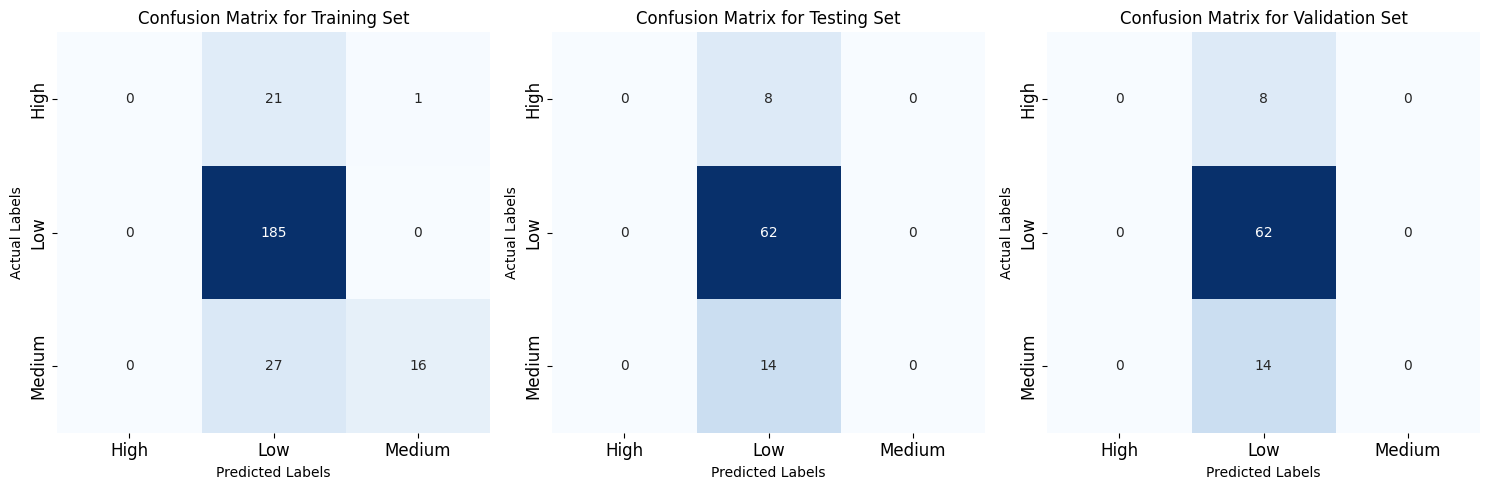

Confusion Matrix for Final Training Set:
 [[  0  21   1]
 [  0 185   0]
 [  0  27  16]]
Confusion Matrix for Final Testing Set:
 [[ 0  8  0]
 [ 0 62  0]
 [ 0 14  0]]
Confusion Matrix for Final Validation Set:
 [[ 0  8  0]
 [ 0 62  0]
 [ 0 14  0]]


In [139]:
# Plot confusion matrix
print("\nConfusion Matrices:")
plot_confusion_matrix(conf_matrix_train, conf_matrix_test, conf_matrix_val)

## Analysis & Recommendation From Above

> As we have seen, the class distribution of the Accident Category column (target variable) is imbalanced with around half the distribution inclined to the Low Risk Accidents, i.e., the Level I Accident Level and the other half being divided between Medium (Combination of Accident Levels II and III) and High (Combination of Accident Levels IV and V).
> 
> Seeing this, we might not have Accuracy as a good choice of metric for evaluating the model because it may be misleading in imbalanced datasets like ours as it might fail to identify minority classes
> 
> In our case,
> 
>  * Accident categories Medium and High are minority classes but are crucial for getting the safety standards
>  * Misclassifying Medium or High as Low can lead to missed safety standards and can cause a life and death situation
>  * Similarly, a high false positive rate for categories Medium and High could lead to panic
>  * Here, it’s critical to correctly identify Medium and High categories to avoid panic situations or risks at last minute. Recall can be helpful in such case. Also, using Precision also can ensure that the identified Medium and High categories are trustworthy
> 
> Thus, using a combination of both Recall and Precision can be beneficial in our case and hence, using F1-Score as the evaluation metric will be a good choice as it will povide a balanced perspective on the performance across all classes without favoring the majority class (Low Accident category). It will highlight both precision and recall for Medium and High categories considering Recall and Precision in equal weightage and will be effective for our predictions and setting safety standards



**Analysis** 
>We evaluated a combination of below models as part of our analysis and model building:
>  - **Embedding Techniques:** Word2Vec, GloVe, Sentence Transformer, TF-IDF, Bag of Words (BoW)
>  - **Sampling Techniques:** No Sampling, ReSampling (SMOTE + RandomUnderSampling)
>  - **Machine Learning Models:** RandomForest, DecisionTree, NaiveBayes, AdaBoost, GradientBoost, LogisticRegression, KNN, SVM, XGBoost
> 
> A combination of all the above were used for analysis and concluding all the analysis, we are here with the top performing models
> 
> Our of all the evaluated models, we see that the **Random Forest** model emerged as the top-performing model after being **fine-tuned with the best hyperparameters**. Its performance was further enhanced when combined with the **Word2Vec embedding** technique. Notably, this model achieved its results **without the use of any resampled data**.
> 
> We see below analysis as conclusion:
>  * The model shows a good balance between precision and recall, especially for the dominant class (Low Accident Category), indicating reliable overall performance
>  * It effectively captures most of the relevant instances, minimizing false negatives, which is critical in our case where missing important indicents can have severe consequences
>  * The results across the training, test, and validation sets are stable, demonstrating good generalization without overfitting
> 
> Overall, while our model handles the majority class well, incorporating few techniques to address class imbalance, even though we went to combine 4 classes to 2, could enhance performance for minority classes, improving the model’s overall reliability as it struggles with minority class predictions. However, keeping all these things into account, our Tuned Random Forest Model with Word2Vec Embedding managed to give a very good result in terms of perfromance without having to do any resampling of data

**Recommendations for Business**
> **Strengthen Safety Measures for High-Risk Industries**
> - **Mining & Heavy Industries:** Given the presence of mining accidents, businesses should implement stricter safety protocols such as mandatory protective gear, real-time hazard detection, and safety drills.
> - **Sector-Specific Policies:** Industries with a high accident frequency should have customized safety guidelines beyond general compliance.
> 
> **Address Critical Risks Proactively**
> - **Pressed Incidents:** Implement automated pressure release mechanisms.
> - **Pressurized Systems Failures:** Regular inspection & maintenance schedules are essential.
> - **Manual Tools Incidents:** Increase training & ergonomic tool design adoption.
> 
> **Focus on Employee & Third-Party Safety**
> - **Employee vs. Third-Party Accidents:** Identify whether third-party workers (contractors) face higher accident risks and ensure they receive the same safety training as full-time employees.
> - **Improve Onboarding & Training Programs:** All personnel must complete a safety certification before being allowed to work in hazardous zones.
> 
> **Implement AI-Based NLP for Incident Analysis**
> - **Automate Accident Description Analysis:** Use NLP models to extract patterns from accident descriptions and identify recurring risks.
> - **Real-Time Hazard Alerts:** Integrate real-time data collection (IoT sensors, safety reports) to prevent incidents before they occur.


***

***

# ------------------------------------------ <u>END OF PROJECT</u> ------------------------------------------

***

***
 